# Projet de Machine Learning

Notebook R avec les codes utilisés pour le rapport final.

## Importation des librairies

In [1]:
library(vcd)
library(ggplot2)

Loading required package: grid



# Obtenir les données

In [2]:
spotify_data <- read.table(file = "data/spotify-extr.txt", header = T, sep = " ")

# Description de l'ensemble du jeu de données

In [3]:
head(spotify_data)

,valence,year,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,pop.class
,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
161704,0.647,1975,0.4490,0.376,298840,0.827,7.88e-03,B,0.466,-7.604,1,25,0.3990,170.475,C
168077,0.150,2008,0.8990,0.508,236800,0.169,1.12e-05,Ab,0.136,-11.332,1,42,0.0553,107.477,B
35922,0.423,2007,0.0185,0.470,301093,0.878,8.39e-02,B,0.276,-5.576,0,65,0.0377,150.093,A
135823,0.302,1995,0.0384,0.176,142200,0.980,5.52e-01,B,0.237,-3.154,1,36,0.0721,172.566,C
165395,0.828,1994,0.5310,0.705,187800,0.625,7.73e-06,G,0.348,-11.963,0,38,0.0639,97.831,C
38184,0.489,2018,0.3710,0.856,324189,0.694,0.00e+00,D,0.109,-4.393,1,68,0.1690,122.080,A


In [4]:
dim(spotify_data)

[1] 10000    15

In [5]:
sapply(spotify_data, class)

valence             year     acousticness     danceability 
       "numeric"        "integer"        "numeric"        "numeric" 
        duration           energy instrumentalness              key 
       "integer"        "numeric"        "numeric"      "character" 
        liveness         loudness             mode       popularity 
       "numeric"        "numeric"        "integer"        "integer" 
     speechiness            tempo        pop.class 
       "numeric"        "numeric"      "character"

In [6]:
sum(is.na(spotify_data))

[1] 0

In [7]:
spotify_data$pop.class <- factor(spotify_data$pop.class, order = T)
spotify_data$key <- factor(spotify_data$key)
spotify_data$mode <- factor(spotify_data$mode)

In [8]:
levels(spotify_data$pop.class)
levels(spotify_data$key)
levels(spotify_data$mode)

[1] "A" "B" "C" "D"

[1] "A"  "Ab" "B"  "Bb" "C"  "D"  "Db" "E"  "Eb" "F"  "G"  "Gb"

[1] "0" "1"

In [9]:
pop.class <- spotify_data$pop.class
key <- spotify_data$key
popularity <- spotify_data$popularity

In [10]:
percentage <- prop.table(table(pop.class)) * 100
freqs <- cbind(freq = table(pop.class), percentage = percentage)
freqs

,freq,percentage
A,963,9.63
B,2886,28.86
C,2968,29.68
D,3183,31.83


In [11]:
percentage <- prop.table(table(key)) * 100
freqs <- cbind(freq = table(key), percentage = percentage)
freqs

,freq,percentage
A,1050,10.50
Ab,637,6.37
B,603,6.03
Bb,746,7.46
C,1282,12.82
D,1092,10.92
Db,769,7.69
E,743,7.43
Eb,435,4.35
F,961,9.61


In [12]:
summary(spotify_data)

    valence            year       acousticness      danceability  
 Min.   :0.0000   Min.   :1921   Min.   :0.00000   Min.   :0.000  
 1st Qu.:0.3240   1st Qu.:1956   1st Qu.:0.09267   1st Qu.:0.417  
 Median :0.5430   Median :1978   Median :0.50400   Median :0.550  
 Mean   :0.5328   Mean   :1977   Mean   :0.49572   Mean   :0.540  
 3rd Qu.:0.7510   3rd Qu.:1999   3rd Qu.:0.88925   3rd Qu.:0.671  
 Max.   :0.9930   Max.   :2020   Max.   :0.99600   Max.   :0.988  
                                                                  
    duration           energy       instrumentalness        key      
 Min.   :   5991   Min.   :0.0000   Min.   :0.000000   C      :1282  
 1st Qu.: 169067   1st Qu.:0.2620   1st Qu.:0.000000   G      :1188  
 Median : 206530   Median :0.4760   Median :0.000174   D      :1092  
 Mean   : 227215   Mean   :0.4875   Mean   :0.164947   A      :1050  
 3rd Qu.: 259733   3rd Qu.:0.7080   3rd Qu.:0.087100   F      : 961  
 Max.   :2703227   Max.   :1.0000   Max.   :

# Analyses uni et multidimensionnelles

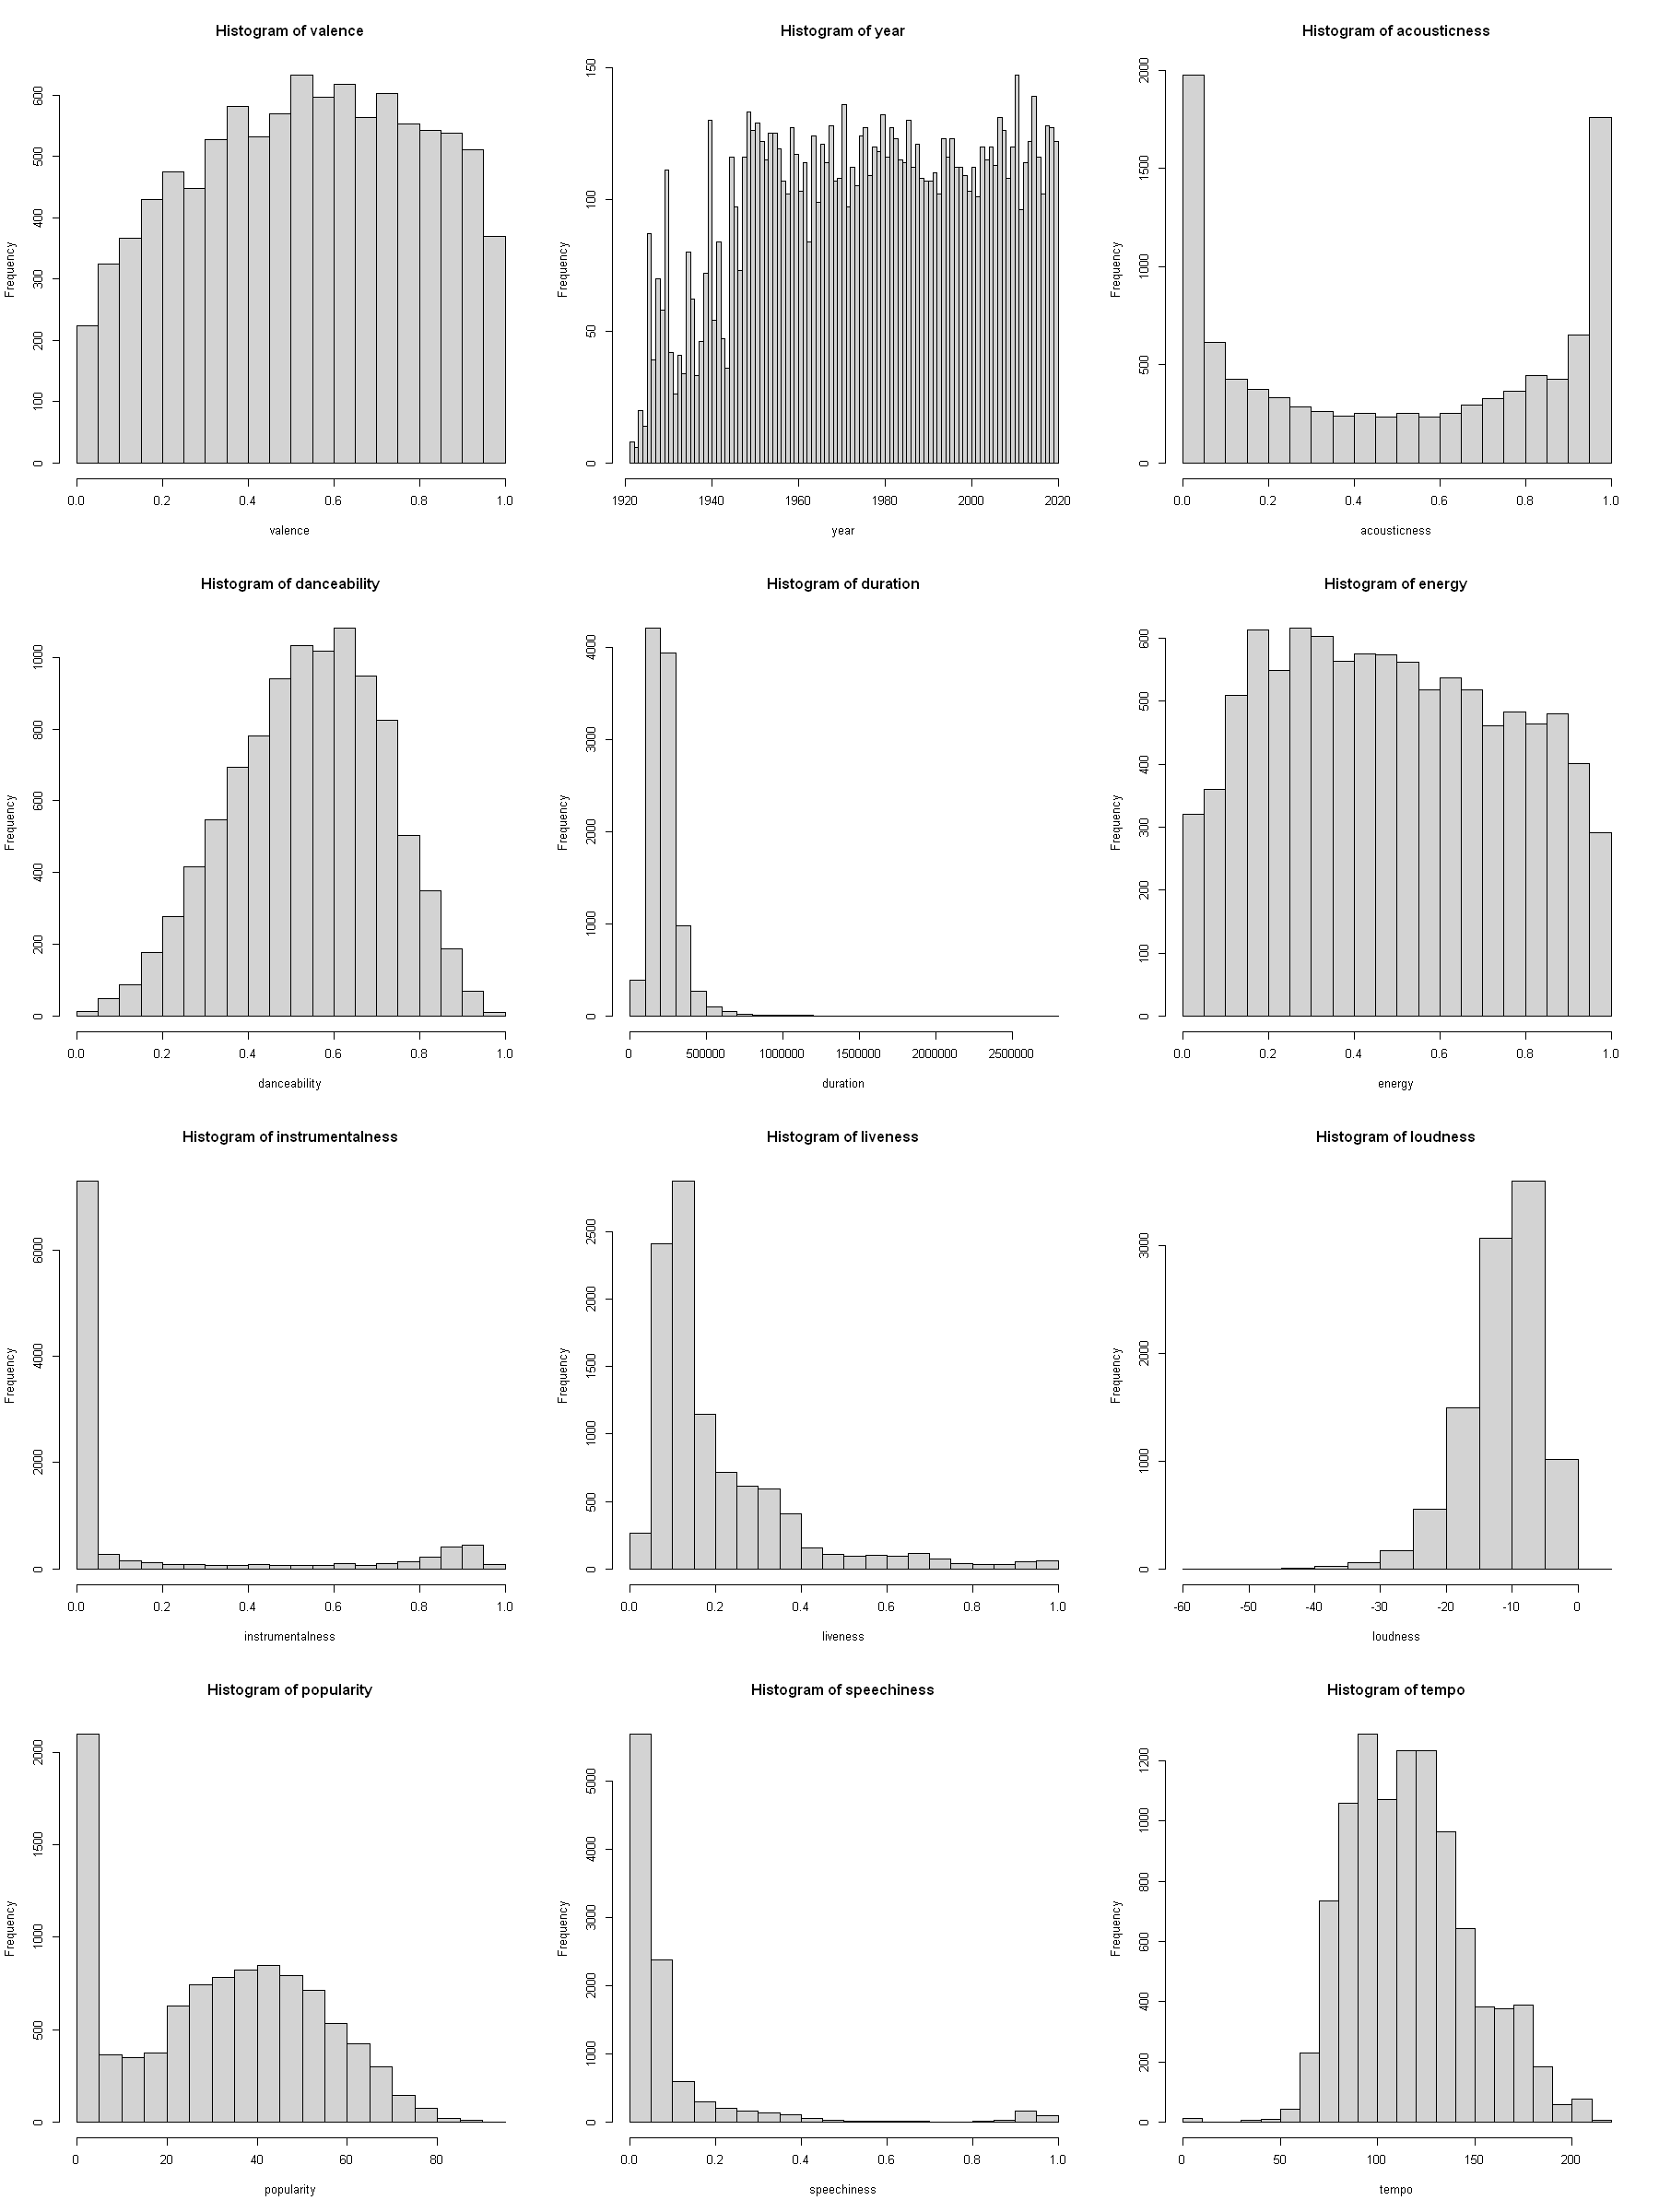

In [13]:
library(vcd)

data_quant <- spotify_data[, -c(8, 11, 15)]

options(repr.plot.width = 15, repr.plot.height = 20)
par(mfrow = c(4, 3))
for (i in 1:12) {
    hist(data_quant[, i], main = paste("Histogram of", colnames(data_quant)[i], sep = " "), 
        breaks = ifelse(i == 2, 100, 20), xlab = colnames(data_quant)[i])
}

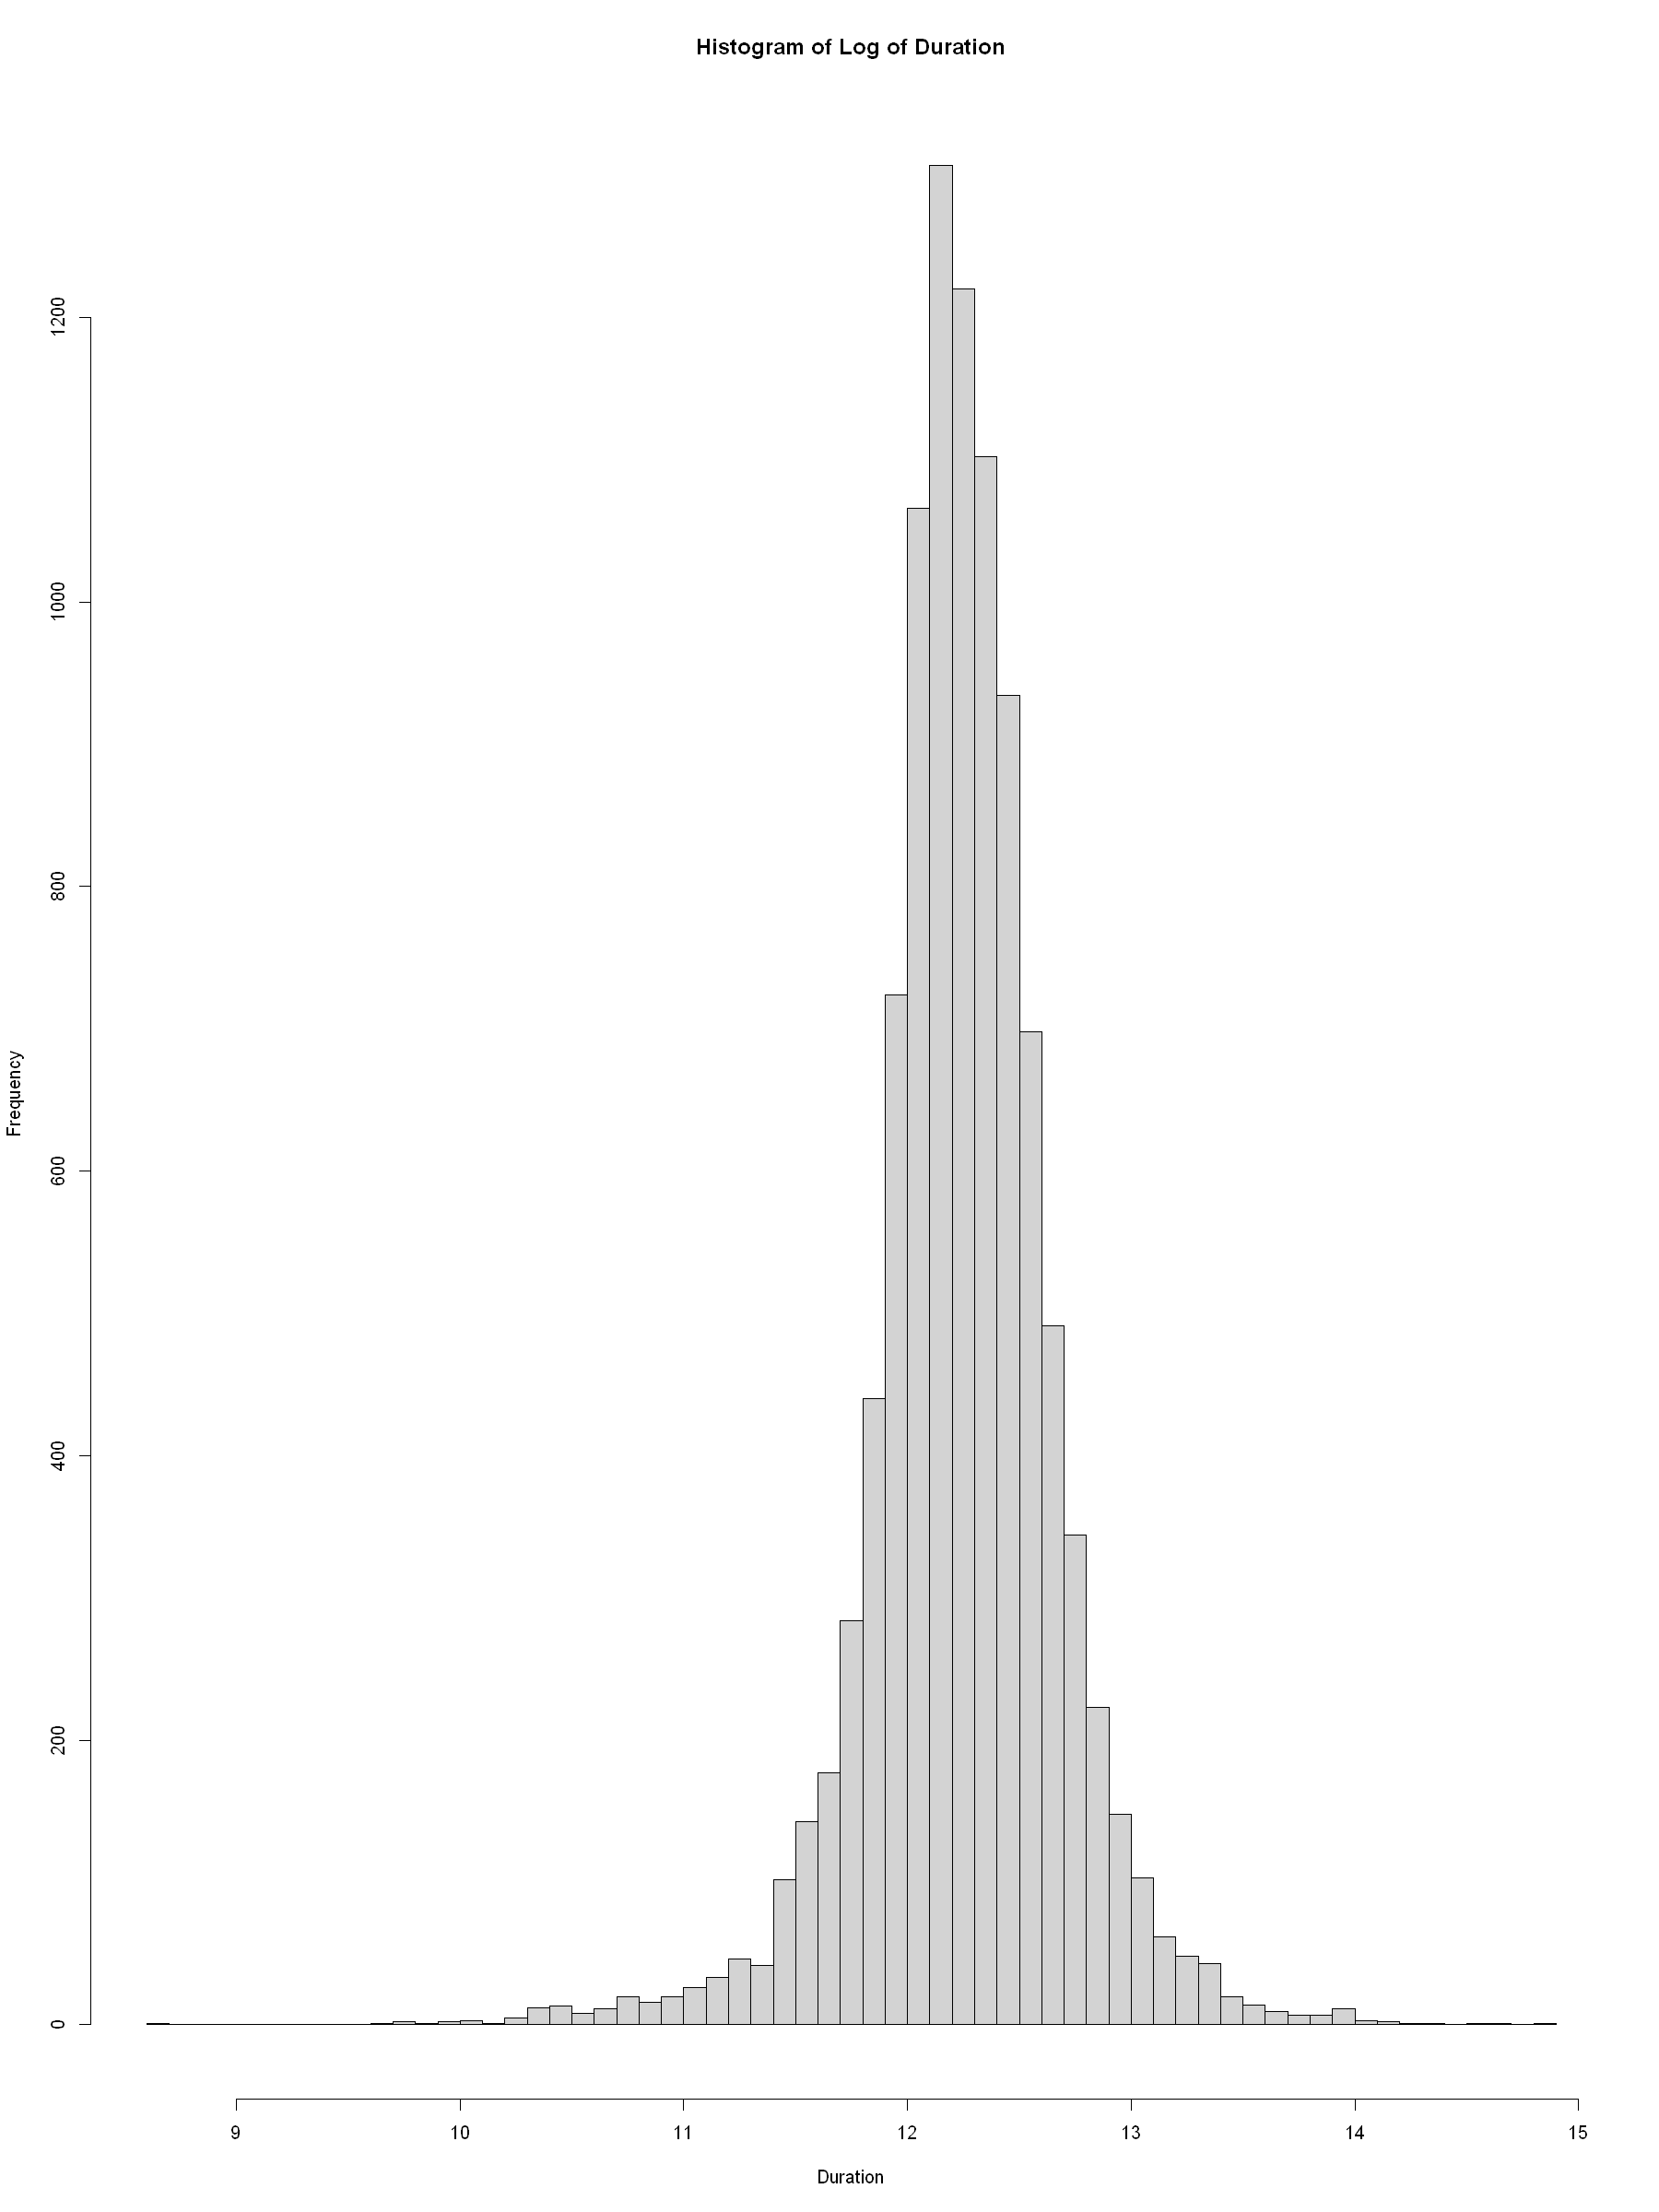

In [14]:
spotify_data$log_duration <- log(spotify_data$duration)
hist(spotify_data$log_duration, main = "Histogram of Log of Duration", breaks = 50, 
    xlab = "Duration")

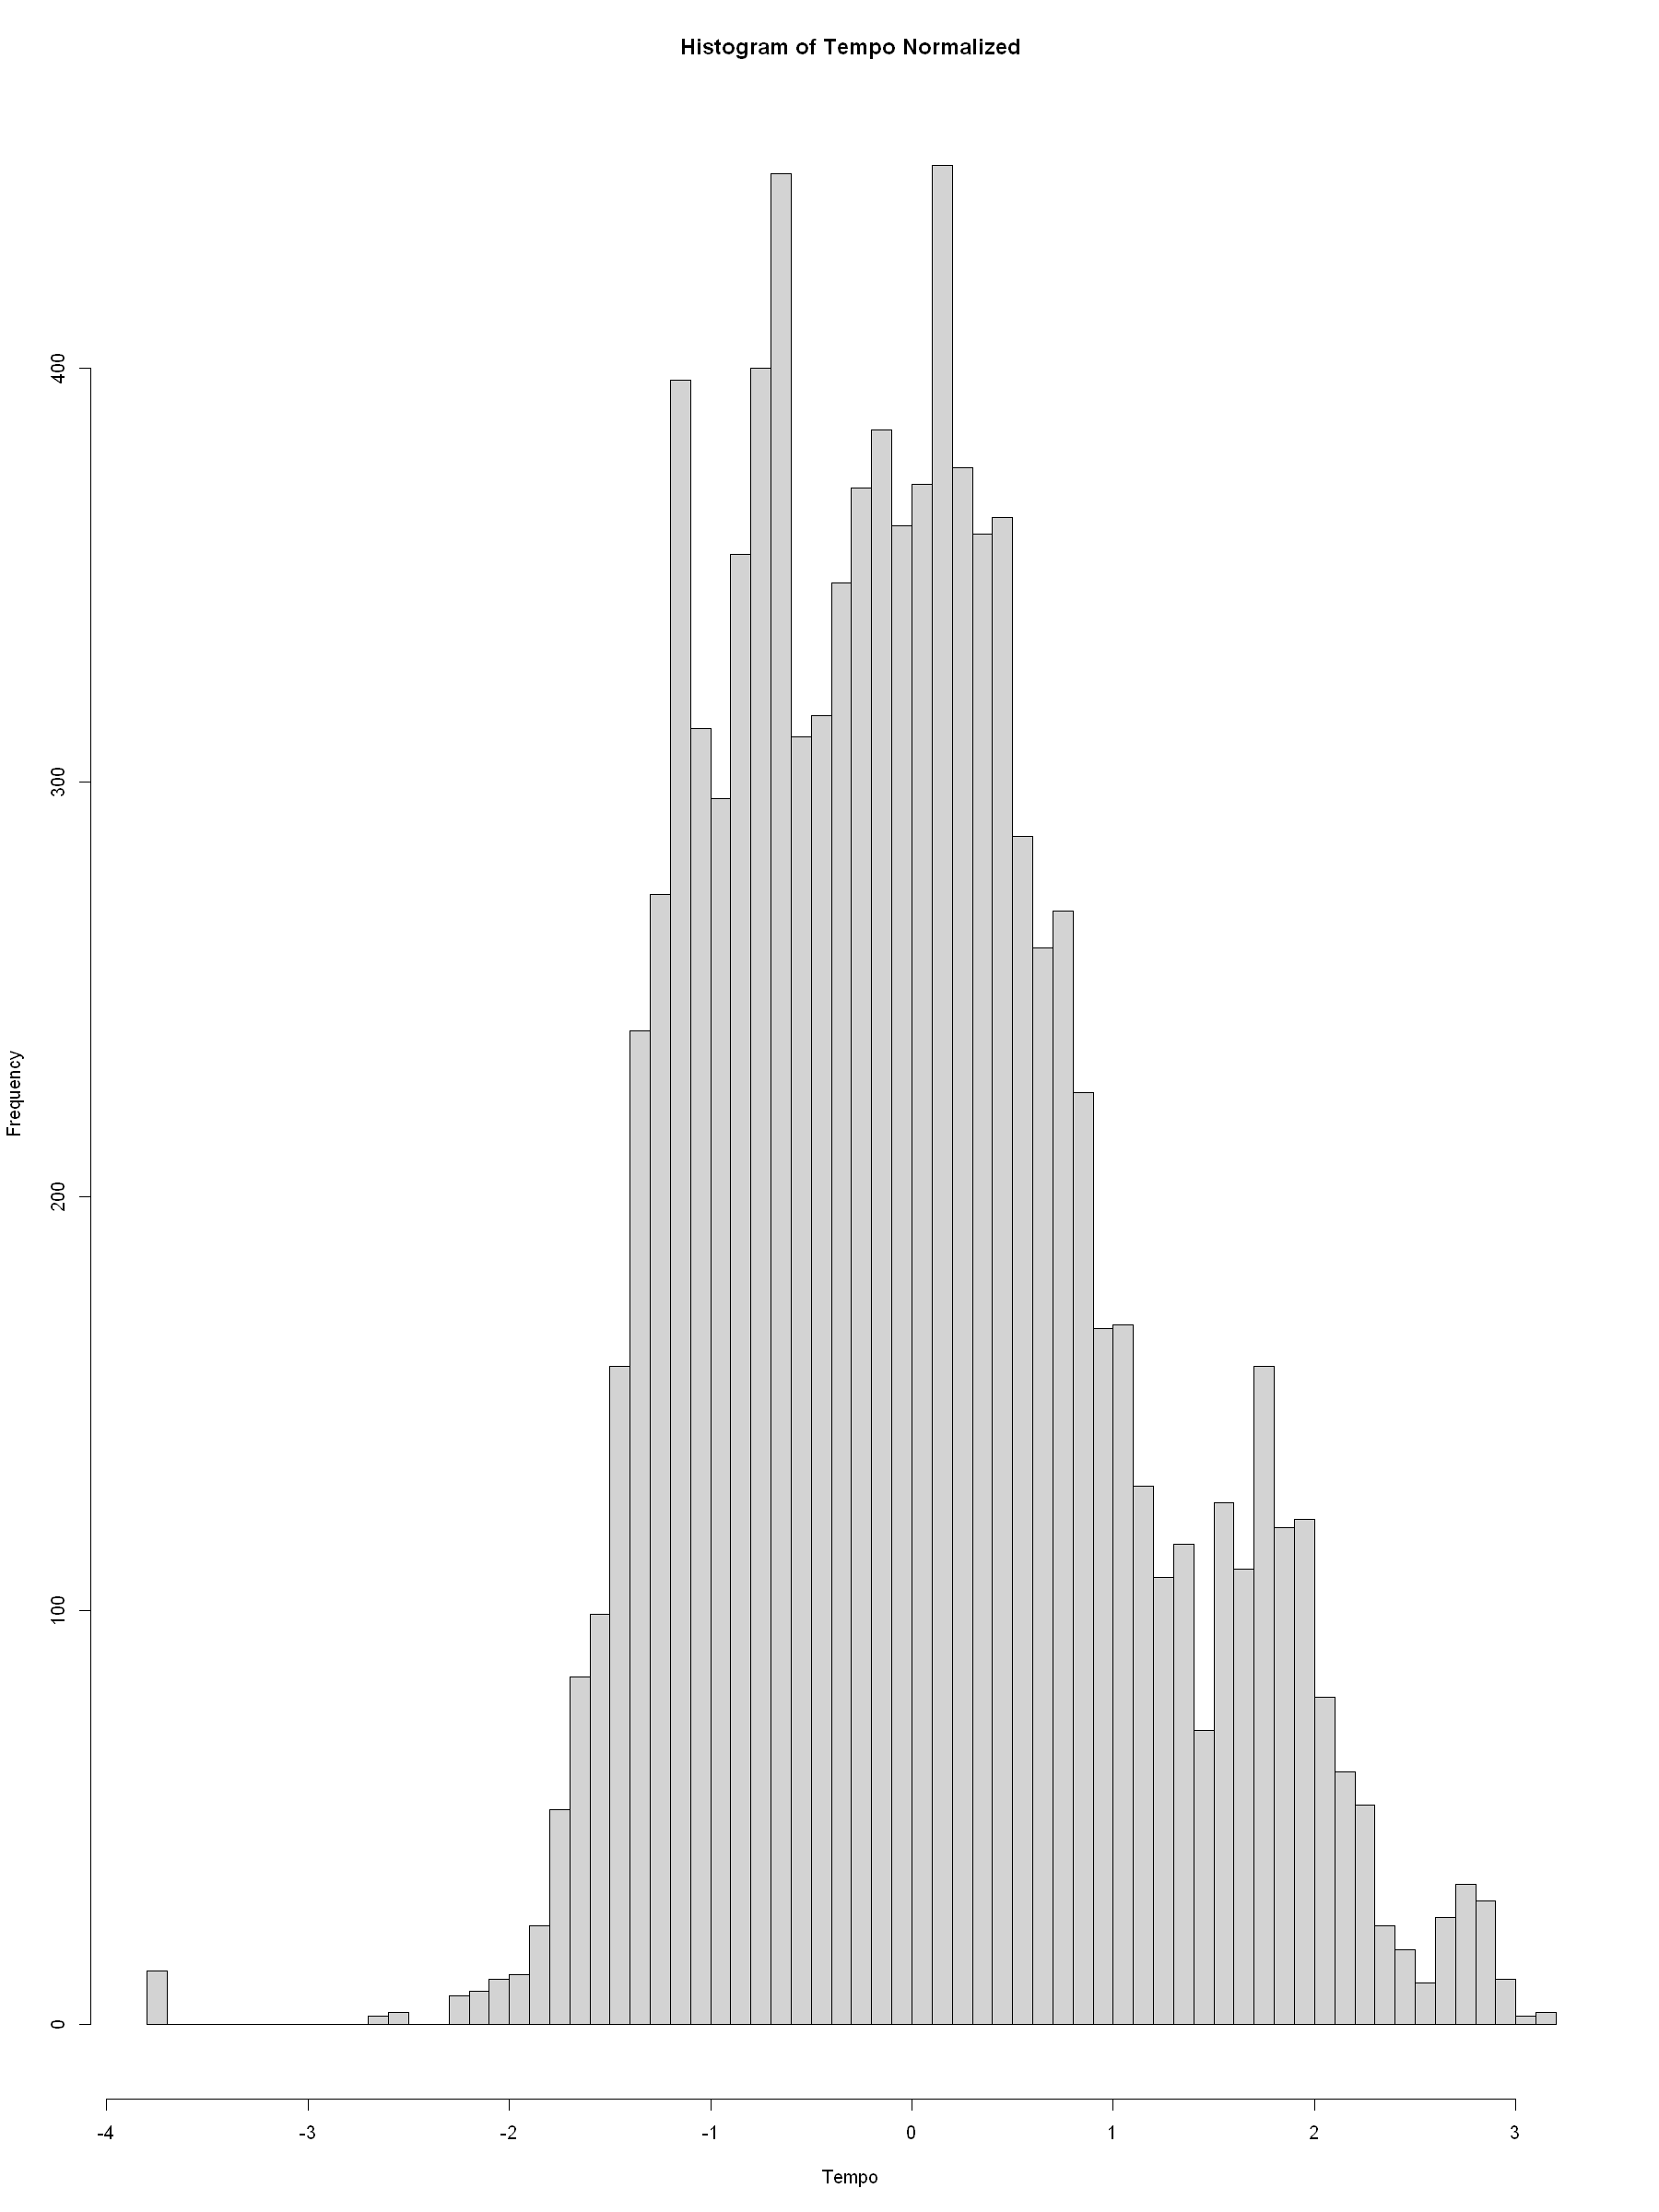

In [15]:
spotify_data$tempo_norm <- scale(spotify_data$tempo)
hist(spotify_data$tempo_norm, main = "Histogram of Tempo Normalized", breaks = 50, 
    xlab = "Tempo")

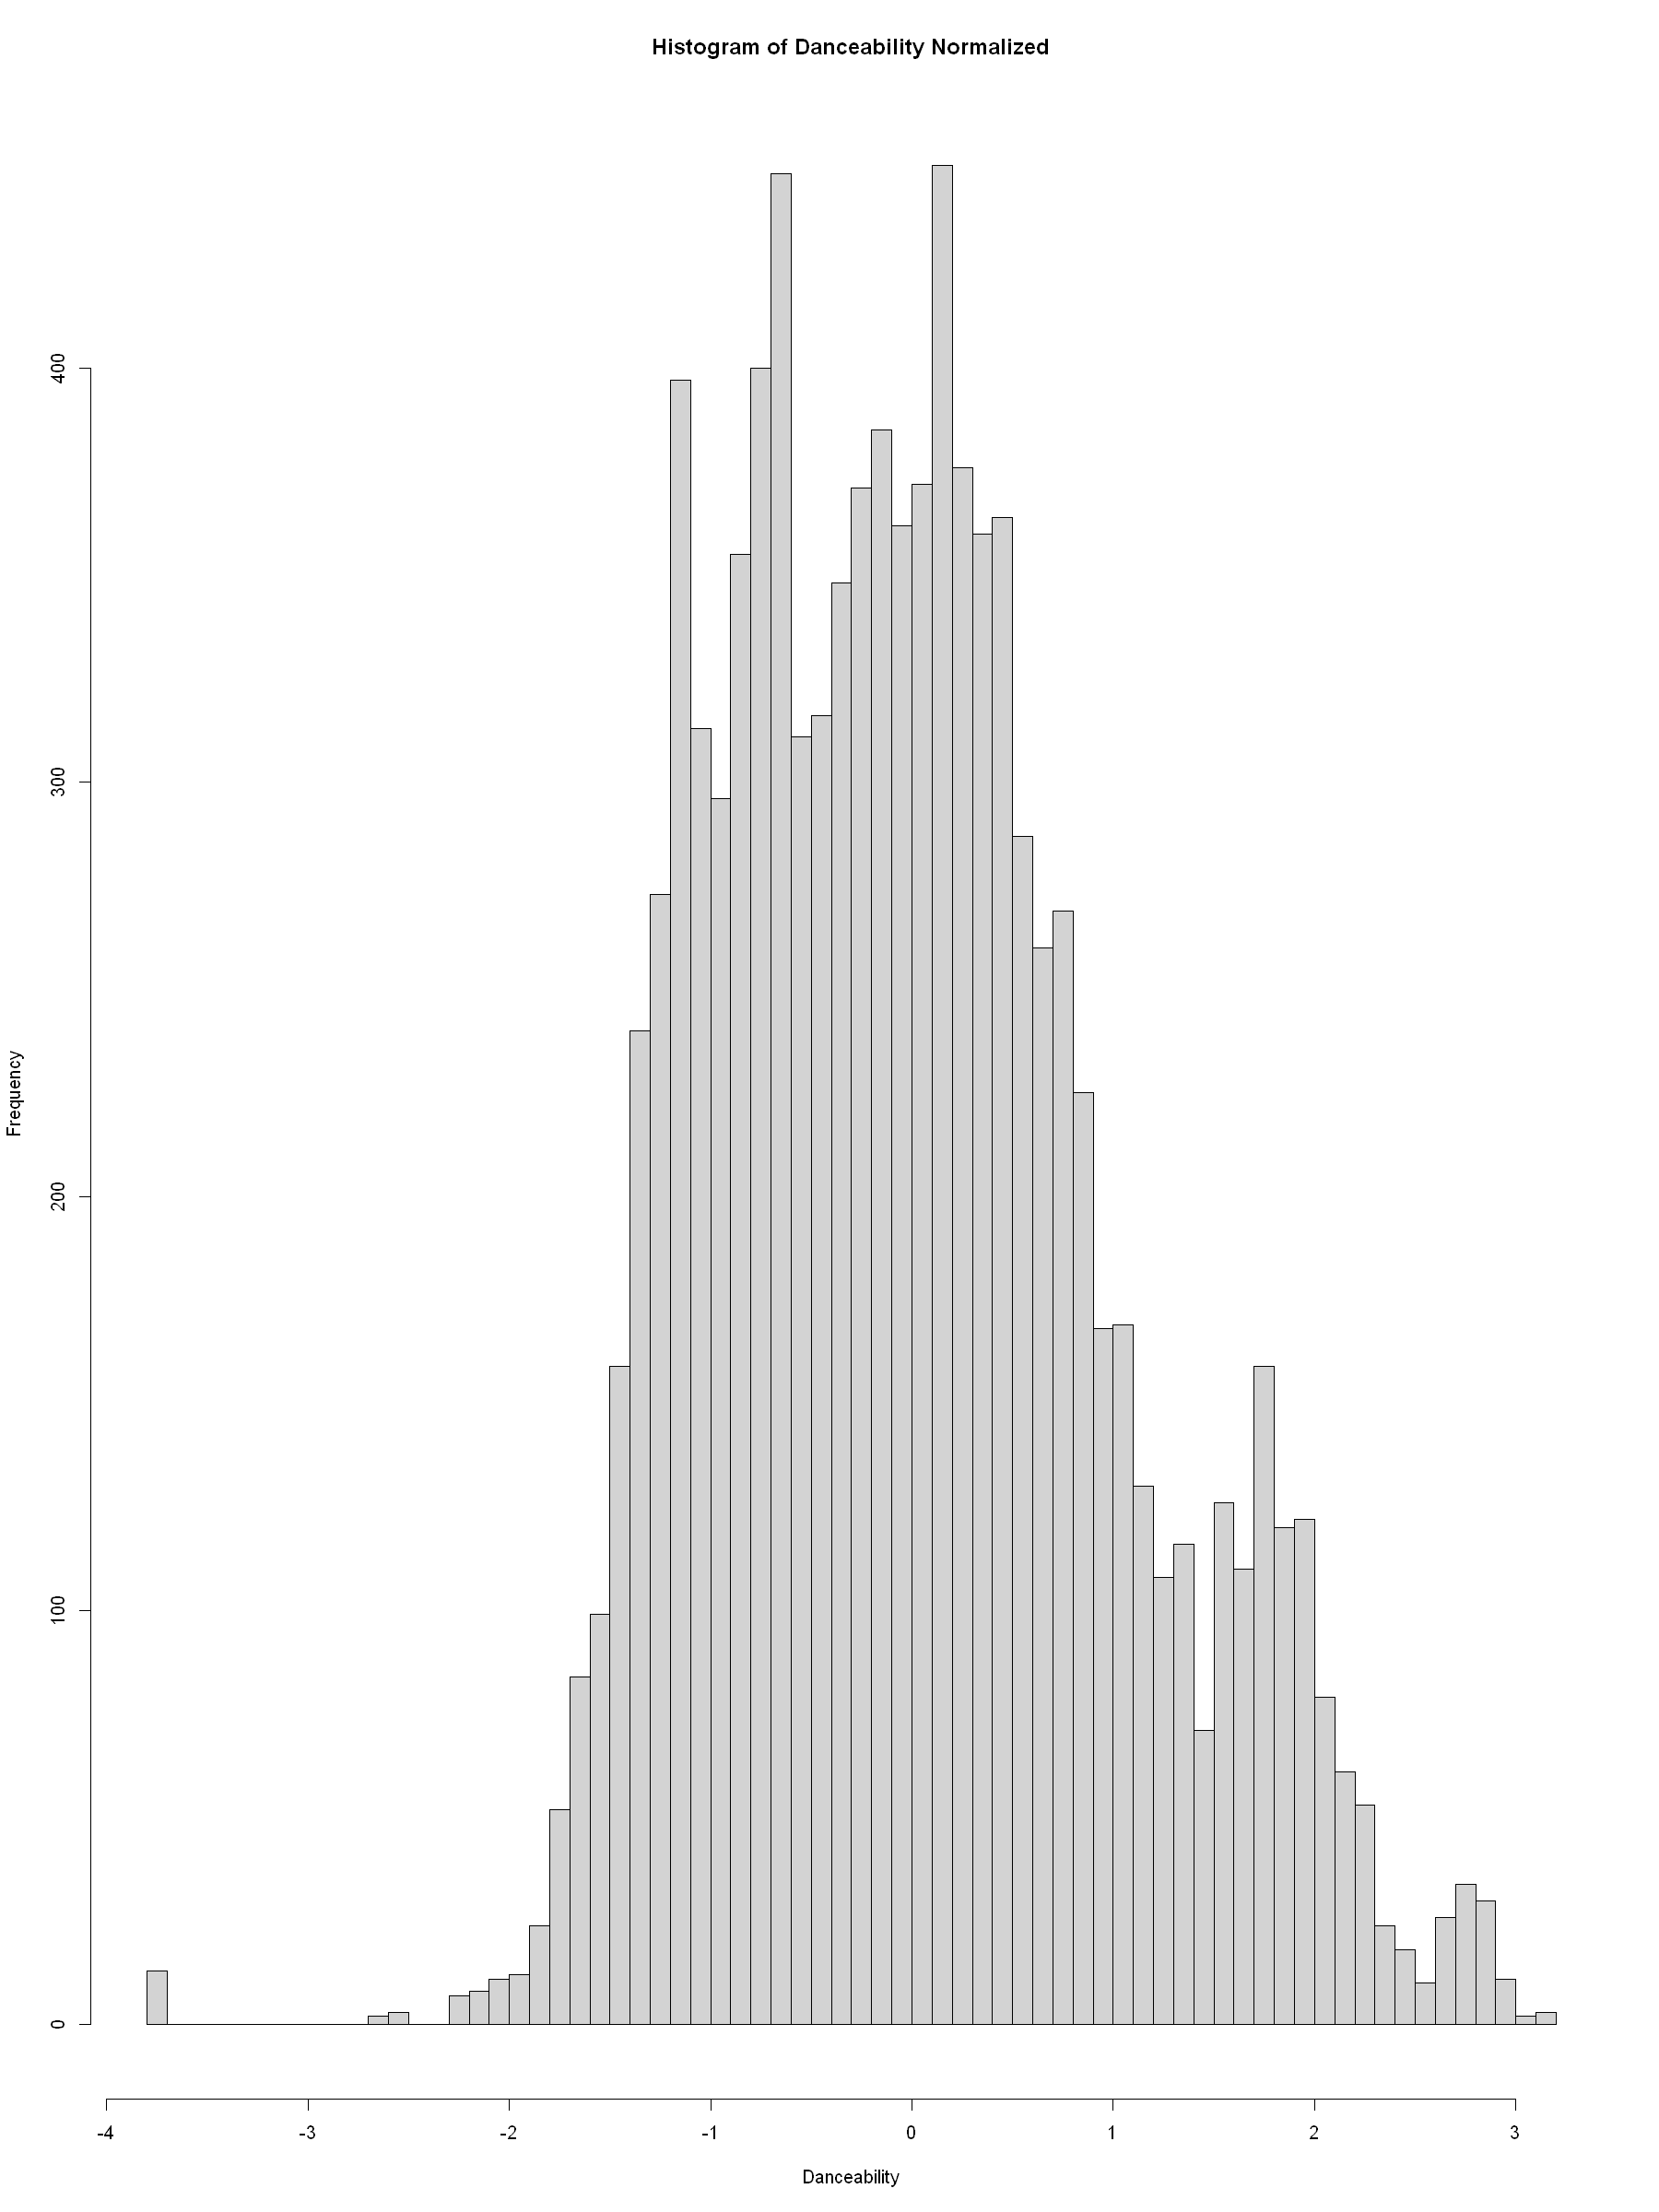

In [16]:
spotify_data$dance_norm <- scale(spotify_data$danceability)
hist(spotify_data$tempo_norm, main = "Histogram of Danceability Normalized", breaks = 50, 
    xlab = "Danceability")

In [17]:
spotify_data <- spotify_data[, -c(4, 5, 14)]
head(spotify_data)

,valence,year,acousticness,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,pop.class,log_duration,tempo_norm,dance_norm
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<ord>,<dbl>,"<dbl[,1]>","<dbl[,1]>"
161704,0.647,1975,0.4490,0.827,7.88e-03,B,0.466,-7.604,1,25,0.3990,C,12.60766,1.7310595,-0.9309645
168077,0.150,2008,0.8990,0.169,1.12e-05,Ab,0.136,-11.332,1,42,0.0553,B,12.37497,-0.3031657,-0.1817845
35922,0.423,2007,0.0185,0.878,8.39e-02,B,0.276,-5.576,0,65,0.0377,A,12.61517,1.0729184,-0.3974575
135823,0.302,1995,0.0384,0.980,5.52e-01,B,0.237,-3.154,1,36,0.0721,C,11.86499,1.7985786,-2.0660858
165395,0.828,1994,0.5310,0.625,7.73e-06,G,0.348,-11.963,0,38,0.0639,C,12.14313,-0.6146381,0.9363100
38184,0.489,2018,0.3710,0.694,0.00e+00,D,0.109,-4.393,1,68,0.1690,A,12.68908,0.1683698,1.7933266


In [18]:
pop_vec <- data.frame(pop.class)
pop_vec <- dplyr::count(pop_vec, pop.class)
pop_vec

pop.class,n
<ord>,<int>
A,963
B,2886
C,2968
D,3183


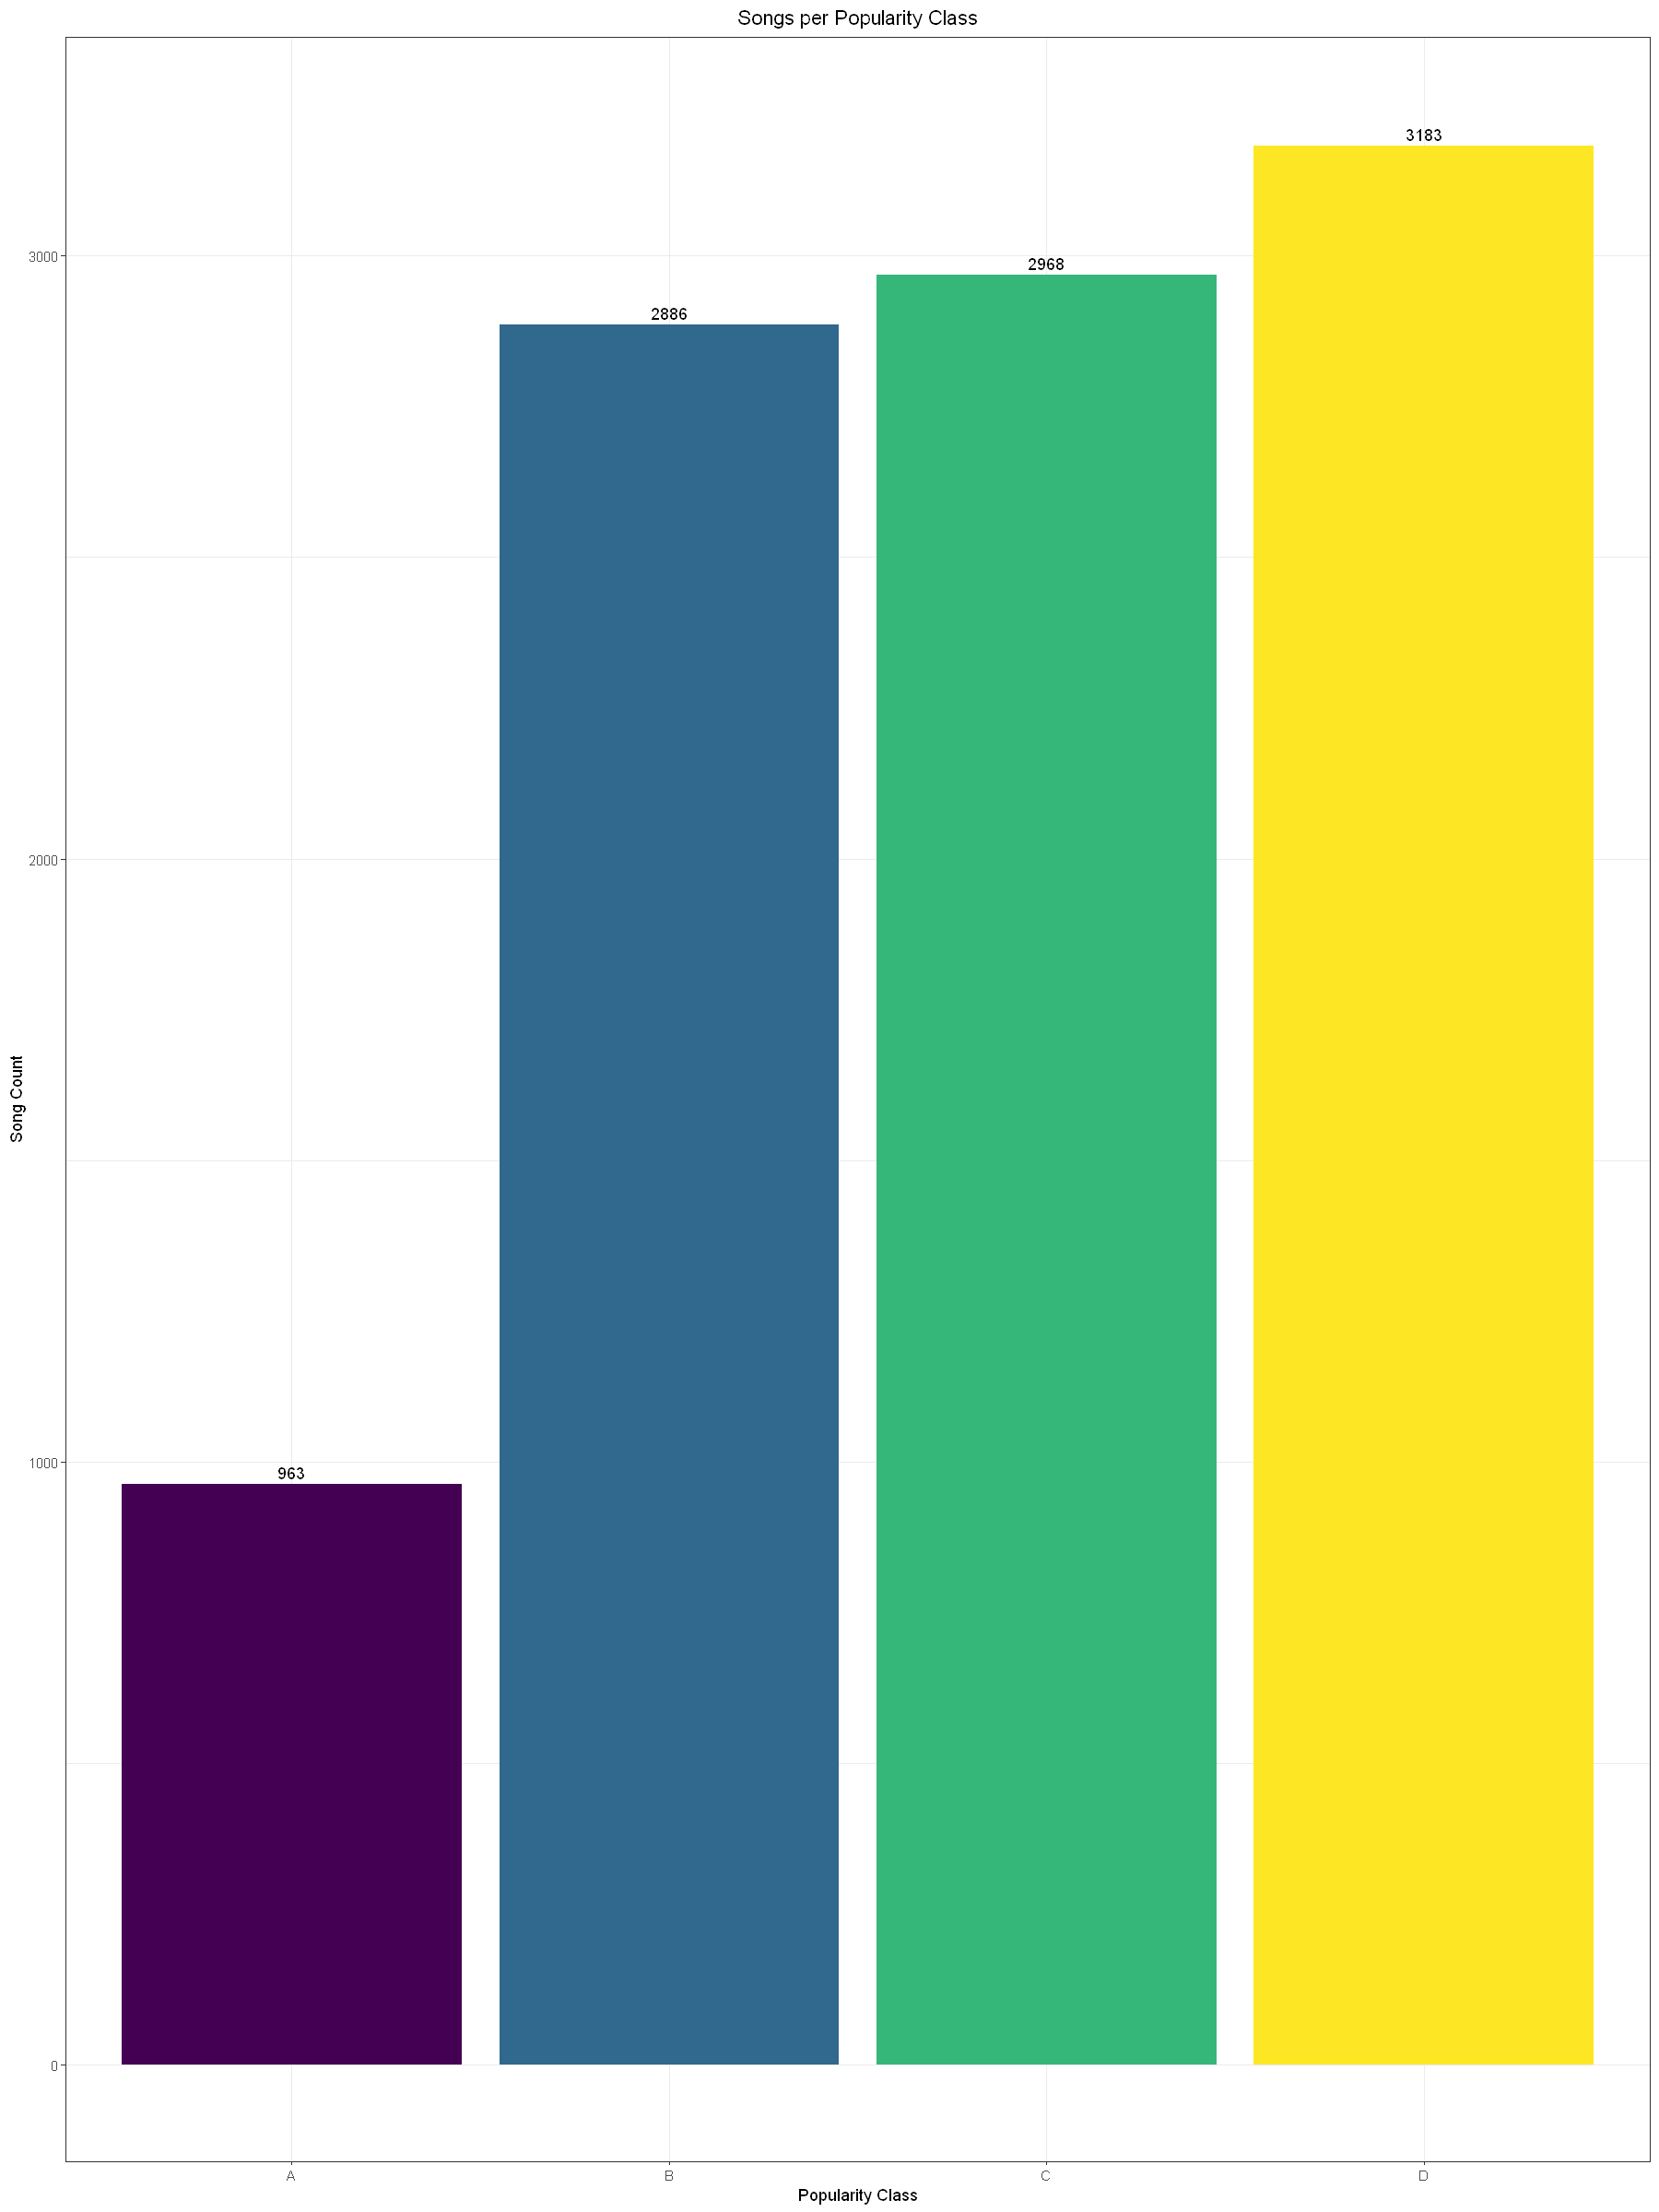

In [19]:
library(ggplot2)

p <- ggplot(pop_vec, aes(x = pop.class, y = n, fill = pop.class, label = n)) + geom_col() + 
    geom_text(nudge_y = 20) + ggtitle("Songs per Popularity Class") + xlab("Popularity Class") + 
    ylab("Song Count") + theme_bw() + theme(legend.position = "none") + theme(plot.title = element_text(hjust = 0.5))
p

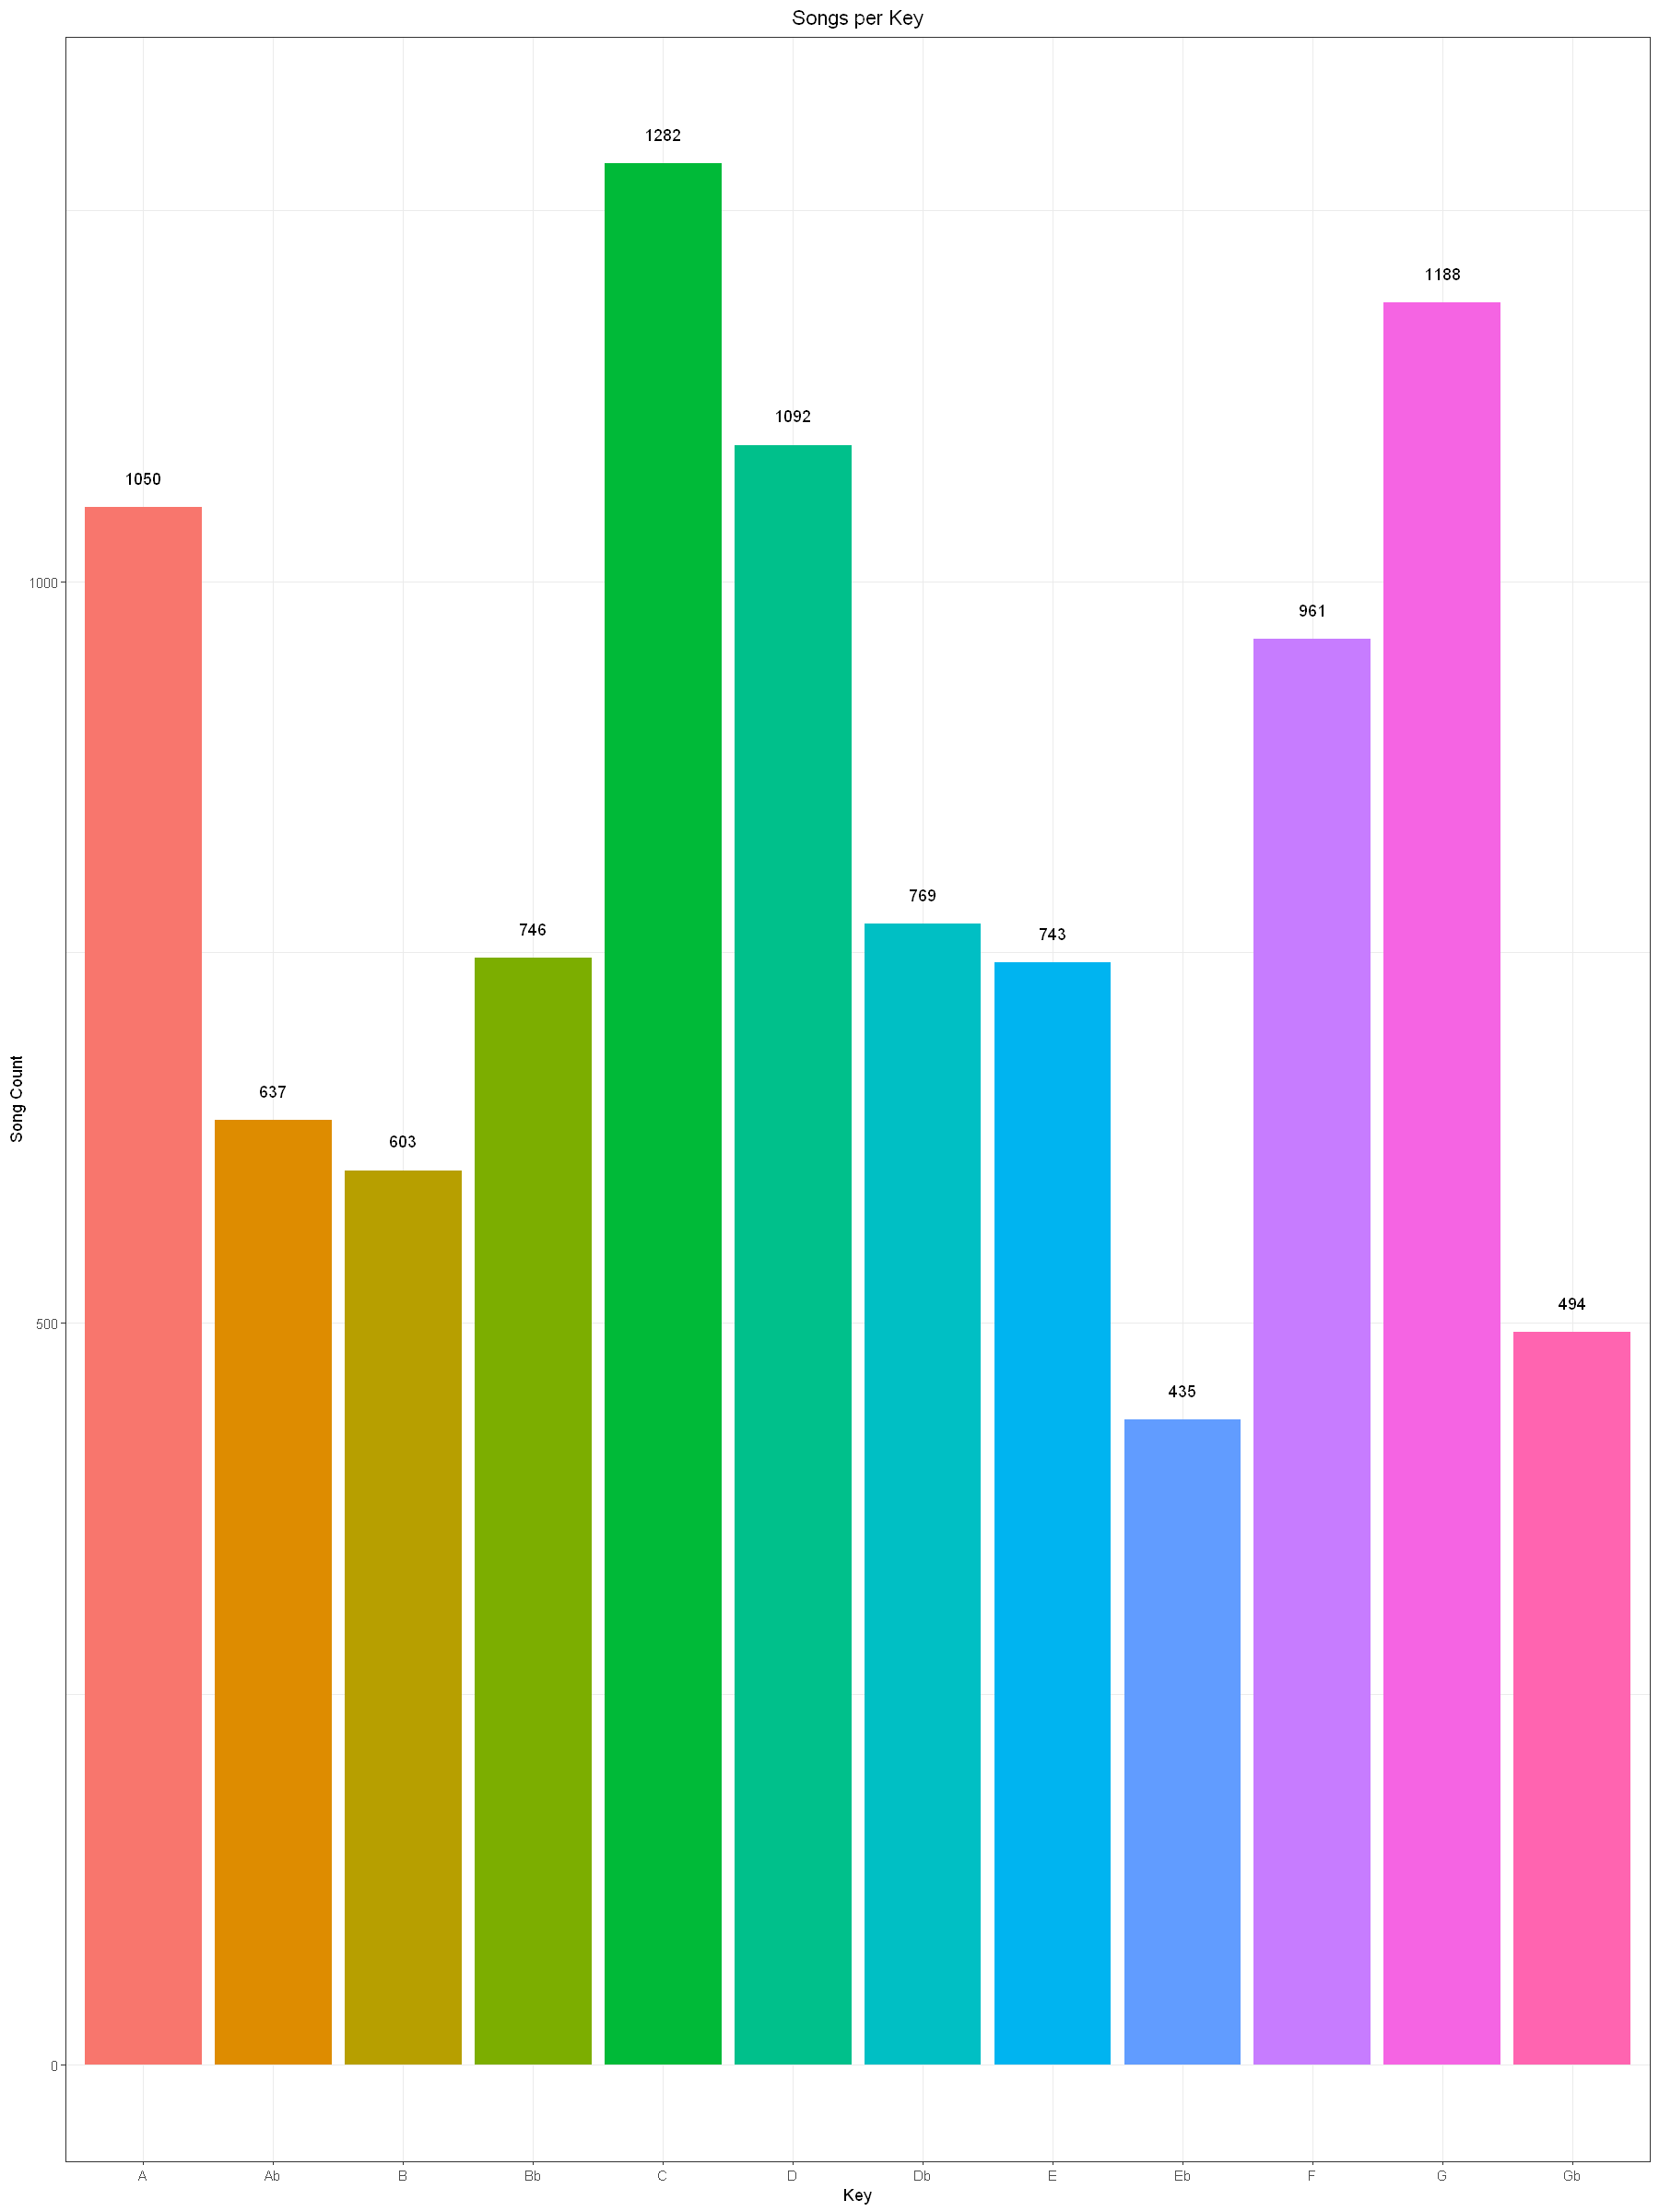

In [20]:
key_vec <- data.frame(key)
key_vec <- dplyr::count(key_vec, key)

p <- ggplot(key_vec, aes(x = key, y = n, fill = key, label = n)) + geom_col() + geom_text(nudge_y = 20) + 
    ggtitle("Songs per Key") + xlab("Key") + ylab("Song Count") + theme_bw() + theme(legend.position = "none") + 
    theme(plot.title = element_text(hjust = 0.5))
p

Loading required package: wrapr

Warning message:
"Removed 17 rows containing missing values (geom_smooth)."


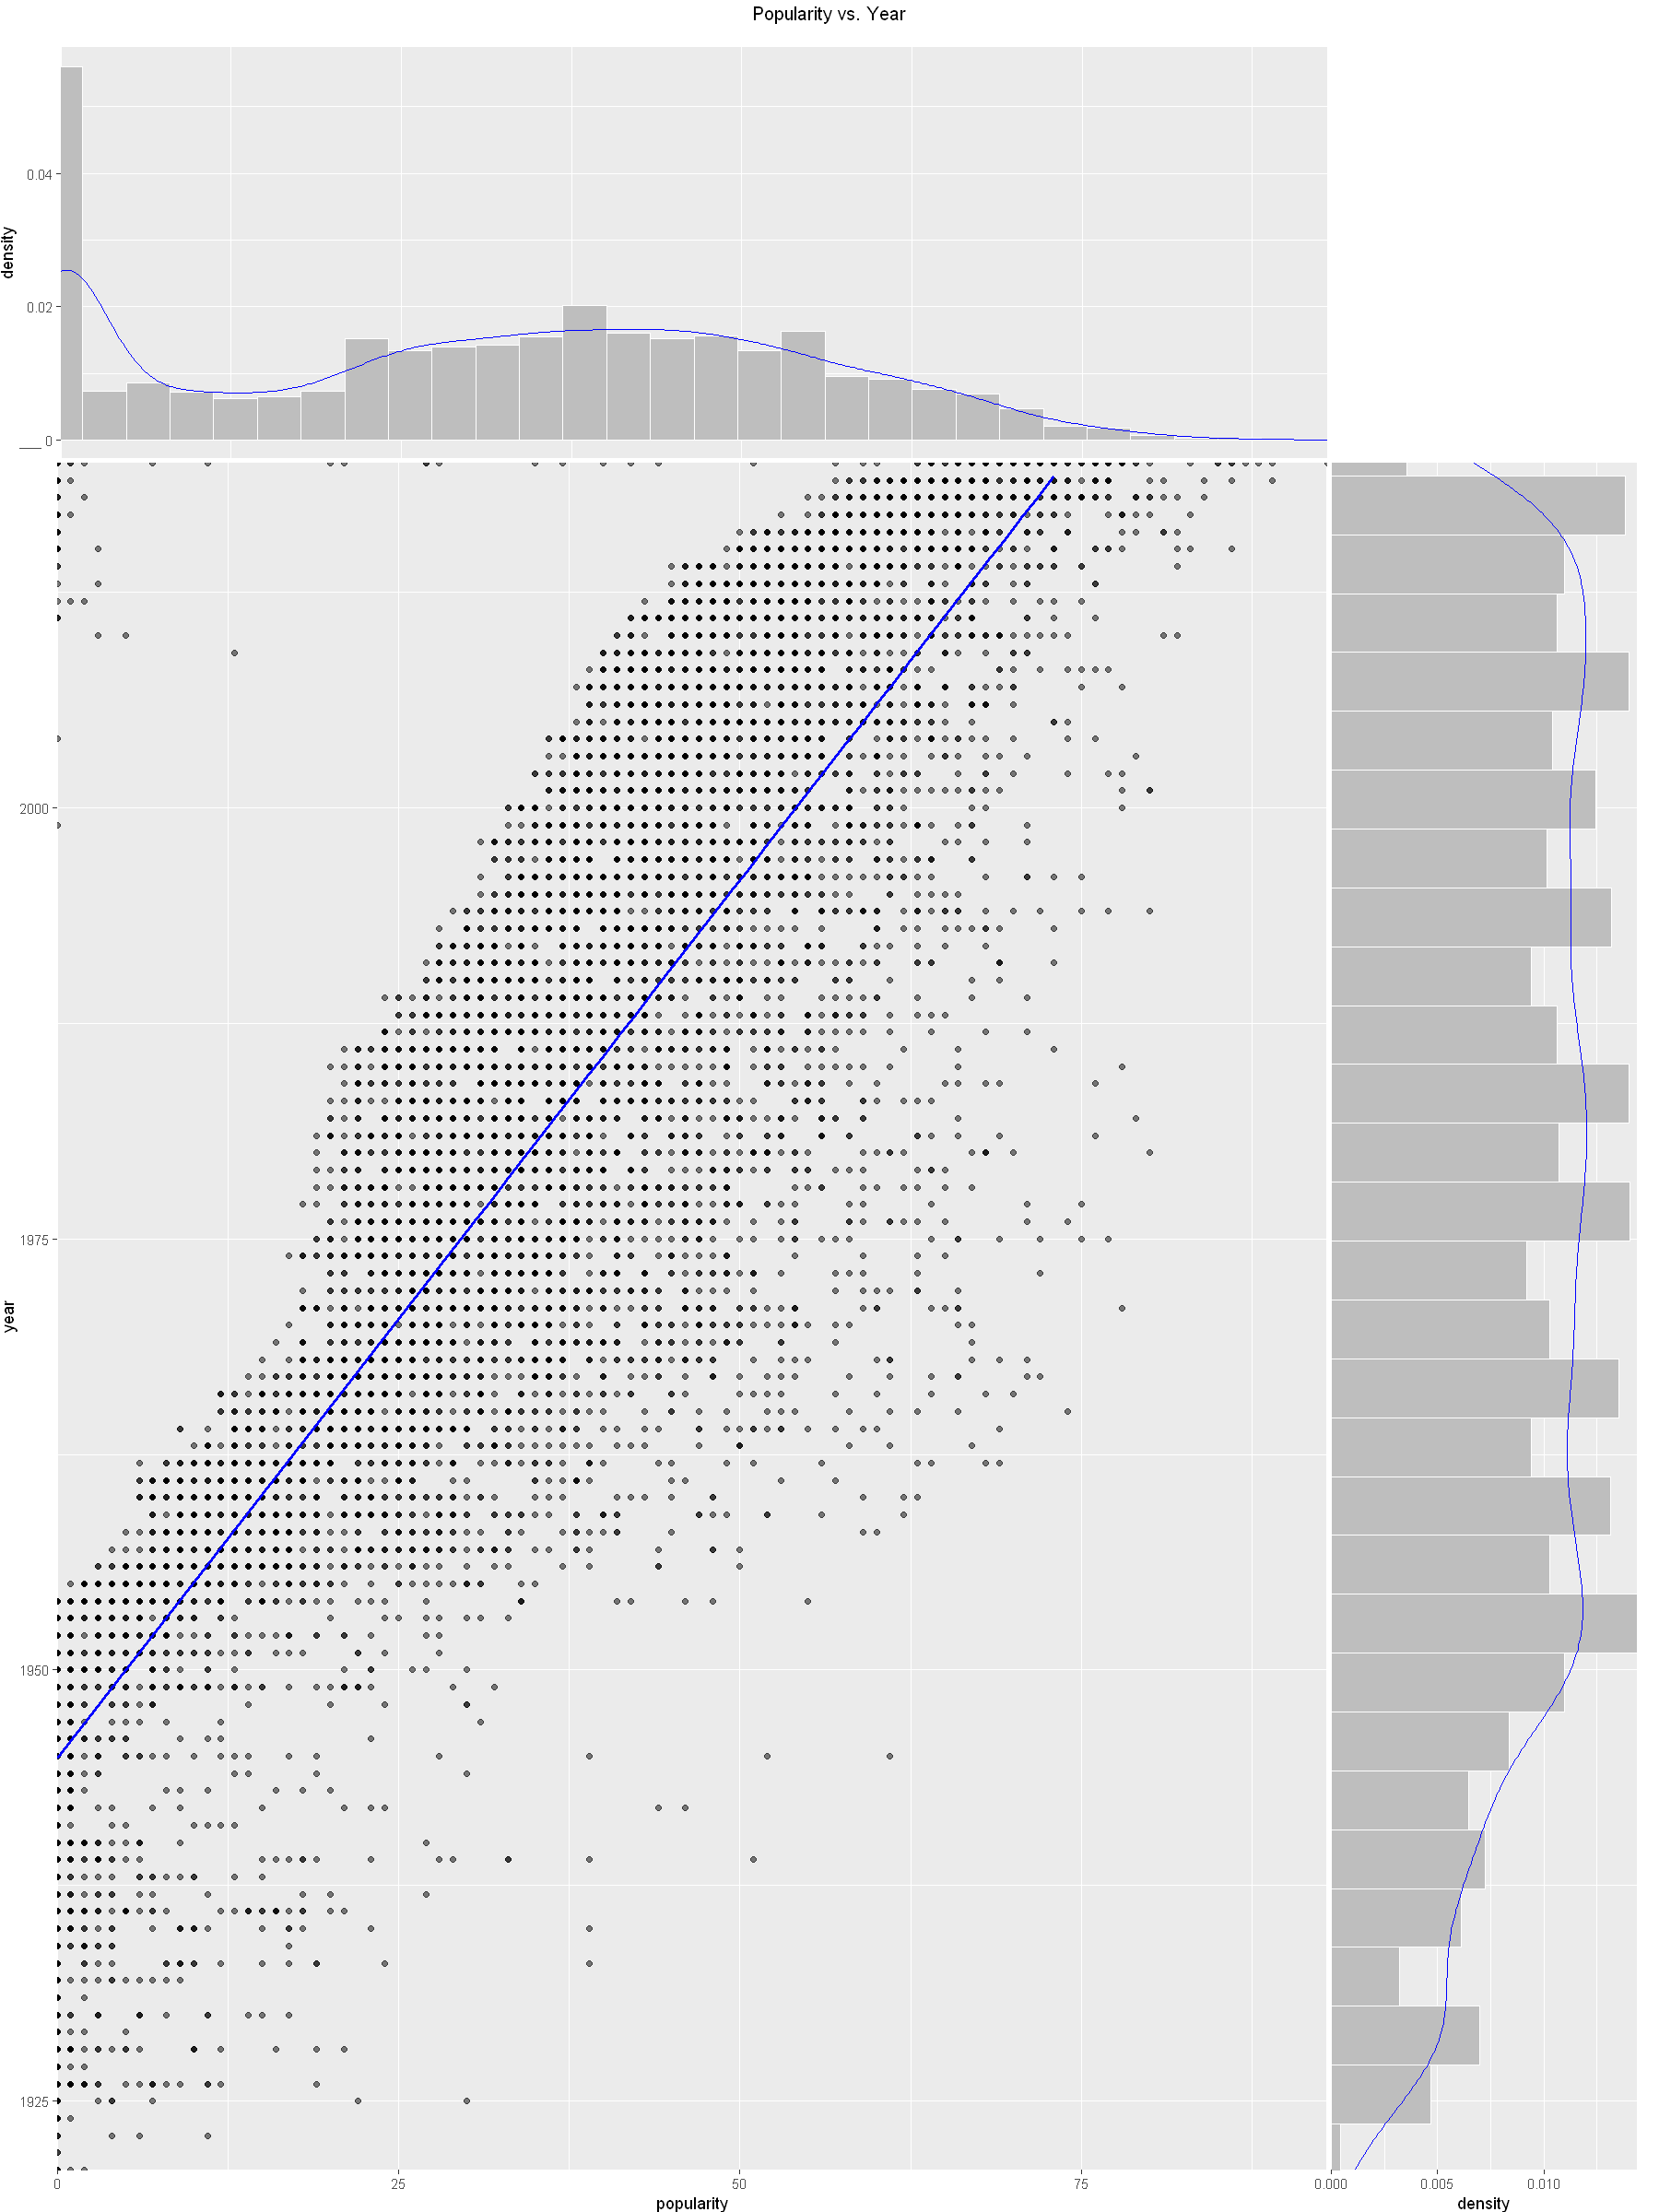

In [21]:
library(WVPlots)

ScatterHist(spotify_data, "popularity", "year", title = "Popularity vs. Year")

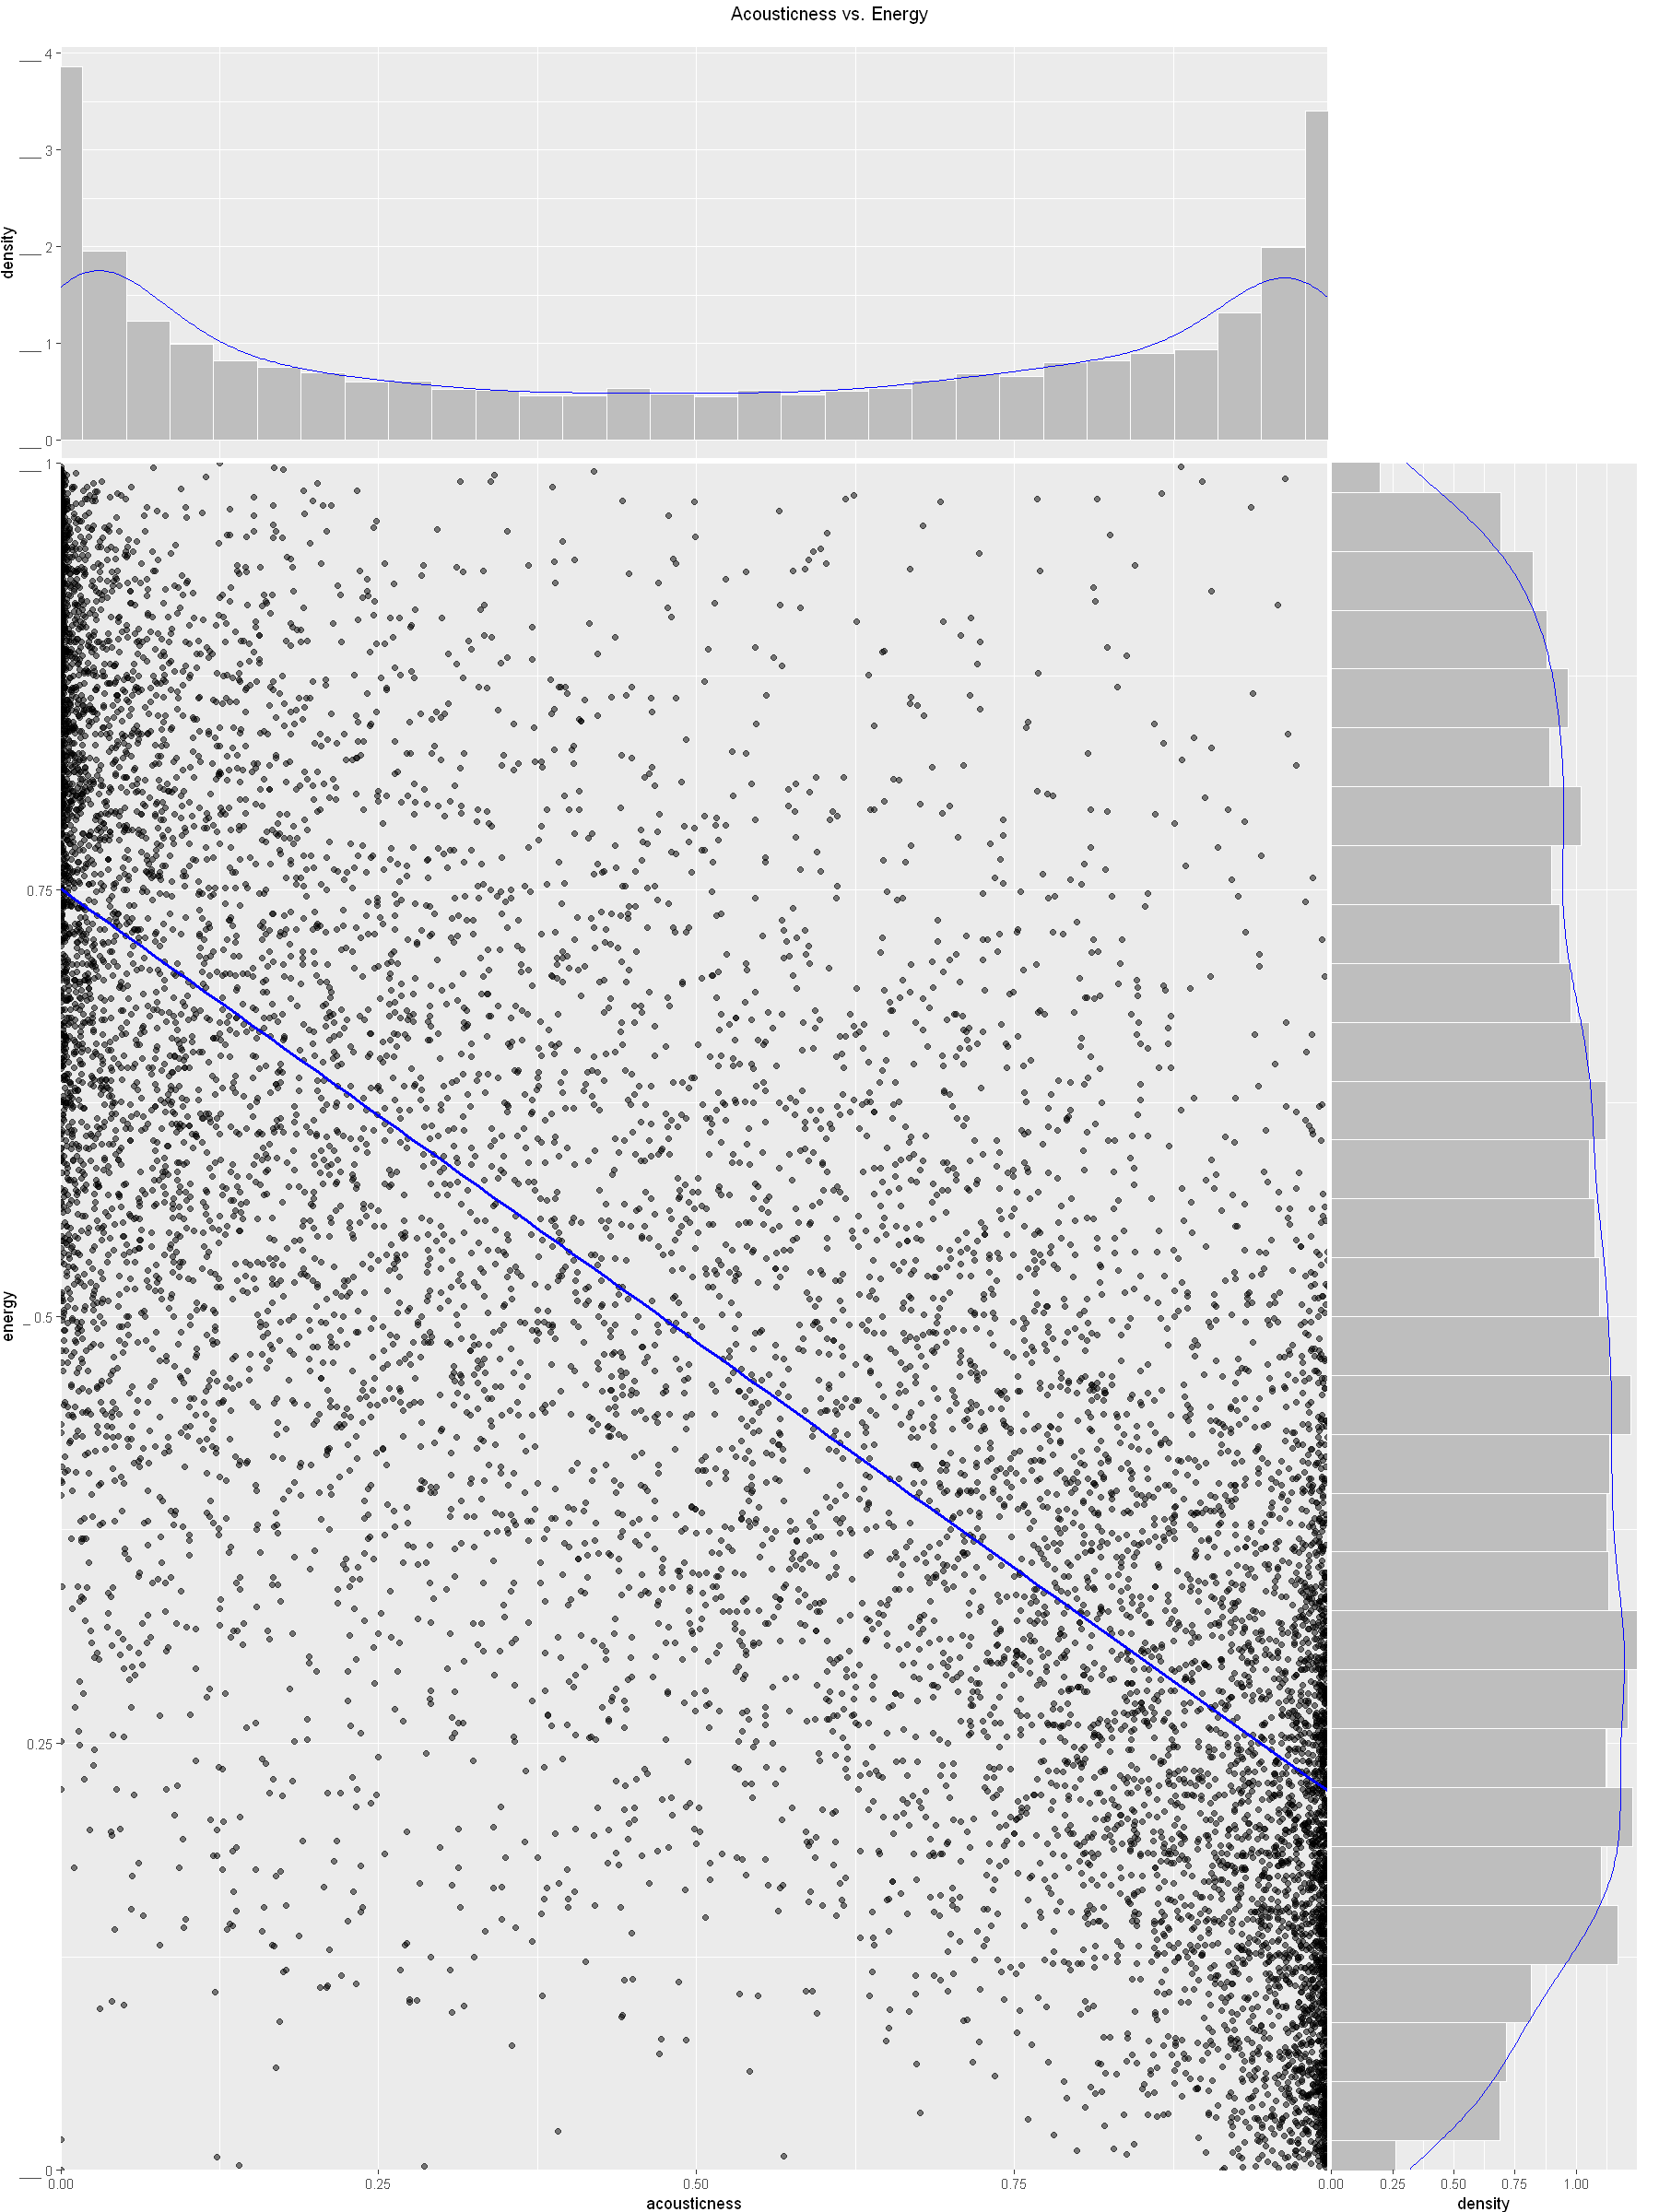

In [22]:
ScatterHist(spotify_data, "acousticness", "energy", title = "Acousticness vs. Energy")

corrplot 0.84 loaded



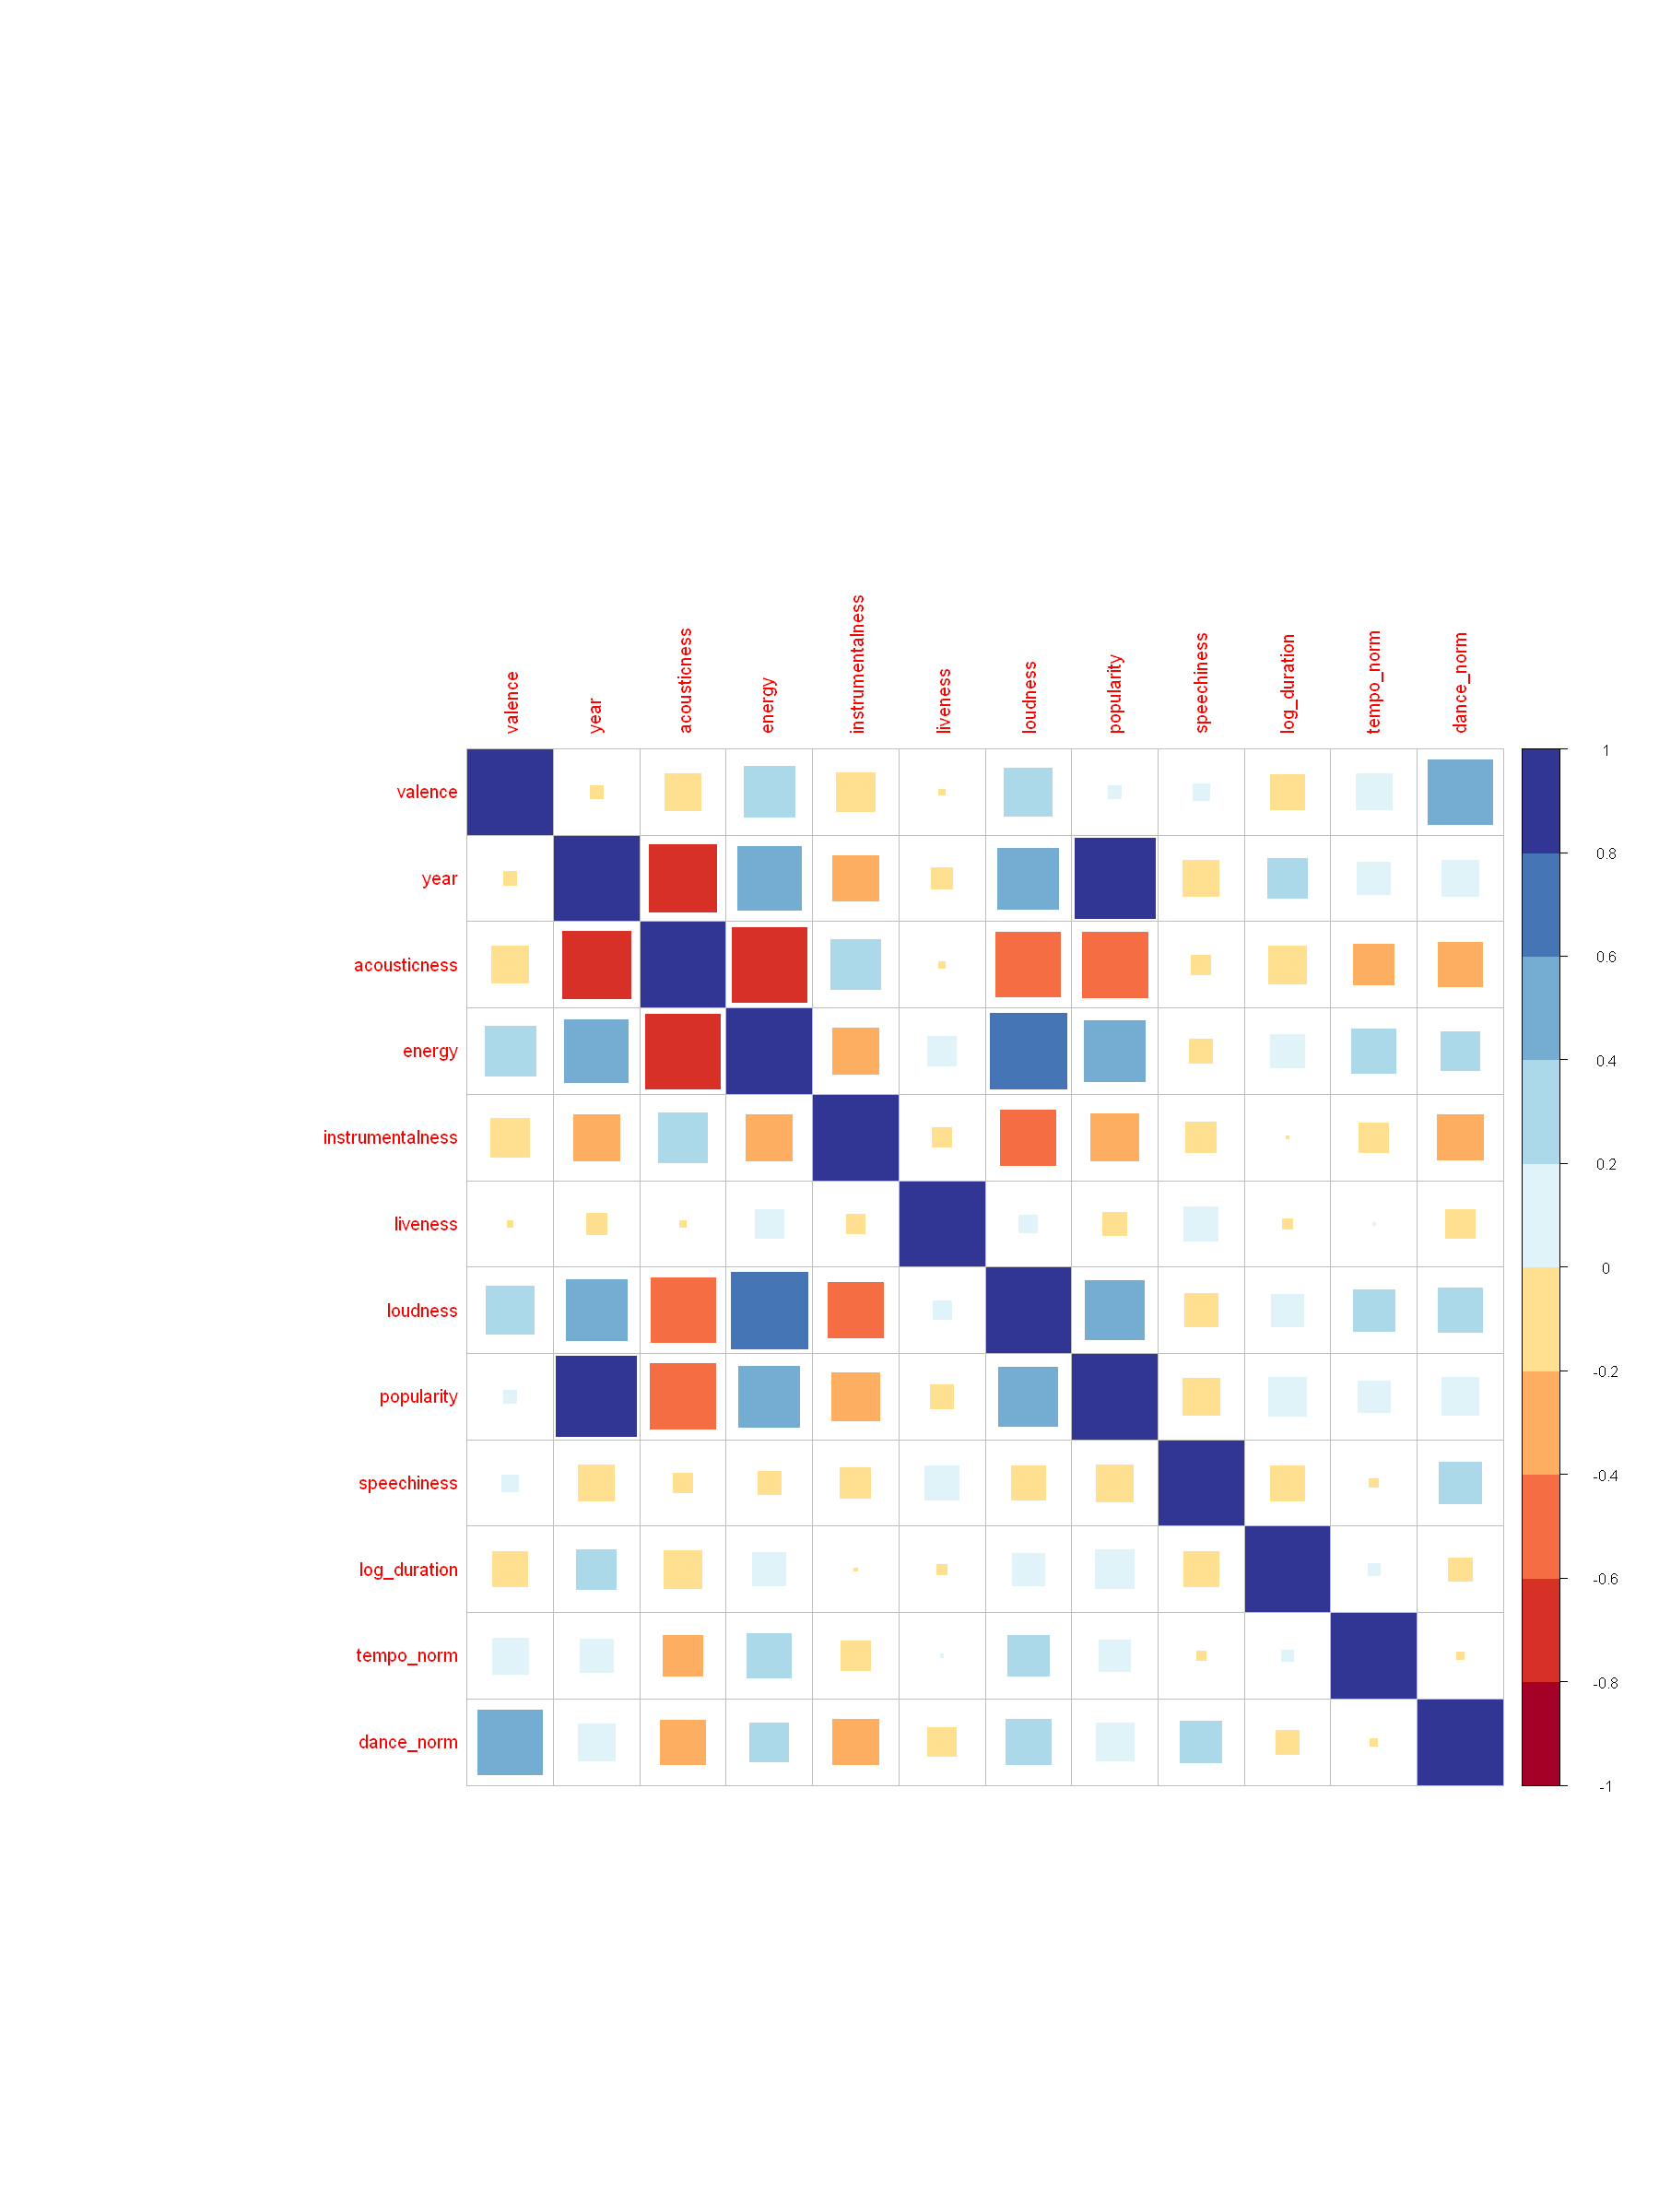

In [23]:
library(RColorBrewer)
library(corrplot)

data_quant <- spotify_data[, -c(6, 9, 12)]
M <- cor(data_quant)
corrplot(M, method = "square", col = brewer.pal(n = 10, name = "RdYlBu"))

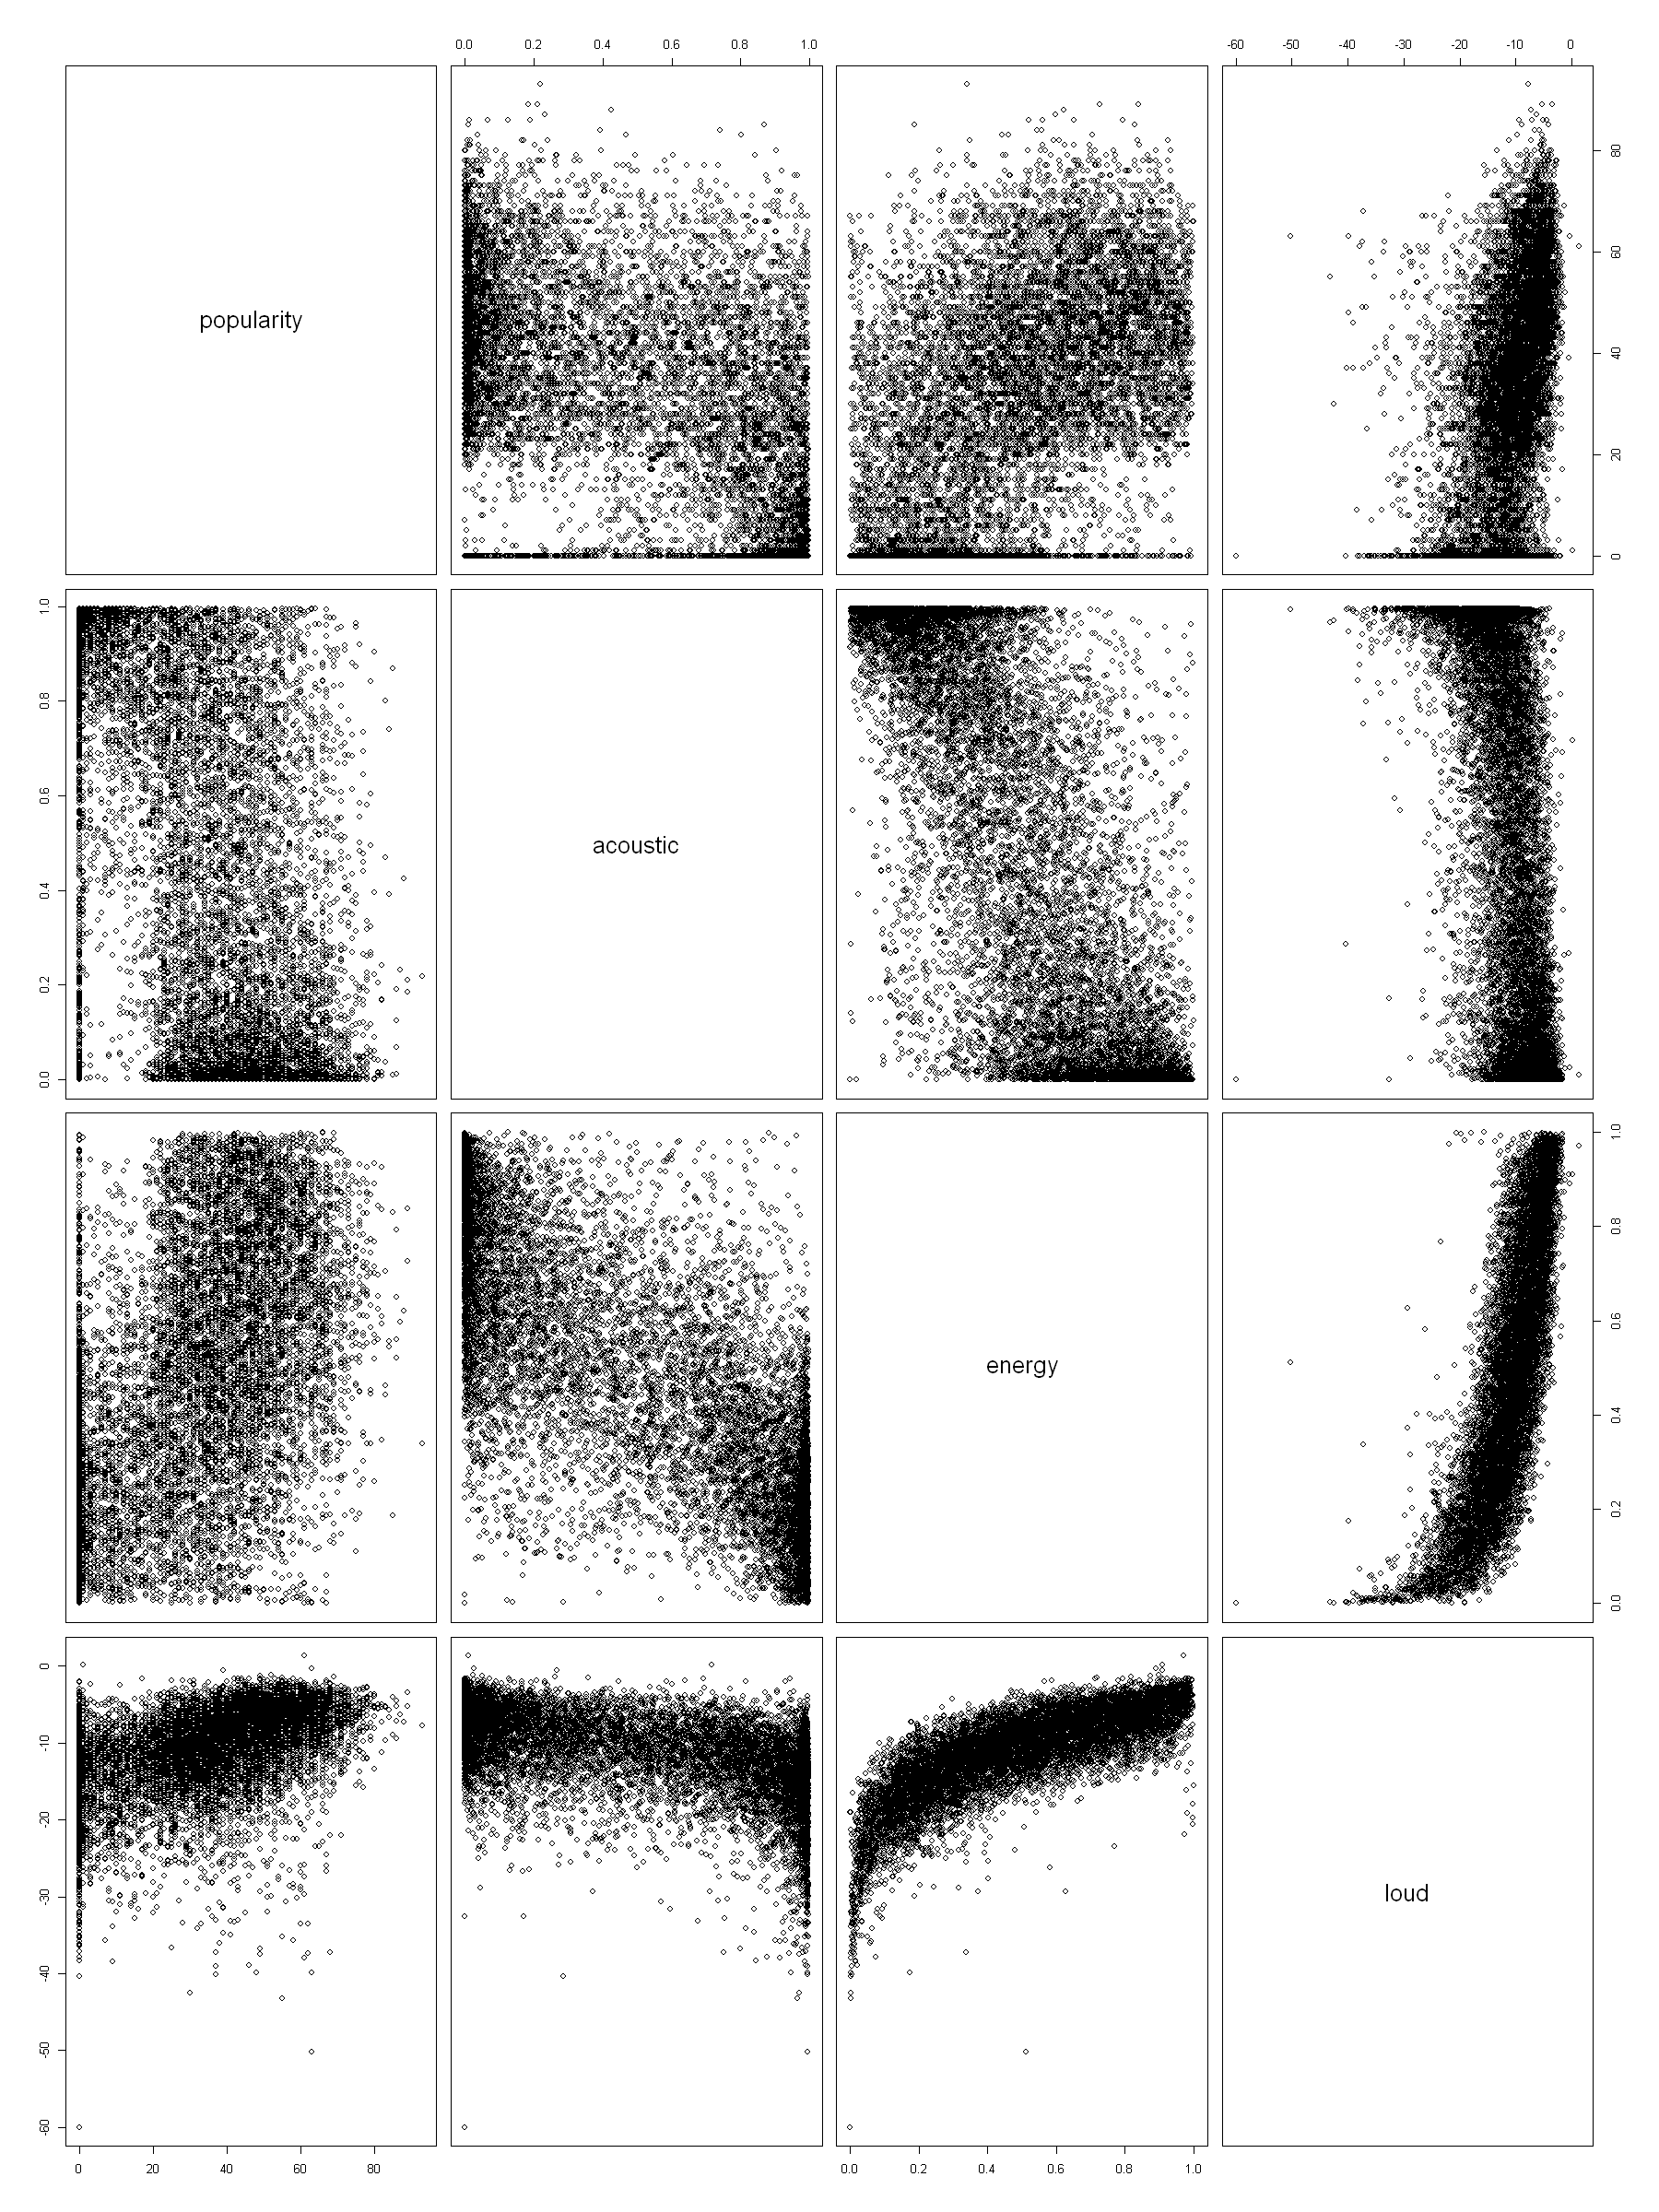

In [24]:
attributes = c("acousticness", "energy", "loudness", "popularity")

acoustic <- spotify_data$acousticness
energy <- spotify_data$energy
loud <- spotify_data$loudness

pairs(~popularity + acoustic + energy + loud, data = spotify_data)

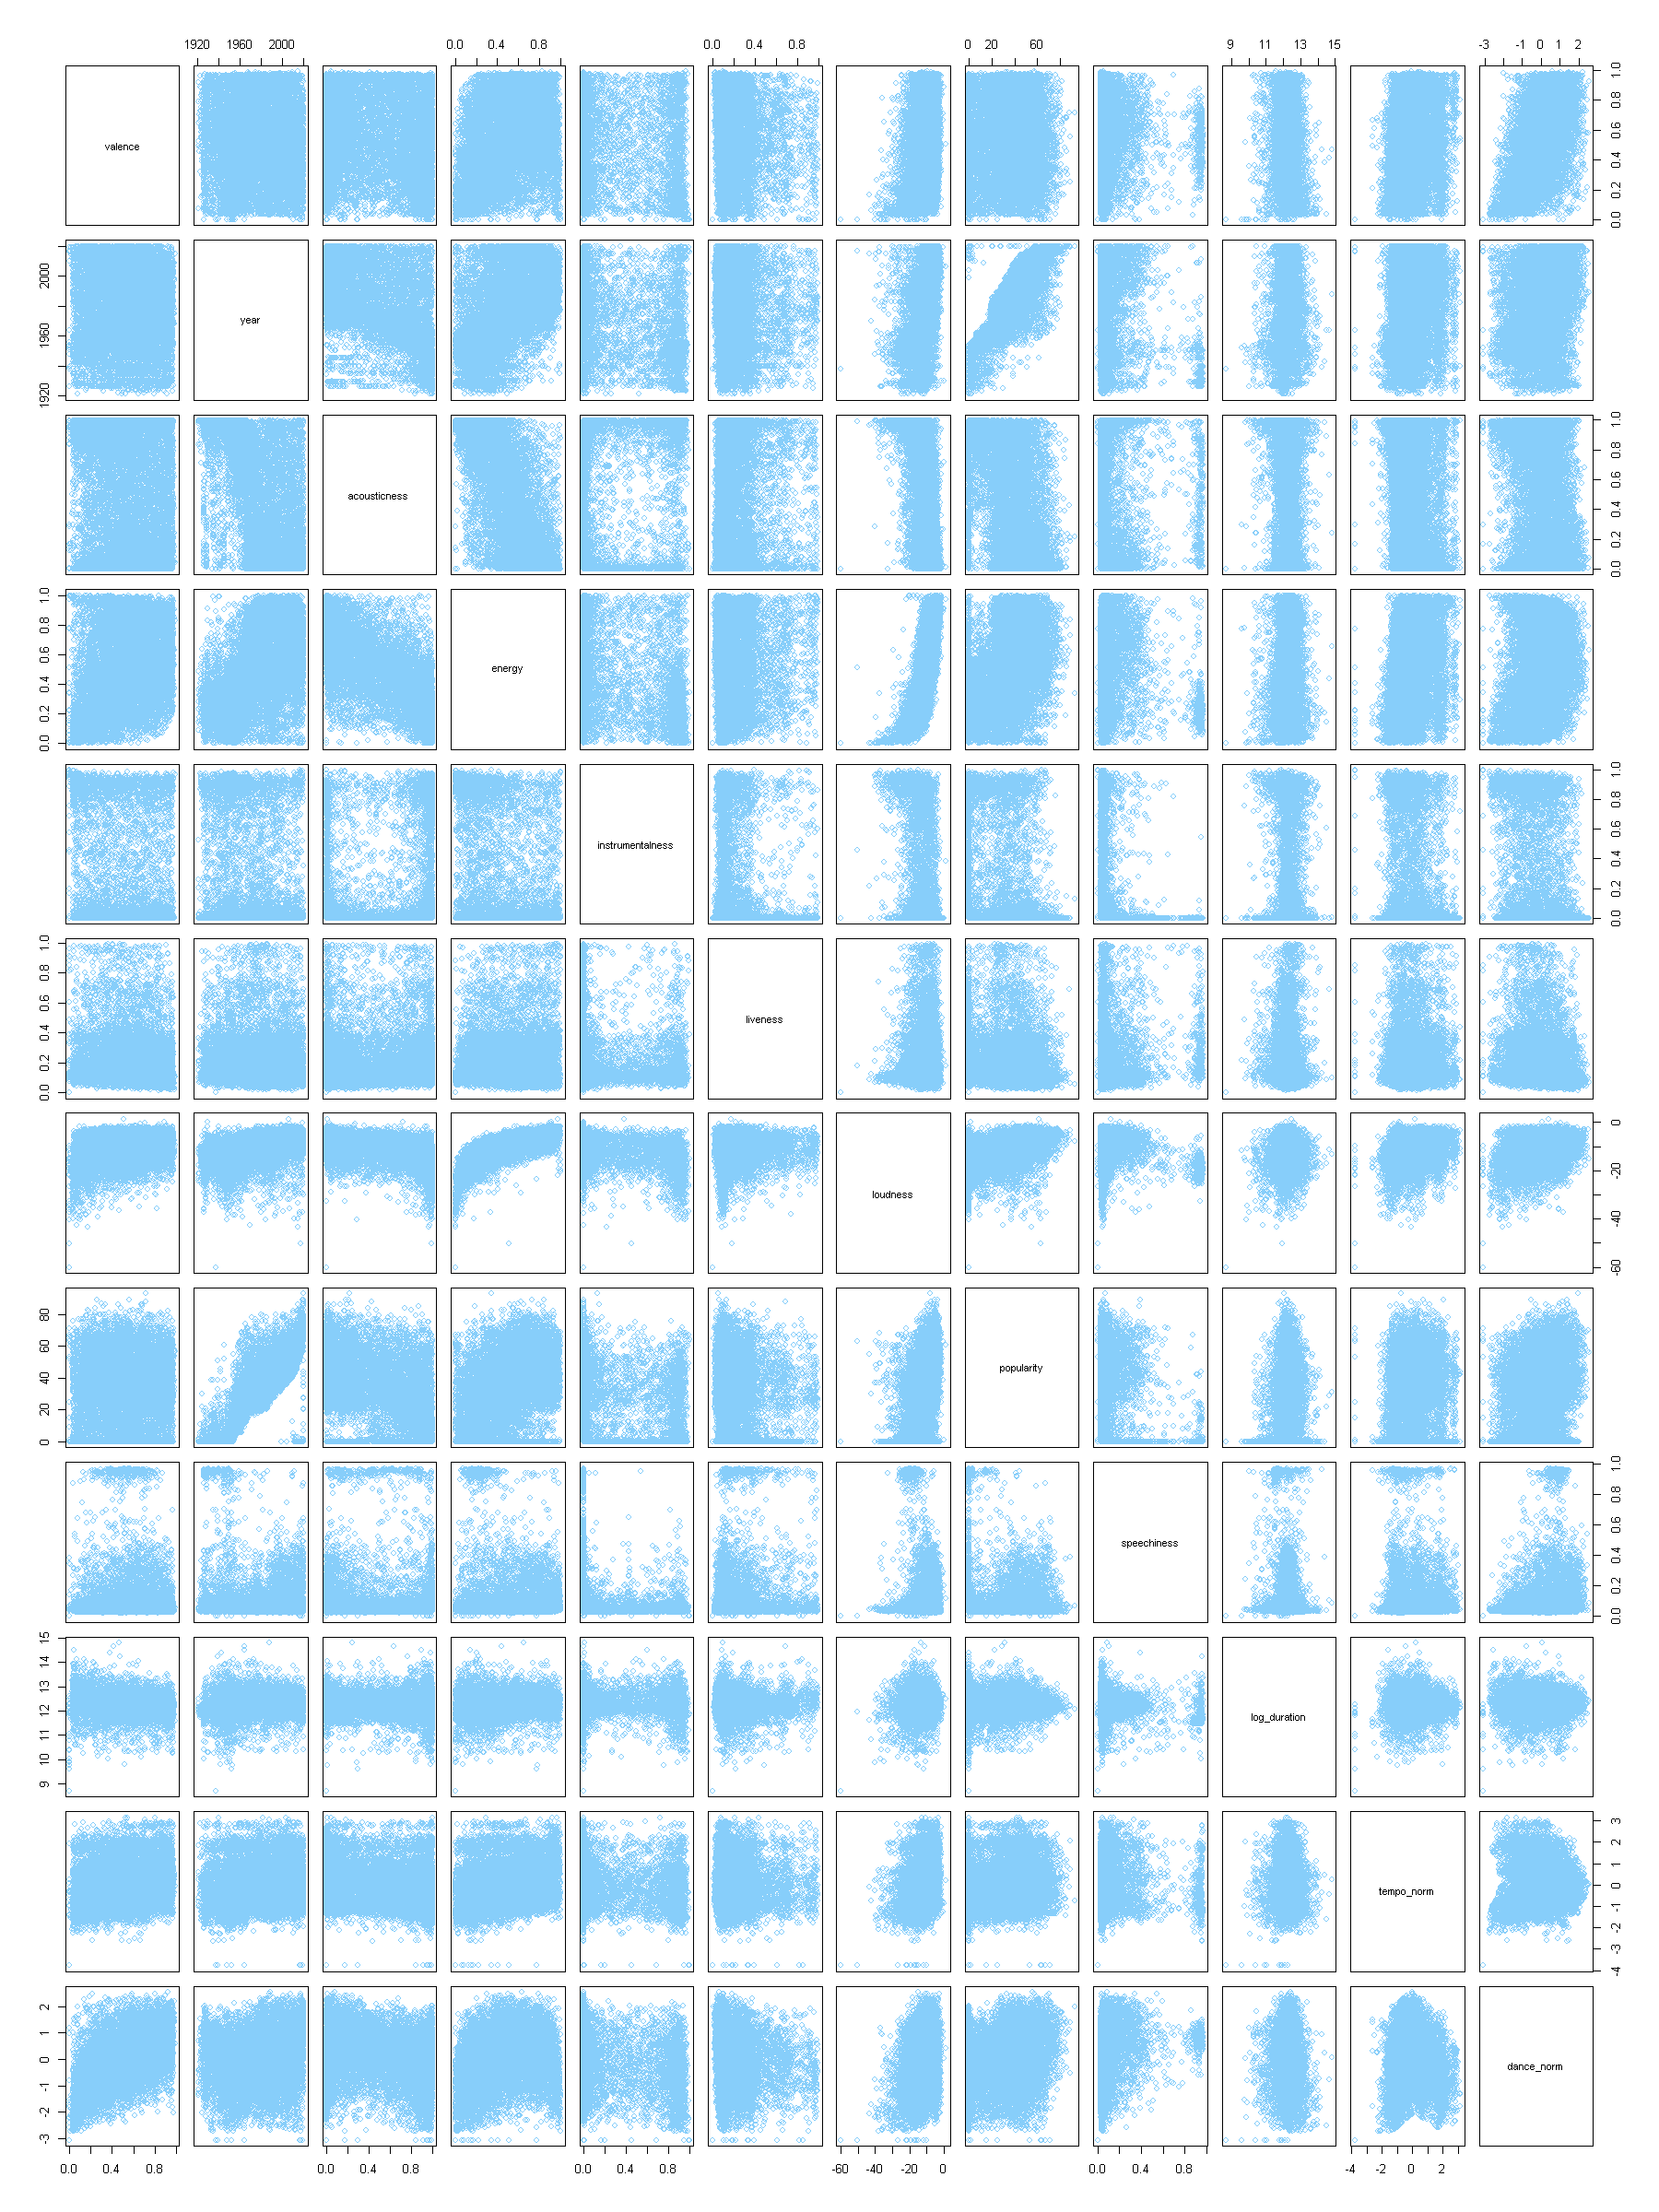

In [25]:
pairs(~., data = data_quant, col = "lightskyblue")

# ACP

In [26]:
library(FactoMineR)

data_quant <- data_quant[, -c(2)]
data.pca <- PCA(data_quant, scale.unit = T, graph = F, ncp = 6)

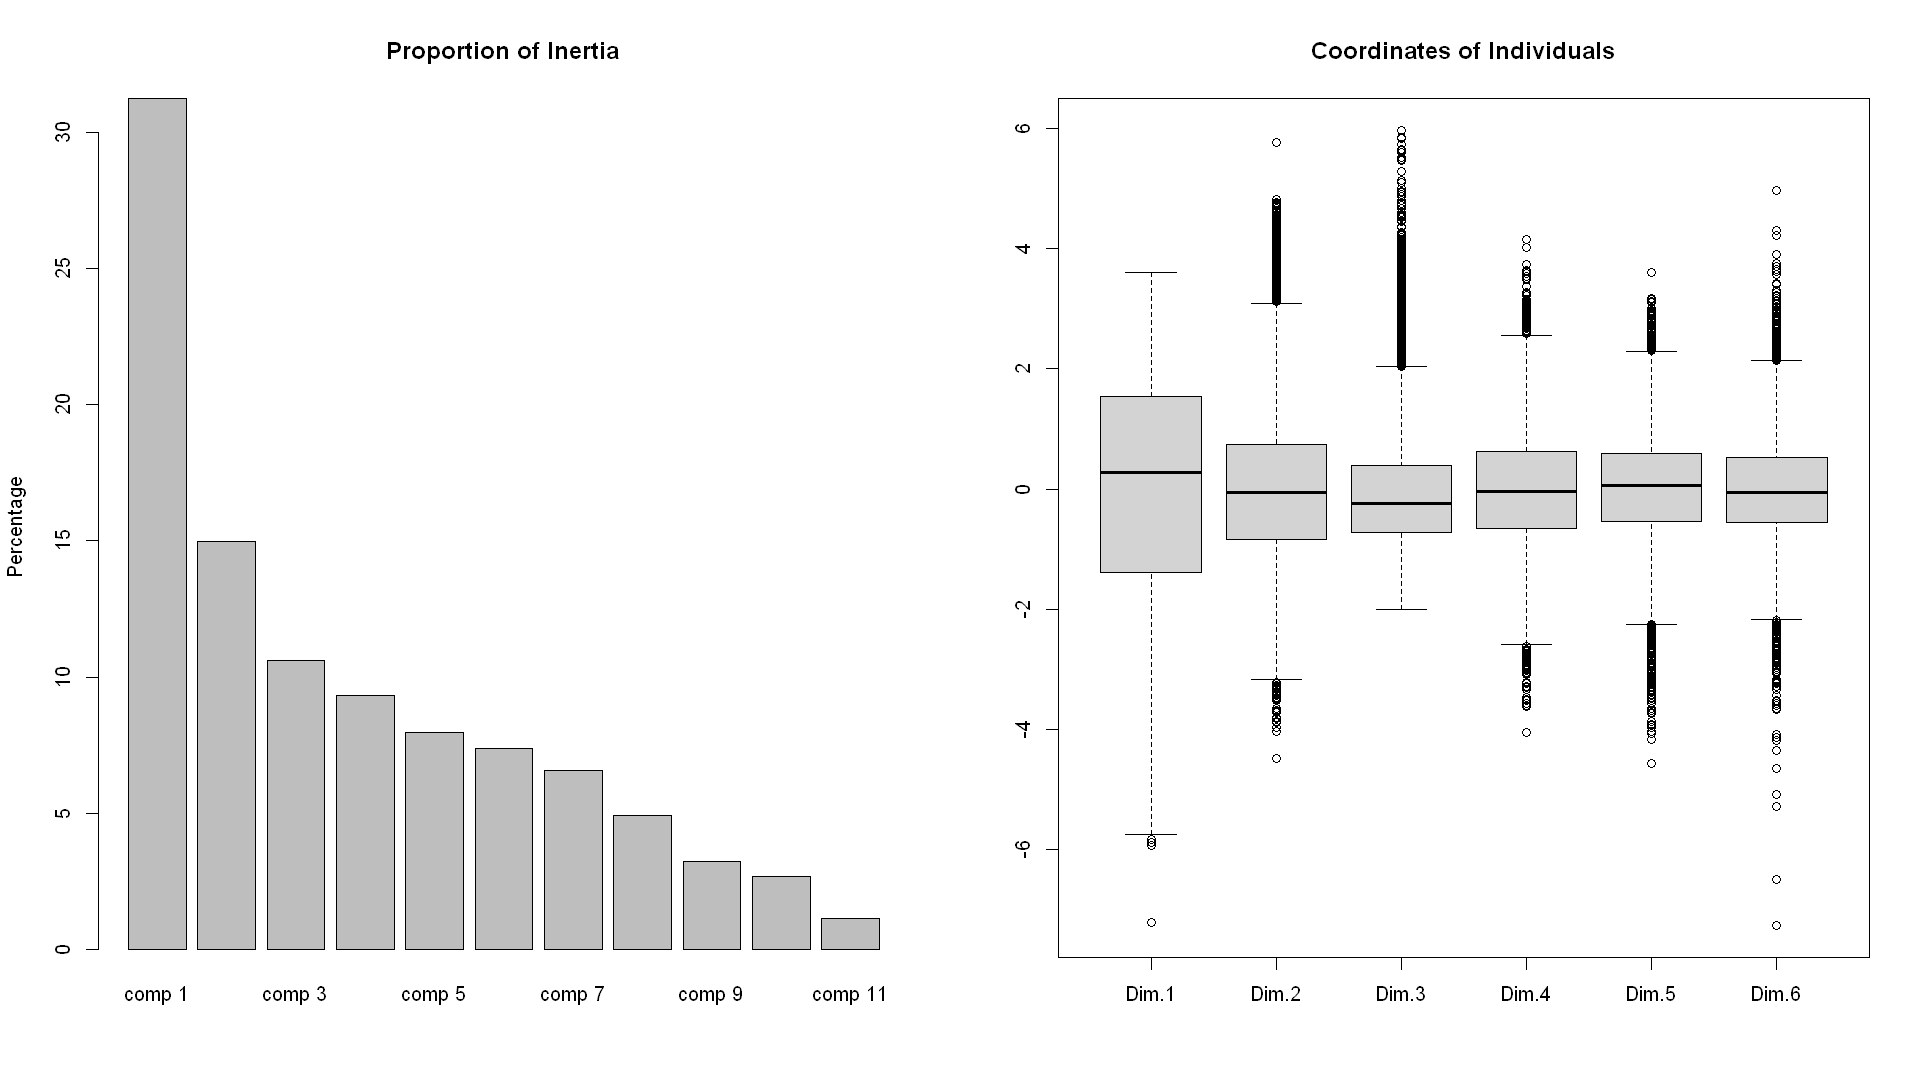

In [27]:
options(repr.plot.width = 16, repr.plot.height = 9)
par(mfrow = c(1, 2))
barplot(data.pca$eig[, 2], ylab = "Percentage", main = "Proportion of Inertia")
boxplot(data.pca$ind$coord, main = "Coordinates of Individuals")

In [28]:
library(factoextra)

eig.val <- get_eig(data.pca)
eig.val

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,3.4393357,31.266688,31.26669
Dim.2,1.6498929,14.999027,46.26571
Dim.3,1.1648060,10.589145,56.85486
Dim.4,1.0236432,9.305848,66.16071
Dim.5,0.8775986,7.978169,74.13888
Dim.6,0.8110445,7.373132,81.51201
Dim.7,0.7222607,6.566006,88.07801
Dim.8,0.5416478,4.924071,93.00209
Dim.9,0.3537159,3.215599,96.21768
Dim.10,0.2918396,2.653088,98.87077


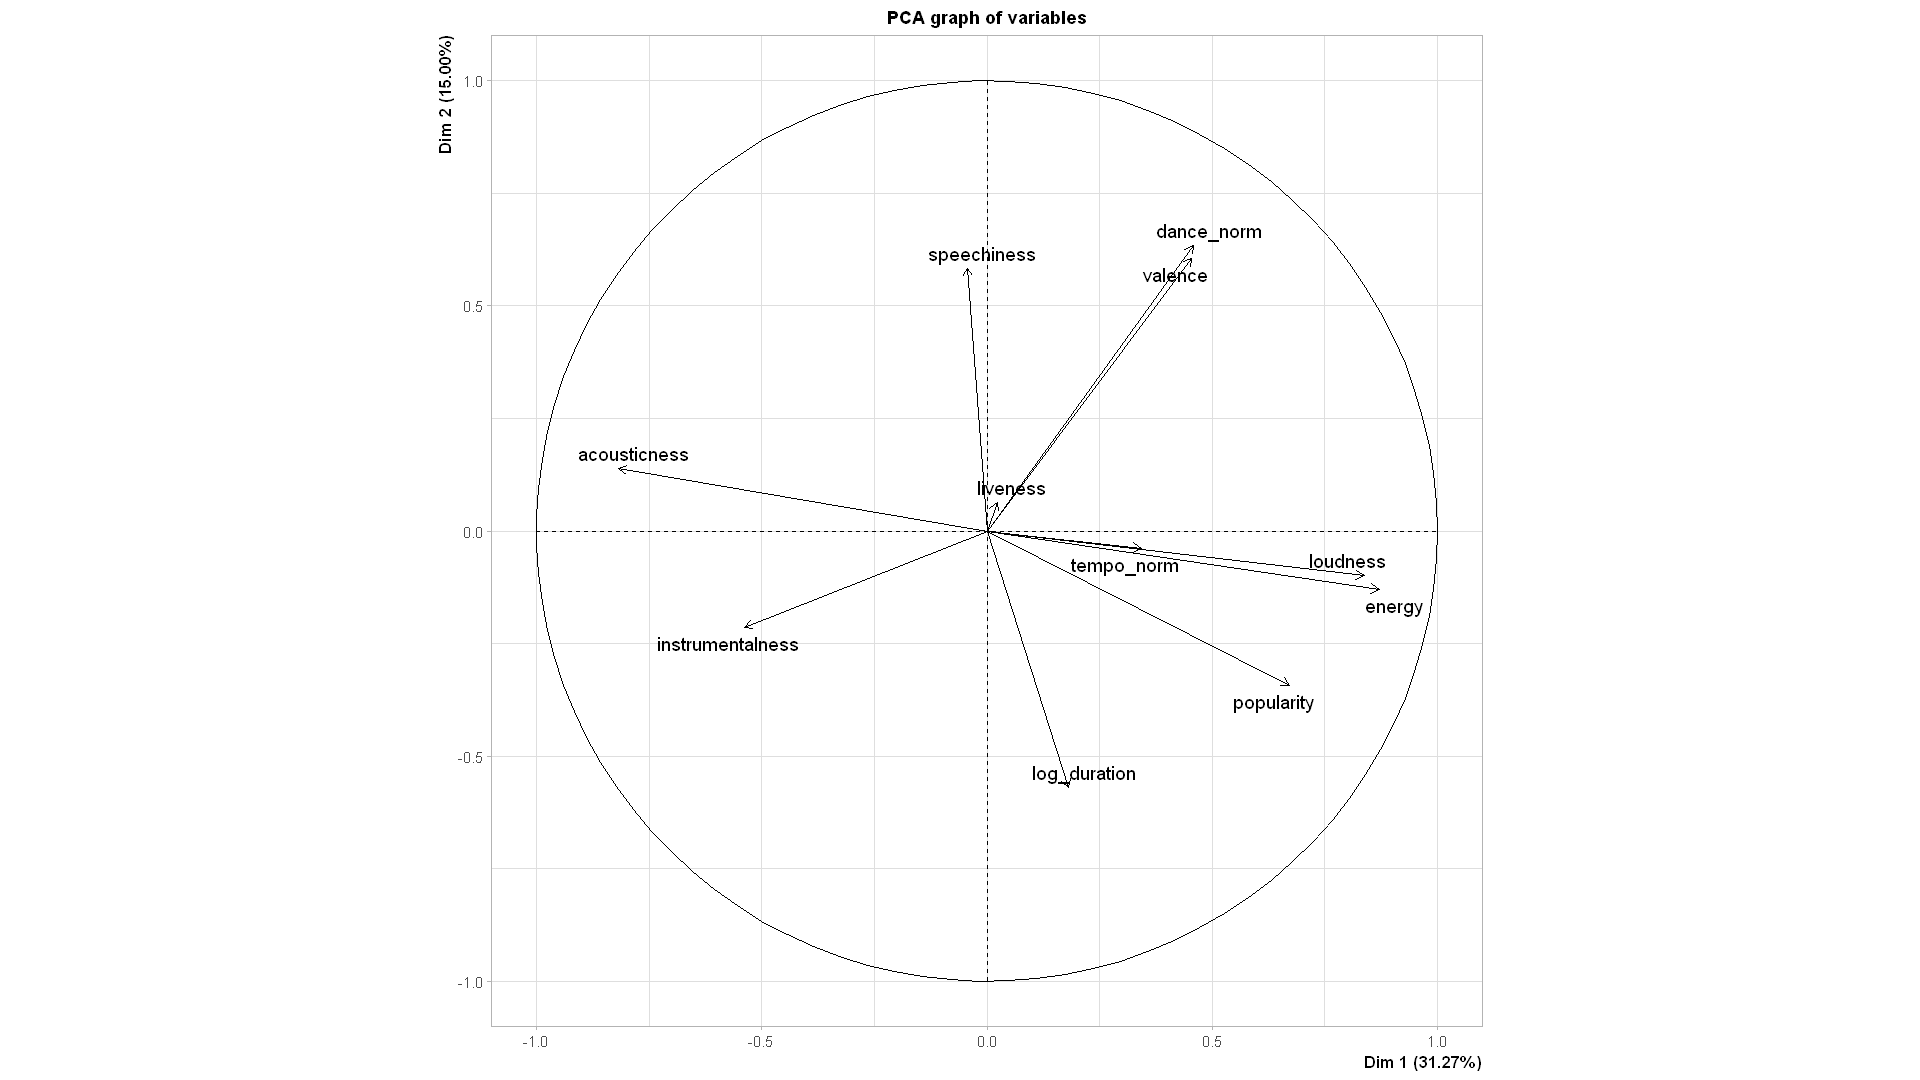

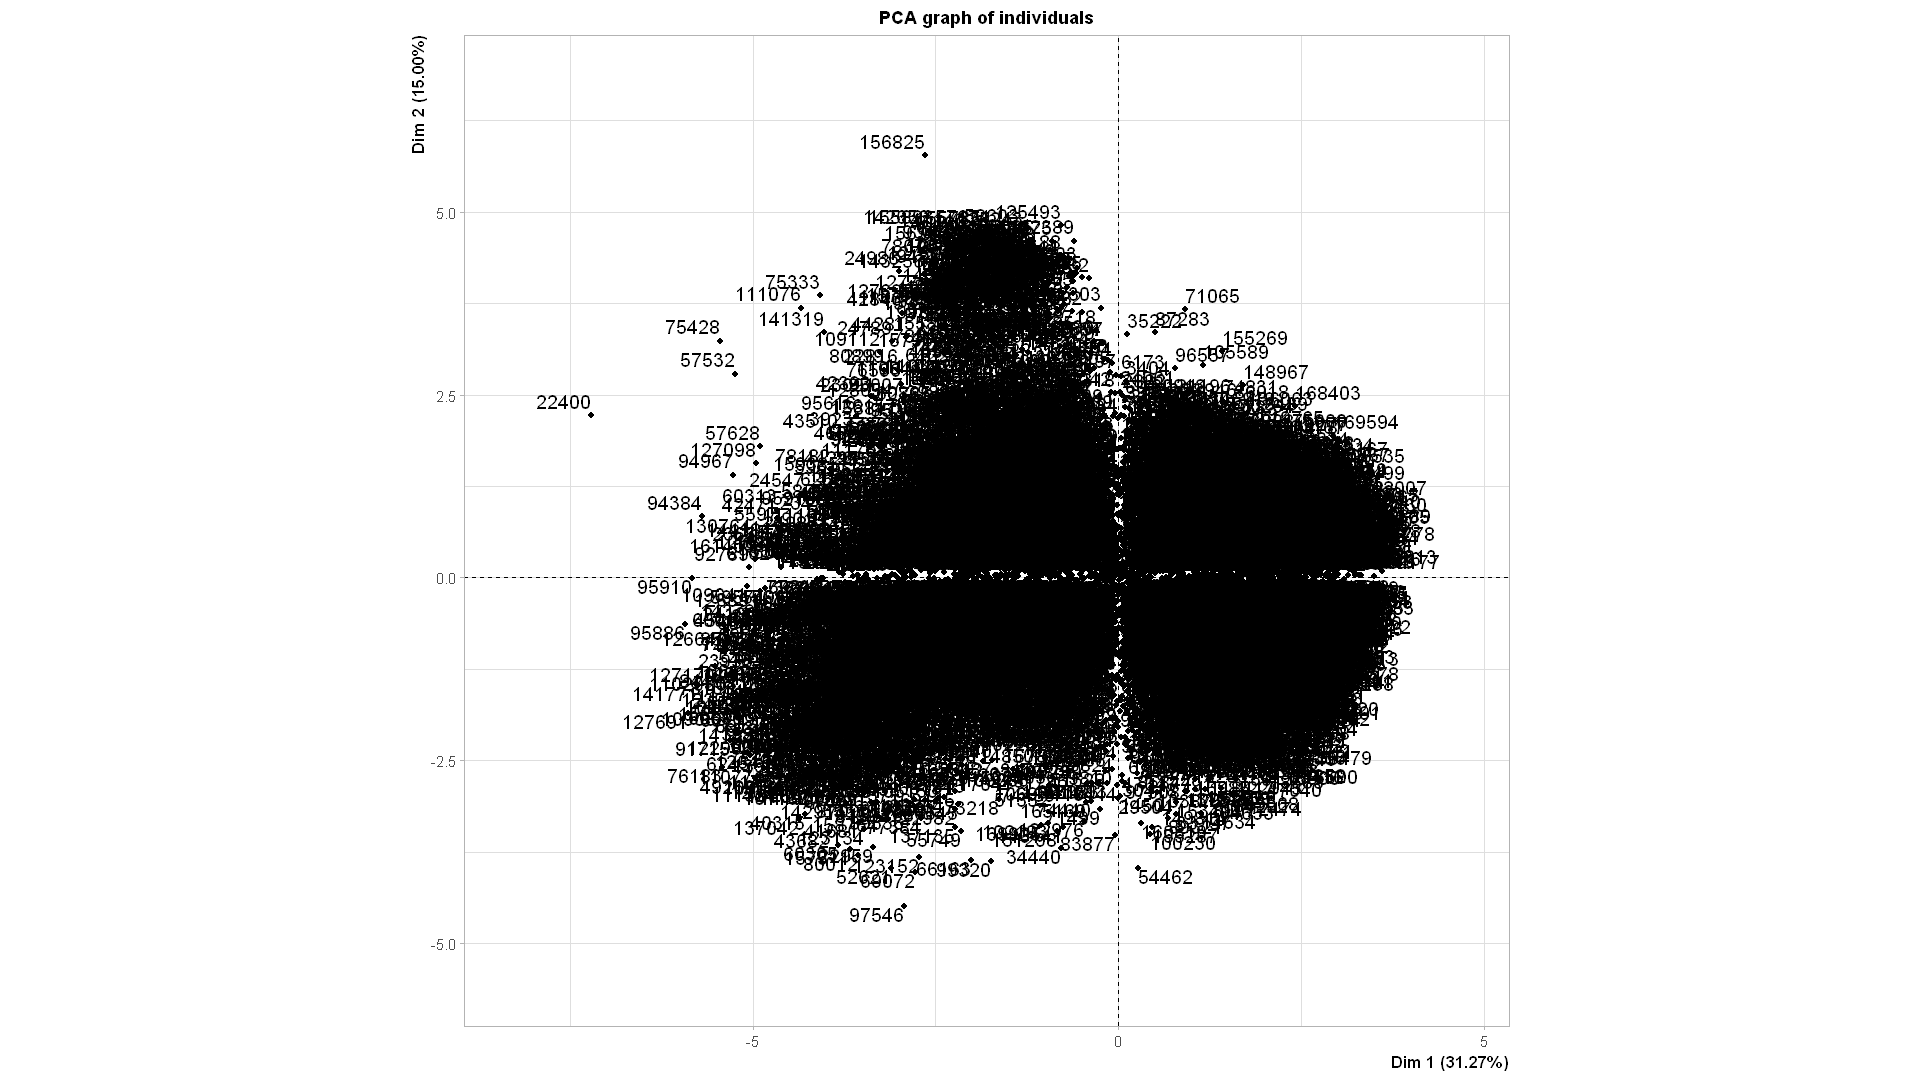

In [29]:
plot(data.pca, choix = "varcor")
plot(data.pca, choix = "ind")

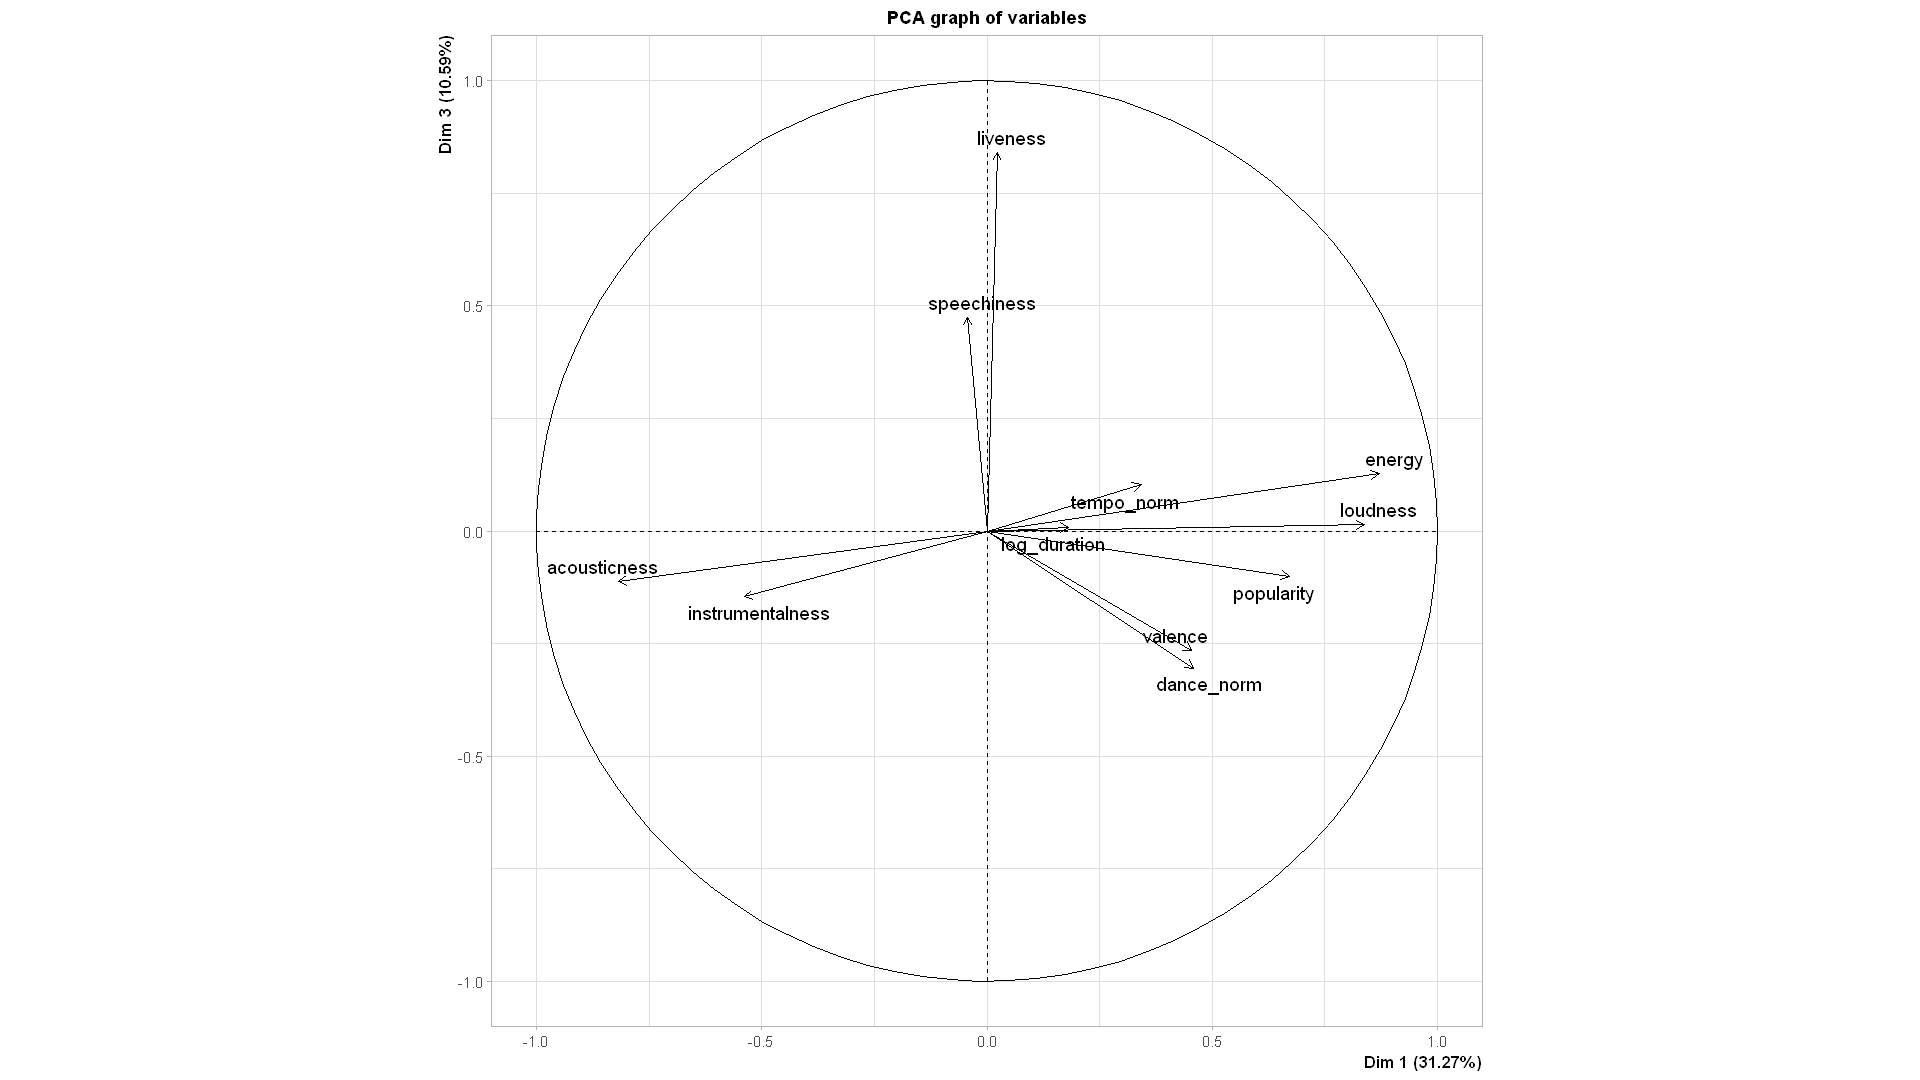

In [30]:
plot(data.pca, choix = "varcor", axes = c(1, 3))

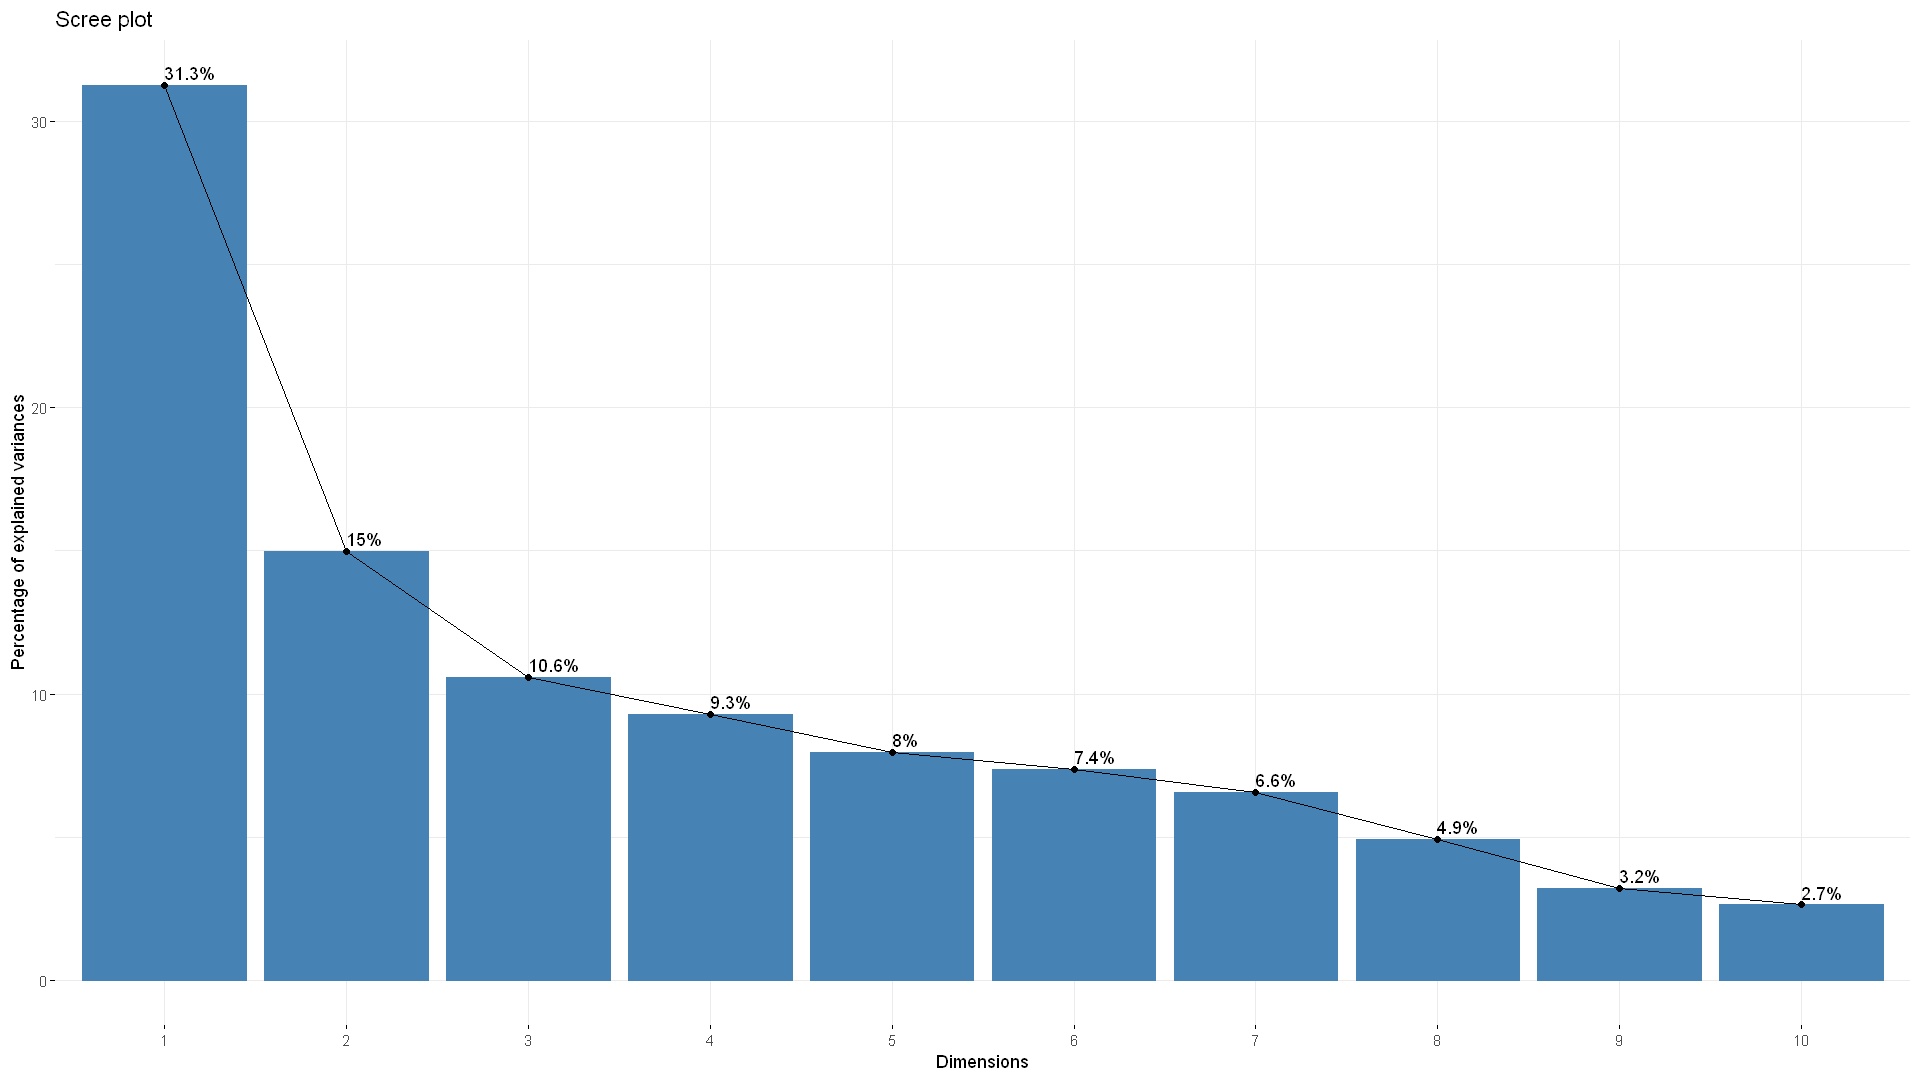

In [31]:
# Scree plot - Eigenvalues
fviz_eig(data.pca, addlabels = TRUE)

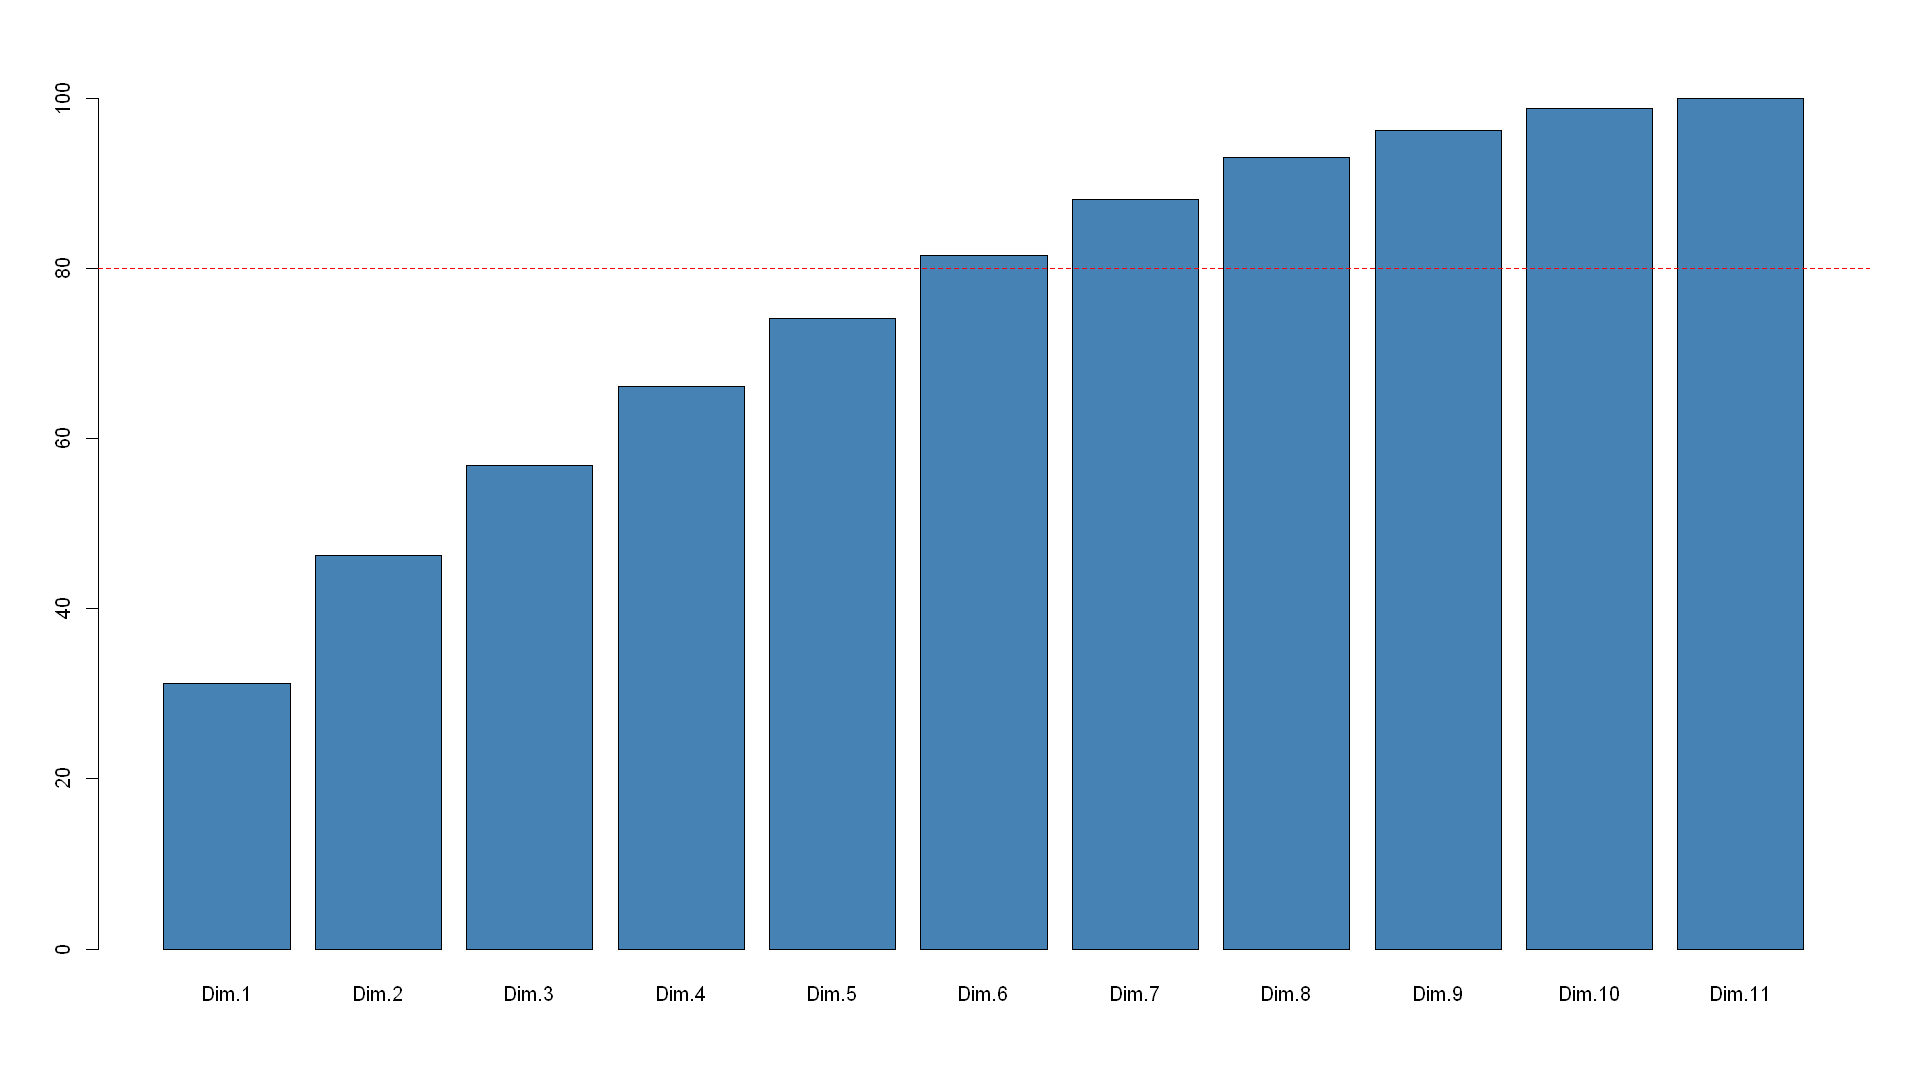

In [32]:
barplot(eig.val[, 3], col = rgb(70/255, 130/255, 180/255))
abline(h = 80, col = "red", lty = 2)

In [33]:
var <- get_pca_var(data.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

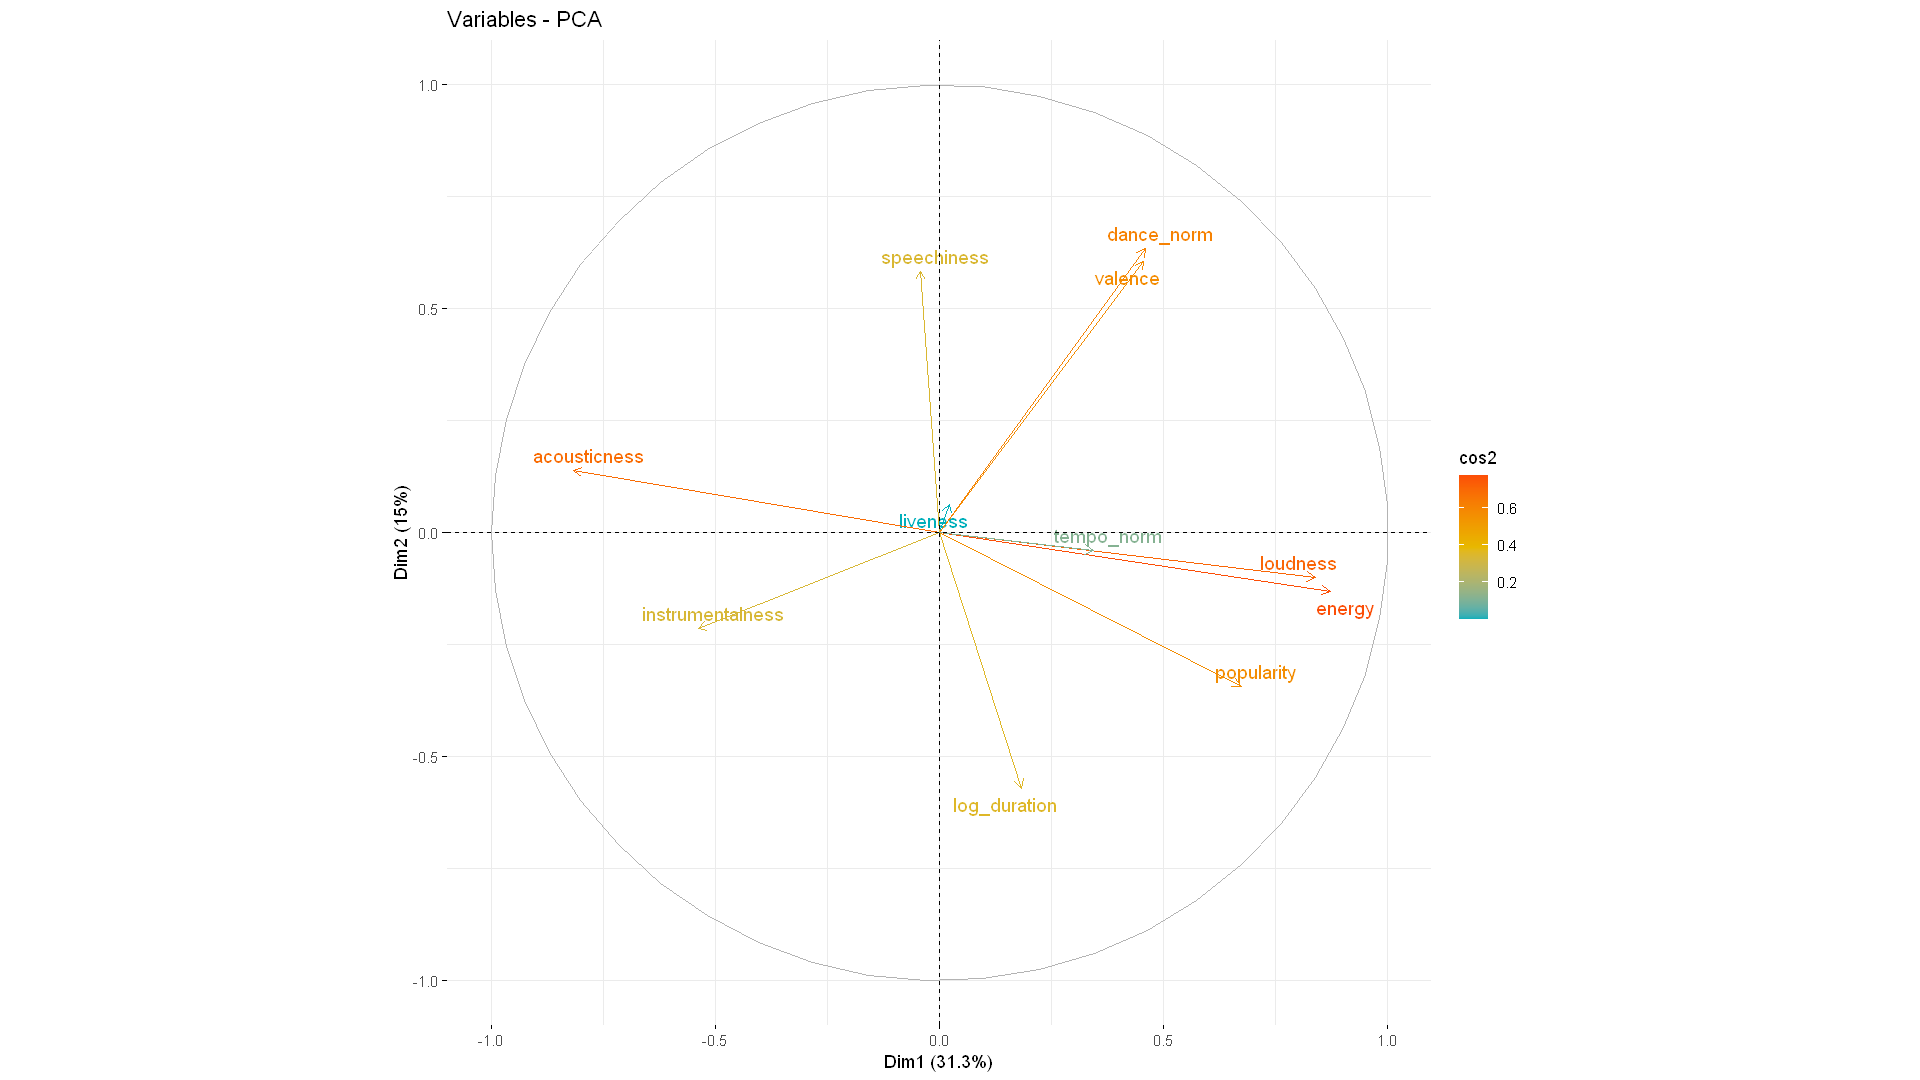

In [34]:
fviz_pca_var(data.pca, col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", 
    "#FC4E07"), repel = TRUE)

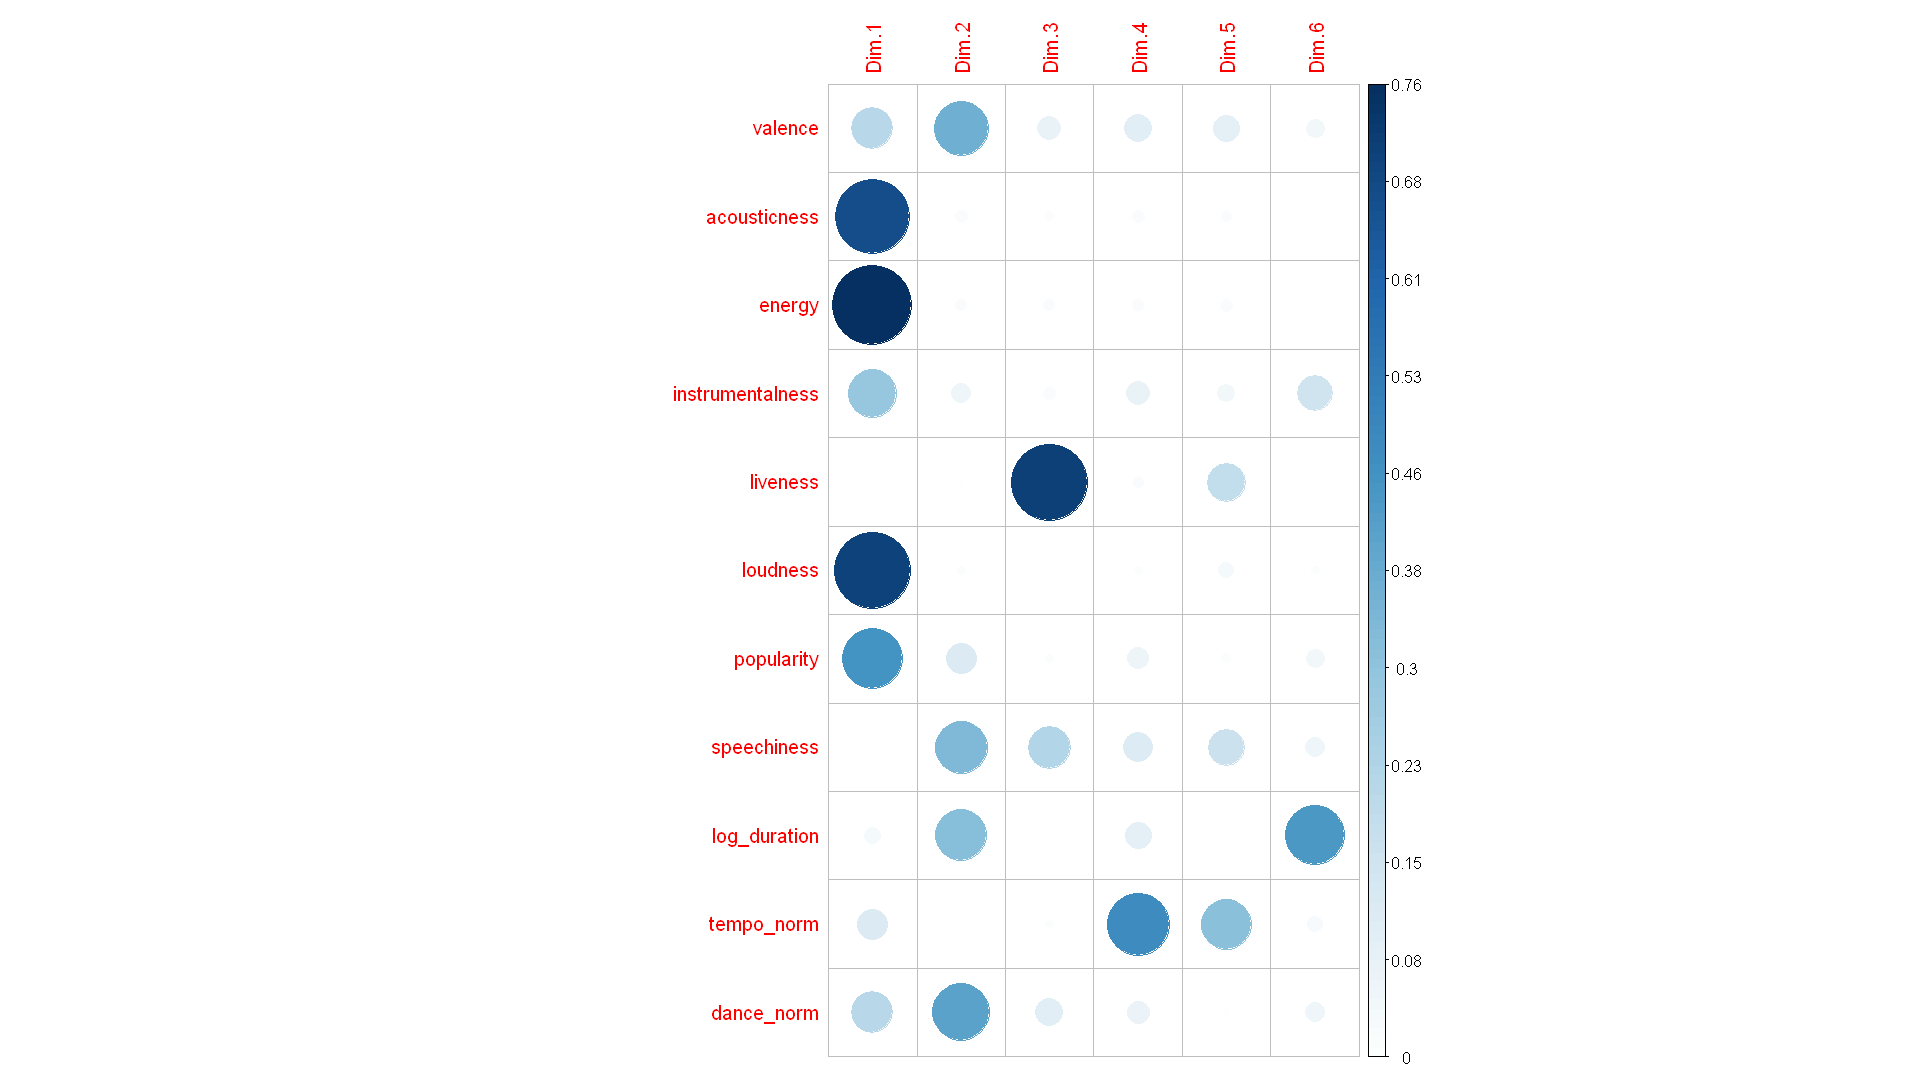

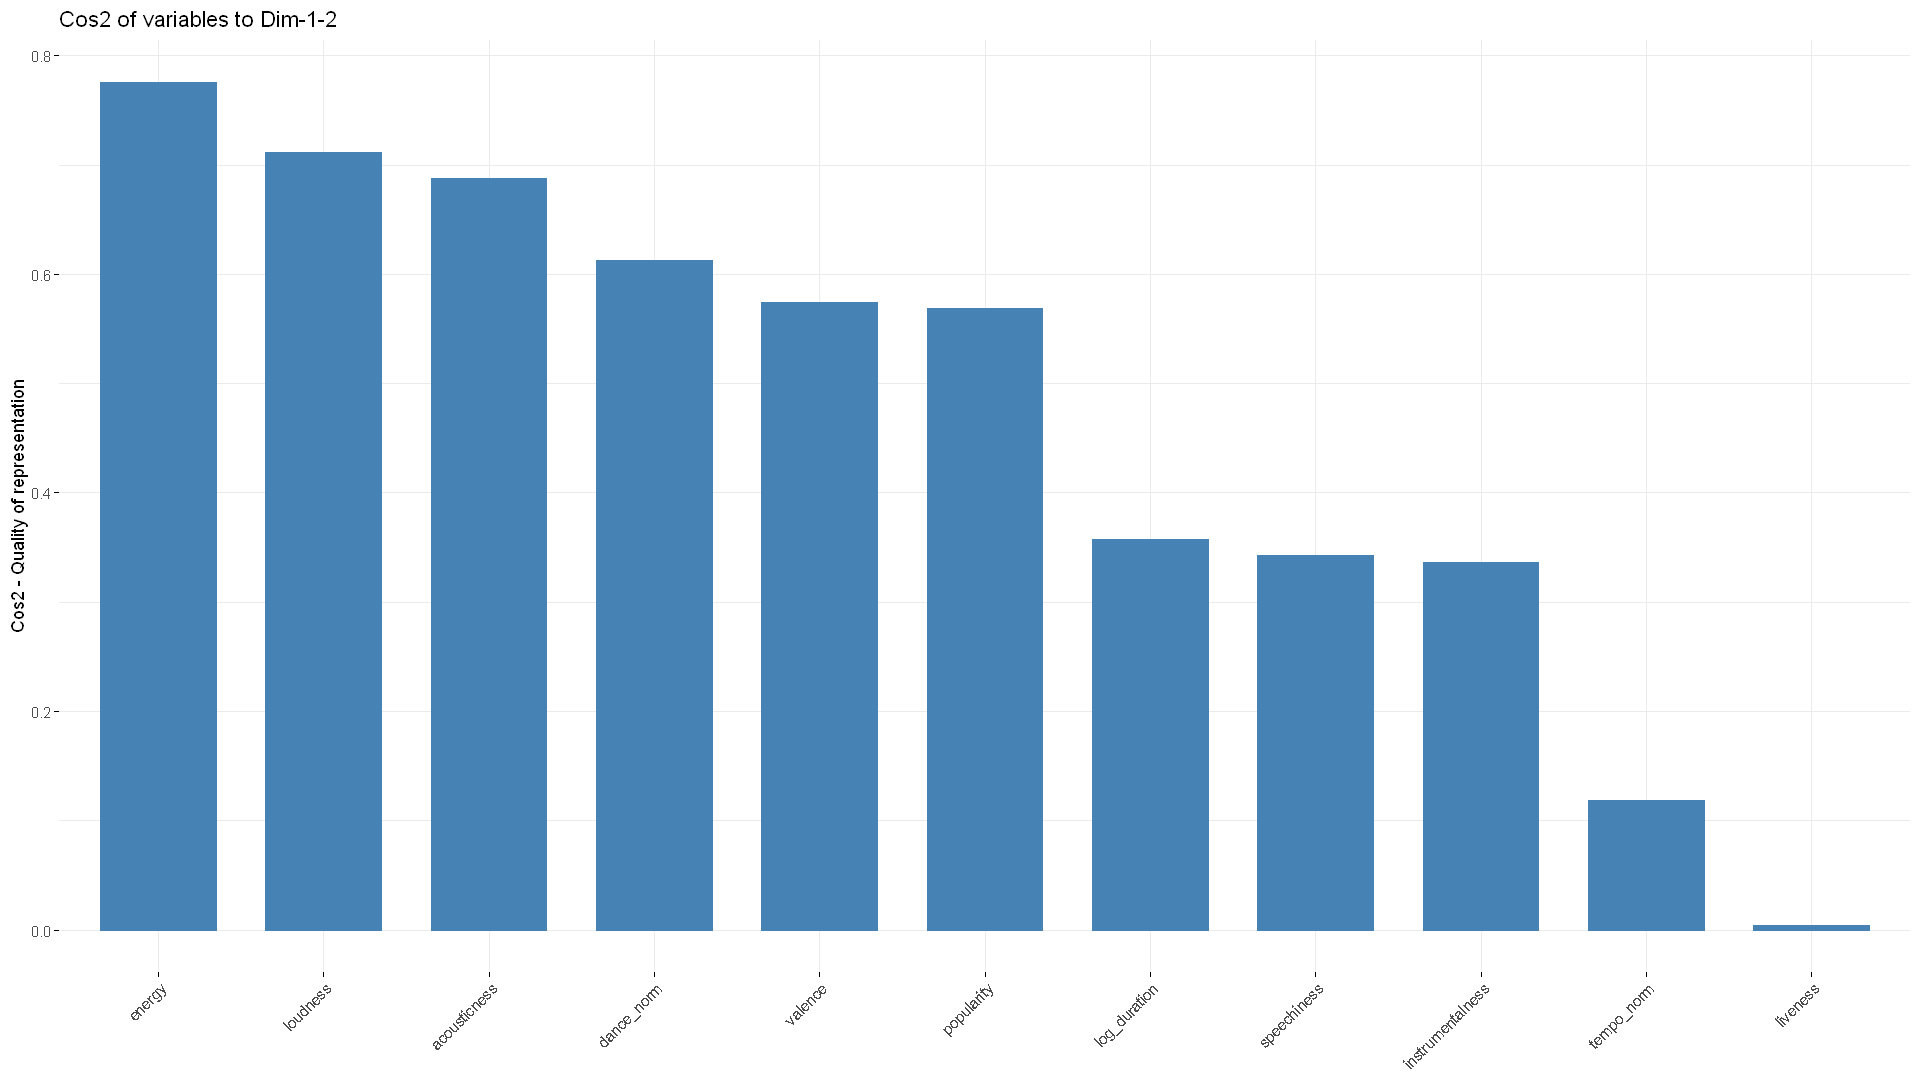

In [35]:
corrplot(var$cos2, is.corr = FALSE)
fviz_cos2(data.pca, choice = "var", axes = 1:2)

# Préparation des données

In [36]:
spotify_pop_class = spotify_data$pop.class
spotify_key = spotify_data$key

In [37]:
spotify_pop_class_encoded = as.numeric(factor(spotify_pop_class))-1
spotify_pop_class_encoded[0:10]

[1] 2 1 0 2 2 0 1 1 0 1

In [38]:
spotify_key_encoded = as.numeric(factor(spotify_key))-1
spotify_key_encoded[0:10]

[1]  2  1  2  2 10  5 10  7  5  9

In [39]:
spotify_data$key = spotify_key_encoded
spotify_data$pop.class = spotify_pop_class_encoded

In [40]:
X = subset(spotify_data, select = -c(popularity, pop.class))
y_class = spotify_data$pop.class
y_reg = spotify_data$popularity

In [41]:
head(X)

,valence,year,acousticness,energy,instrumentalness,key,liveness,loudness,mode,speechiness,log_duration,tempo_norm,dance_norm
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>"
161704,0.647,1975,0.4490,0.827,7.88e-03,2,0.466,-7.604,1,0.3990,12.60766,1.7310595,-0.9309645
168077,0.150,2008,0.8990,0.169,1.12e-05,1,0.136,-11.332,1,0.0553,12.37497,-0.3031657,-0.1817845
35922,0.423,2007,0.0185,0.878,8.39e-02,2,0.276,-5.576,0,0.0377,12.61517,1.0729184,-0.3974575
135823,0.302,1995,0.0384,0.980,5.52e-01,2,0.237,-3.154,1,0.0721,11.86499,1.7985786,-2.0660858
165395,0.828,1994,0.5310,0.625,7.73e-06,10,0.348,-11.963,0,0.0639,12.14313,-0.6146381,0.9363100
38184,0.489,2018,0.3710,0.694,0.00e+00,5,0.109,-4.393,1,0.1690,12.68908,0.1683698,1.7933266


In [42]:
print(y_reg[0:5])
print(y_class[0:15])

[1] 25 42 65 36 38
 [1] 2 1 0 2 2 0 1 1 0 1 3 1 2 3 3


# Apprentissage

## Classification

### Régression logistique

#### Multinomiale

#### OVR

### Random Forst

### Decision Trees

### LinearSVC

#### OVR

#### Crammer-Singer

### SVC

### Réseaux de neurones

## Régression

### Régression linéaire

#### Sans pénalisation

#### Avec pénalisation Lasso

#### Avec pénalisation Ridge

#### Avec pénalisation ElasticNet

### Random Forest

### Decision Trees

### Linear SVR

### SVR

### Réseaux de neurones

In [43]:
set.seed(42)
test.ratio <- 0.25
npop <- nrow(spotify_data)
nvar <- ncol(spotify_data)
ntest <- ceiling(npop * test.ratio)
testi <- sample(1:npop, ntest)
appri <- setdiff(1:npop, testi)

In [44]:
# construction de l'échantillon d'apprentissage
datappr <- spotify_data[appri, -12]
# construction de l'échantillon test
datestr <- spotify_data[testi, -12]
# vérification
str(datappr)
str(datestr)
# summary(datappr)

'data.frame':	8000 obs. of  14 variables:
 $ valence         : num  0.647 0.423 0.302 0.828 0.489 0.963 0.411 0.463 0.151 0.42 ...
 $ year            : int  1975 2007 1995 1994 2018 2003 1980 2001 1959 2013 ...
 $ acousticness    : num  0.449 0.0185 0.0384 0.531 0.371 0.523 0.36 0.137 0.987 0.167 ...
 $ energy          : num  0.827 0.878 0.98 0.625 0.694 0.615 0.732 0.562 0.0359 0.736 ...
 $ instrumentalness: num  7.88e-03 8.39e-02 5.52e-01 7.73e-06 0.00 1.48e-06 3.14e-04 2.90e-03 7.27e-05 8.78e-03 ...
 $ key             : num  2 2 2 10 5 10 5 9 3 2 ...
 $ liveness        : num  0.466 0.276 0.237 0.348 0.109 0.0794 0.0755 0.0463 0.121 0.124 ...
 $ loudness        : num  -7.6 -5.58 -3.15 -11.96 -4.39 ...
 $ mode            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 2 1 2 1 ...
 $ popularity      : int  25 65 36 38 68 47 61 49 16 58 ...
 $ speechiness     : num  0.399 0.0377 0.0721 0.0639 0.169 0.092 0.0282 0.045 0.0446 0.0384 ...
 $ log_duration    : num  12.6 12.6 11.9 12.1 12.7 ...
 $ 

In [45]:
plot.res <- function(x, y, titre = "titre") {
    plot(x, y, col = "blue", xlim = c(0, 250), ylim = c(-100, 100), ylab = "Résidus", 
        xlab = "Valeurs prédites", main = titre, pch = 20)
    # points(x2, y, col='red')
    abline(h = 0, col = "green")
}

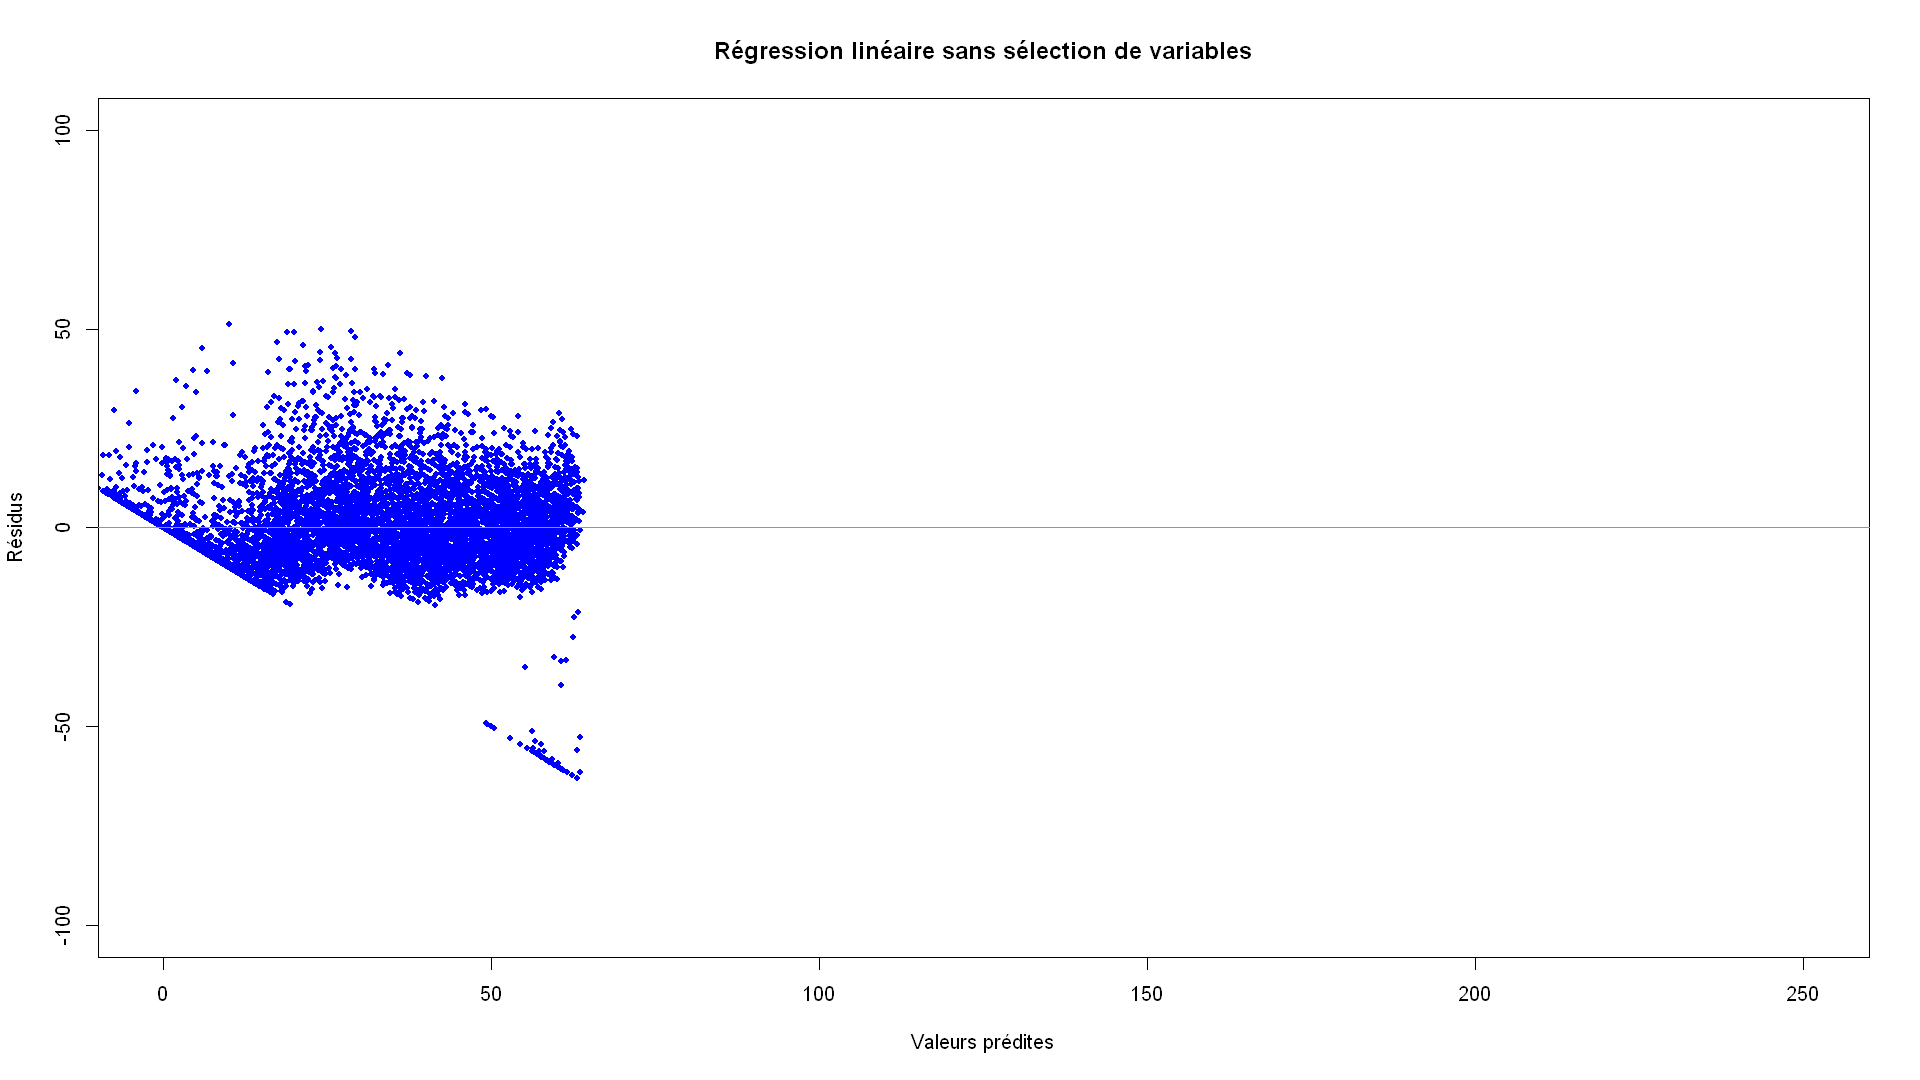

In [46]:
reg.lm <- aov(popularity ~ ., data = datappr)

# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

# Graphe des résidus.
plot.res(fit.lm, res.lm, "Régression linéaire sans sélection de variables")

In [47]:
summary(reg.lm)

                   Df  Sum Sq Mean Sq   F value   Pr(>F)    
valence             1    2053    2053    16.820 4.15e-05 ***
year                1 2814060 2814060 23060.192  < 2e-16 ***
acousticness        1    8949    8949    73.335  < 2e-16 ***
energy              1     269     269     2.207  0.13741    
instrumentalness    1    9788    9788    80.213  < 2e-16 ***
key                 1      35      35     0.284  0.59423    
liveness            1    2951    2951    24.180 8.95e-07 ***
loudness            1     410     410     3.363  0.06672 .  
mode                1      13      13     0.106  0.74521    
speechiness         1   10802   10802    88.515  < 2e-16 ***
log_duration        1     372     372     3.052  0.08069 .  
tempo_norm          1     104     104     0.848  0.35702    
dance_norm          1    1022    1022     8.377  0.00381 ** 
Residuals        7986  974540     122                       
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [48]:
str(datappr)

'data.frame':	8000 obs. of  14 variables:
 $ valence         : num  0.647 0.423 0.302 0.828 0.489 0.963 0.411 0.463 0.151 0.42 ...
 $ year            : int  1975 2007 1995 1994 2018 2003 1980 2001 1959 2013 ...
 $ acousticness    : num  0.449 0.0185 0.0384 0.531 0.371 0.523 0.36 0.137 0.987 0.167 ...
 $ energy          : num  0.827 0.878 0.98 0.625 0.694 0.615 0.732 0.562 0.0359 0.736 ...
 $ instrumentalness: num  7.88e-03 8.39e-02 5.52e-01 7.73e-06 0.00 1.48e-06 3.14e-04 2.90e-03 7.27e-05 8.78e-03 ...
 $ key             : num  2 2 2 10 5 10 5 9 3 2 ...
 $ liveness        : num  0.466 0.276 0.237 0.348 0.109 0.0794 0.0755 0.0463 0.121 0.124 ...
 $ loudness        : num  -7.6 -5.58 -3.15 -11.96 -4.39 ...
 $ mode            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 2 1 2 1 ...
 $ popularity      : int  25 65 36 38 68 47 61 49 16 58 ...
 $ speechiness     : num  0.399 0.0377 0.0721 0.0639 0.169 0.092 0.0282 0.045 0.0446 0.0384 ...
 $ log_duration    : num  12.6 12.6 11.9 12.1 12.7 ...
 $ 

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:wrapr':

    pack, unpack


Loaded glmnet 4.1



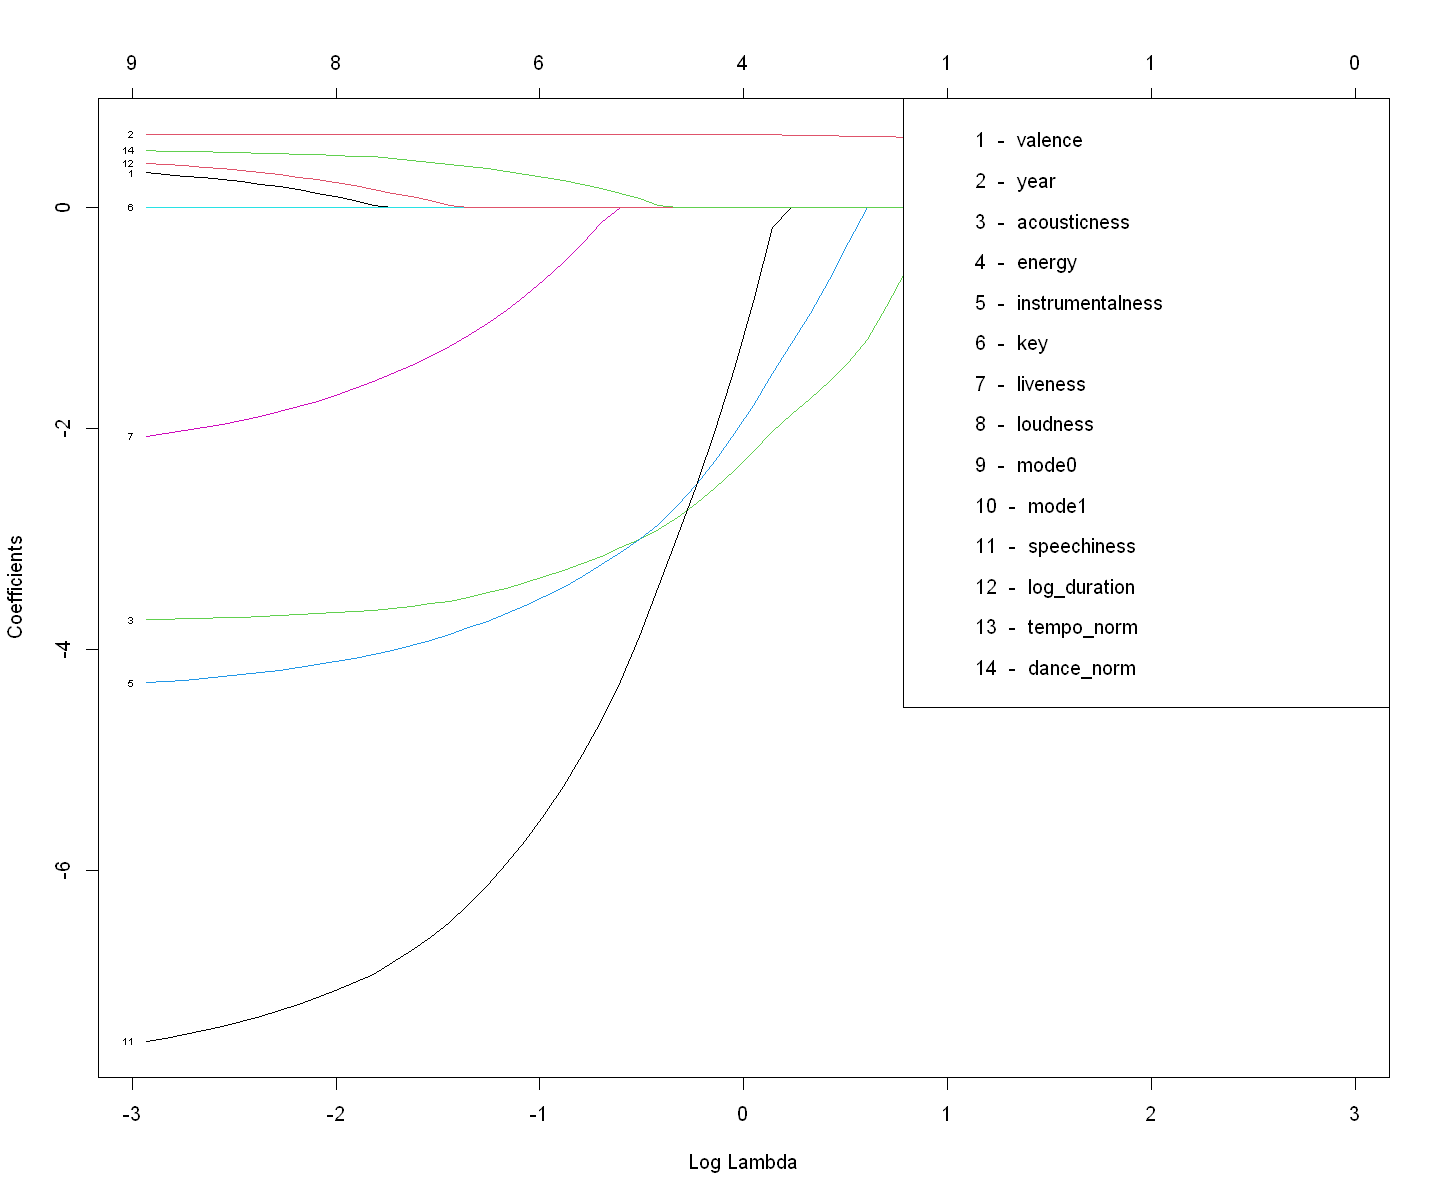

In [49]:
library(glmnet)

# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 10],
                           x = as.matrix(datappr[, -c(6, 9)]))
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(popularity ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$popularity, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

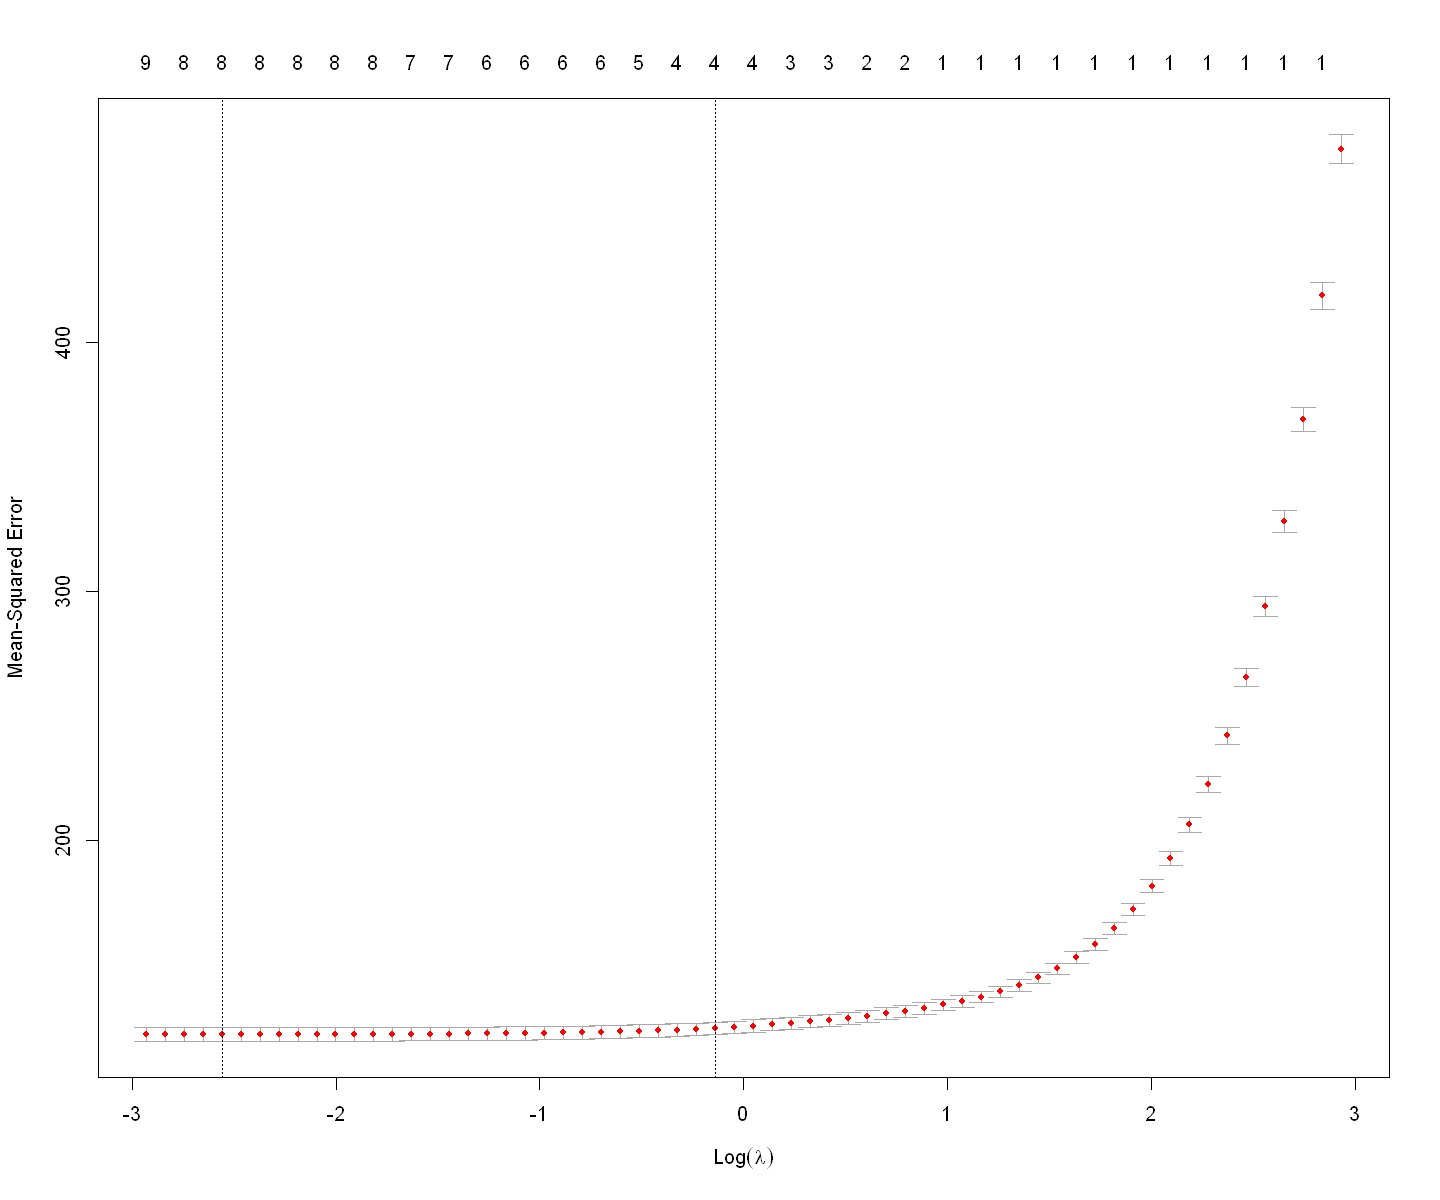

In [50]:
reg.lasso.cv <- cv.glmnet(y = datappr[, 10], x = x.mat)
plot(reg.lasso.cv)

In [51]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.87"

15 x 1 sparse Matrix of class "dgCMatrix"
                             1
(Intercept)      -1265.1339179
valence              .        
year                 0.6568263
acousticness        -2.5351485
energy               .        
instrumentalness    -2.2863685
key                  .        
liveness             .        
loudness             .        
mode0                .        
mode1                .        
speechiness         -2.0112978
log_duration         .        
tempo_norm           .        
dance_norm           .        

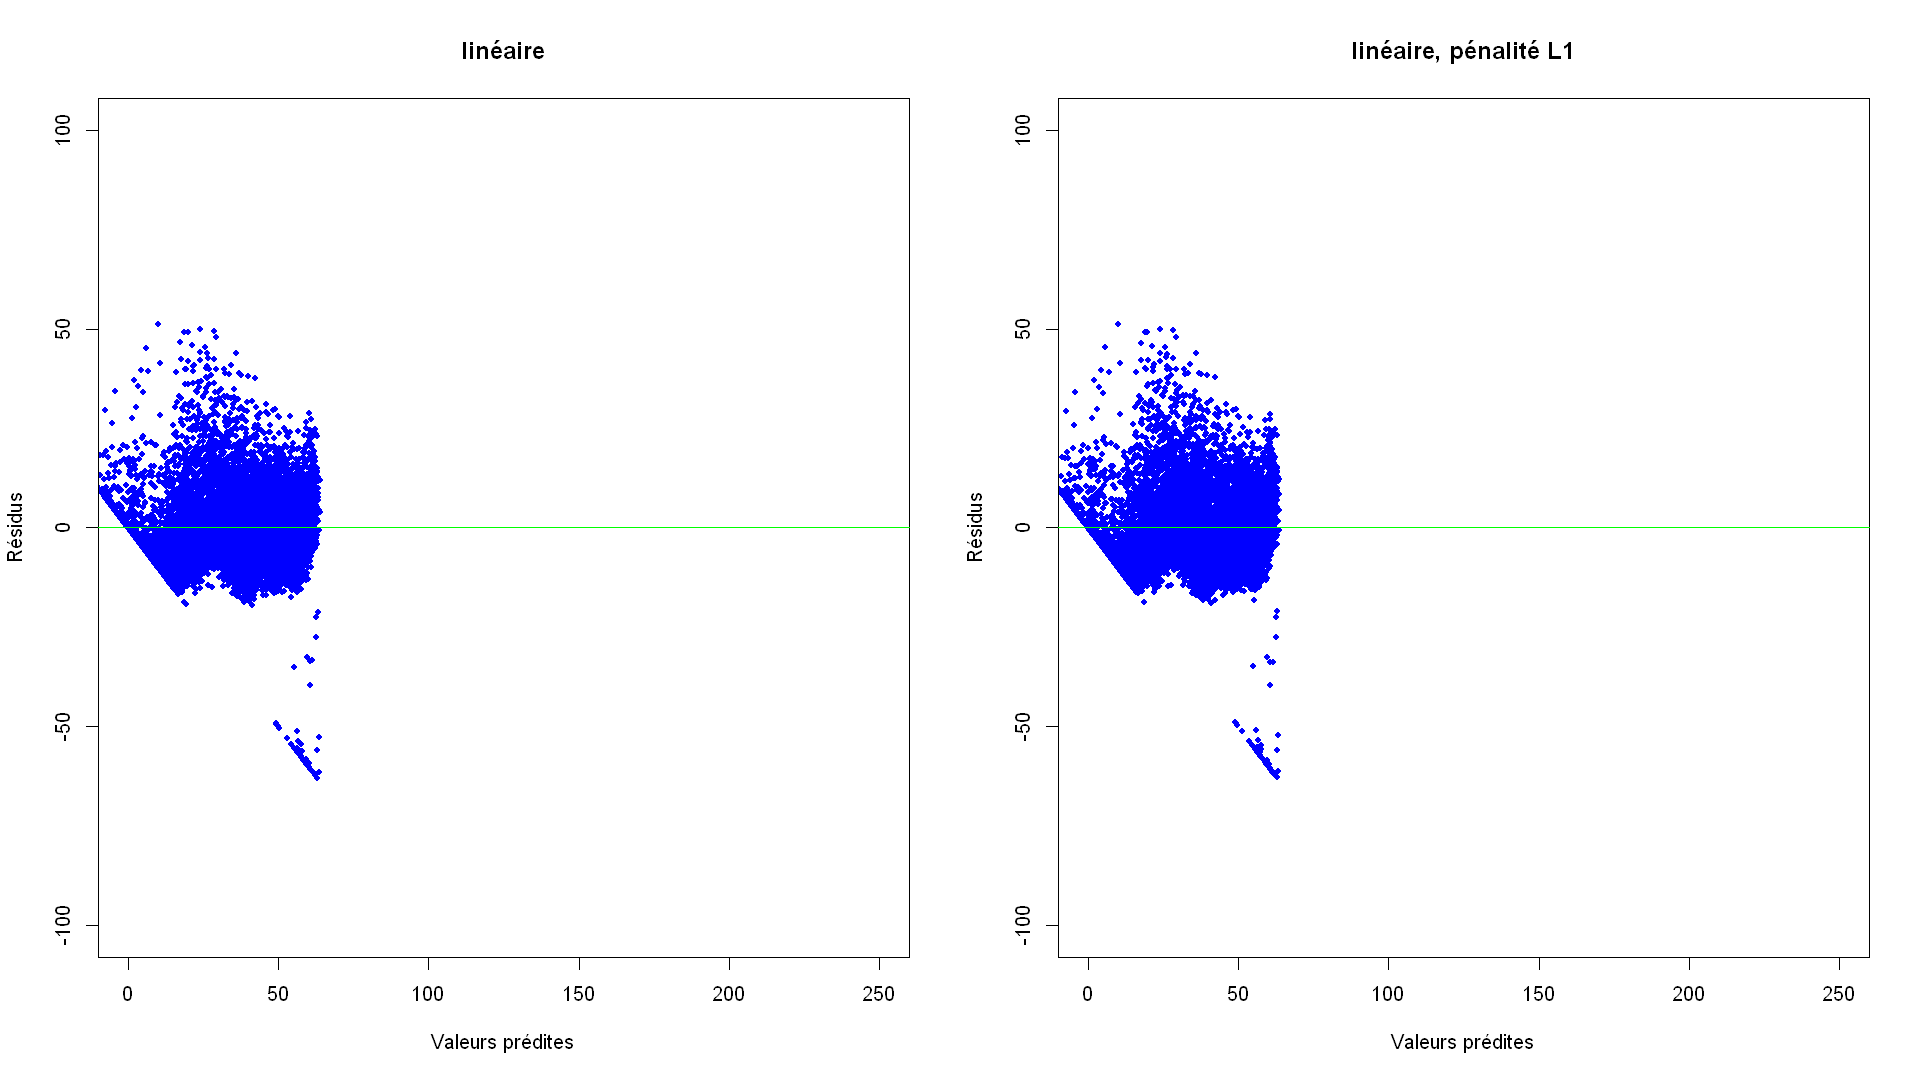

In [52]:
# Extraction des valeurs ajustées et des résidus
fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$popularity - fit.lasso
# Graphe des résidus
options(repr.plot.width = 16, repr.plot.height = 9)
par(mfrow = c(1, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1")

Réseaux de neuronnes

In [53]:
library(MASS)
library(nnet)

# apprentissage attention au paramètre linout dans le cas de la régression
nnet.reg = nnet(popularity ~ ., data = datappr, size = 5, decay = 1, linout = TRUE, maxit = 500)
summary(nnet.reg)

# weights:  76
initial  value 11260967.110156 
iter  10 value 3582071.271832
final  value 3582070.862764 
converged


a 13-5-1 network with 76 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   0.01   -0.04   -0.03   -0.01   -0.01    0.01    0.04    0.02    0.00    0.00 
i10->h1 i11->h1 i12->h1 i13->h1 
   0.02    0.04    0.02   -0.03 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -0.03   -0.03    0.01    0.03    0.02   -0.01    0.02   -0.03   -0.04    0.03 
i10->h2 i11->h2 i12->h2 i13->h2 
  -0.01   -0.04   -0.04    0.04 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
   0.02   -0.03    0.01    0.00    0.03    0.02    0.00   -0.04    0.00    0.04 
i10->h3 i11->h3 i12->h3 i13->h3 
  -0.01    0.01   -0.03    0.00 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4  i7->h4  i8->h4  i9->h4 
  -0.01    0.00   -0.03   -0.02    0.04   -0.04    0.00    0.00   -0.02    0.00 
i10->h4 i11->h4 i12->h4 i13->h4 
   0.00    0.02    0.04    0.04 
  b->h5  i1

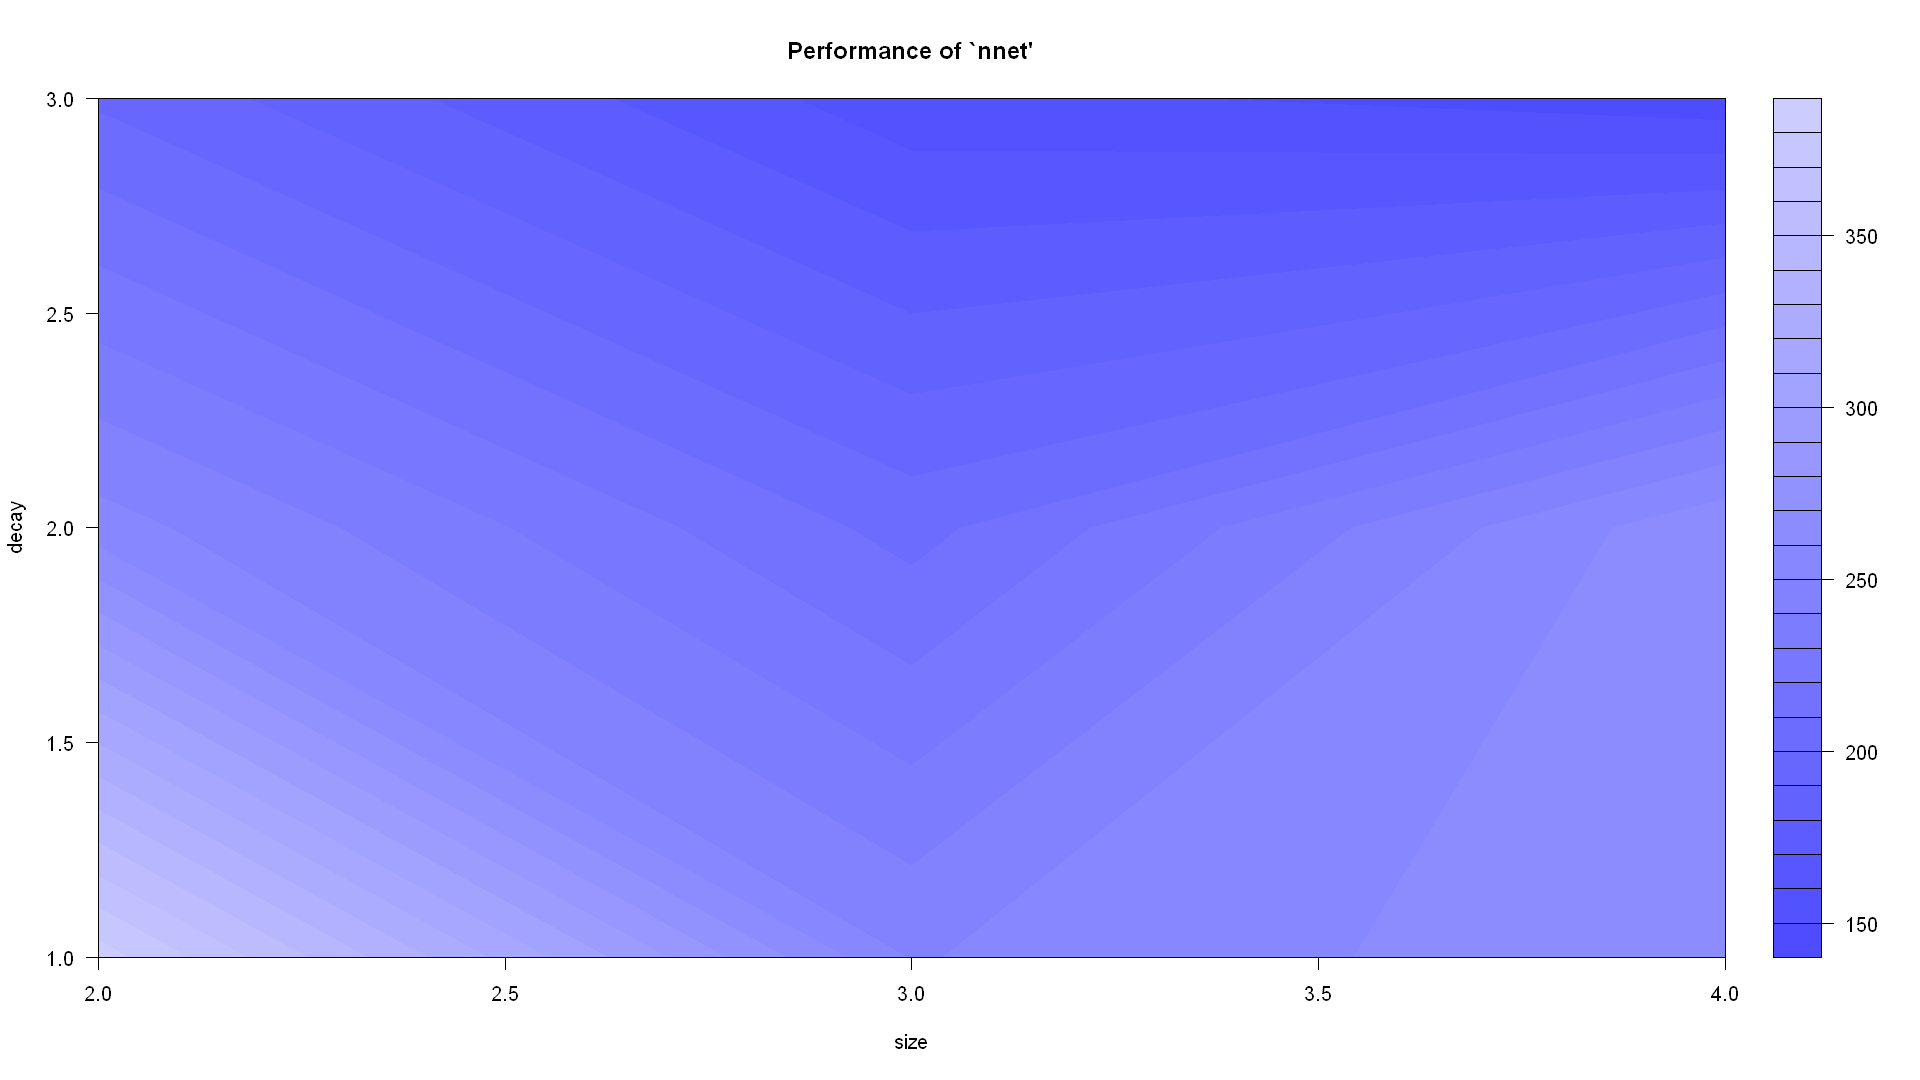

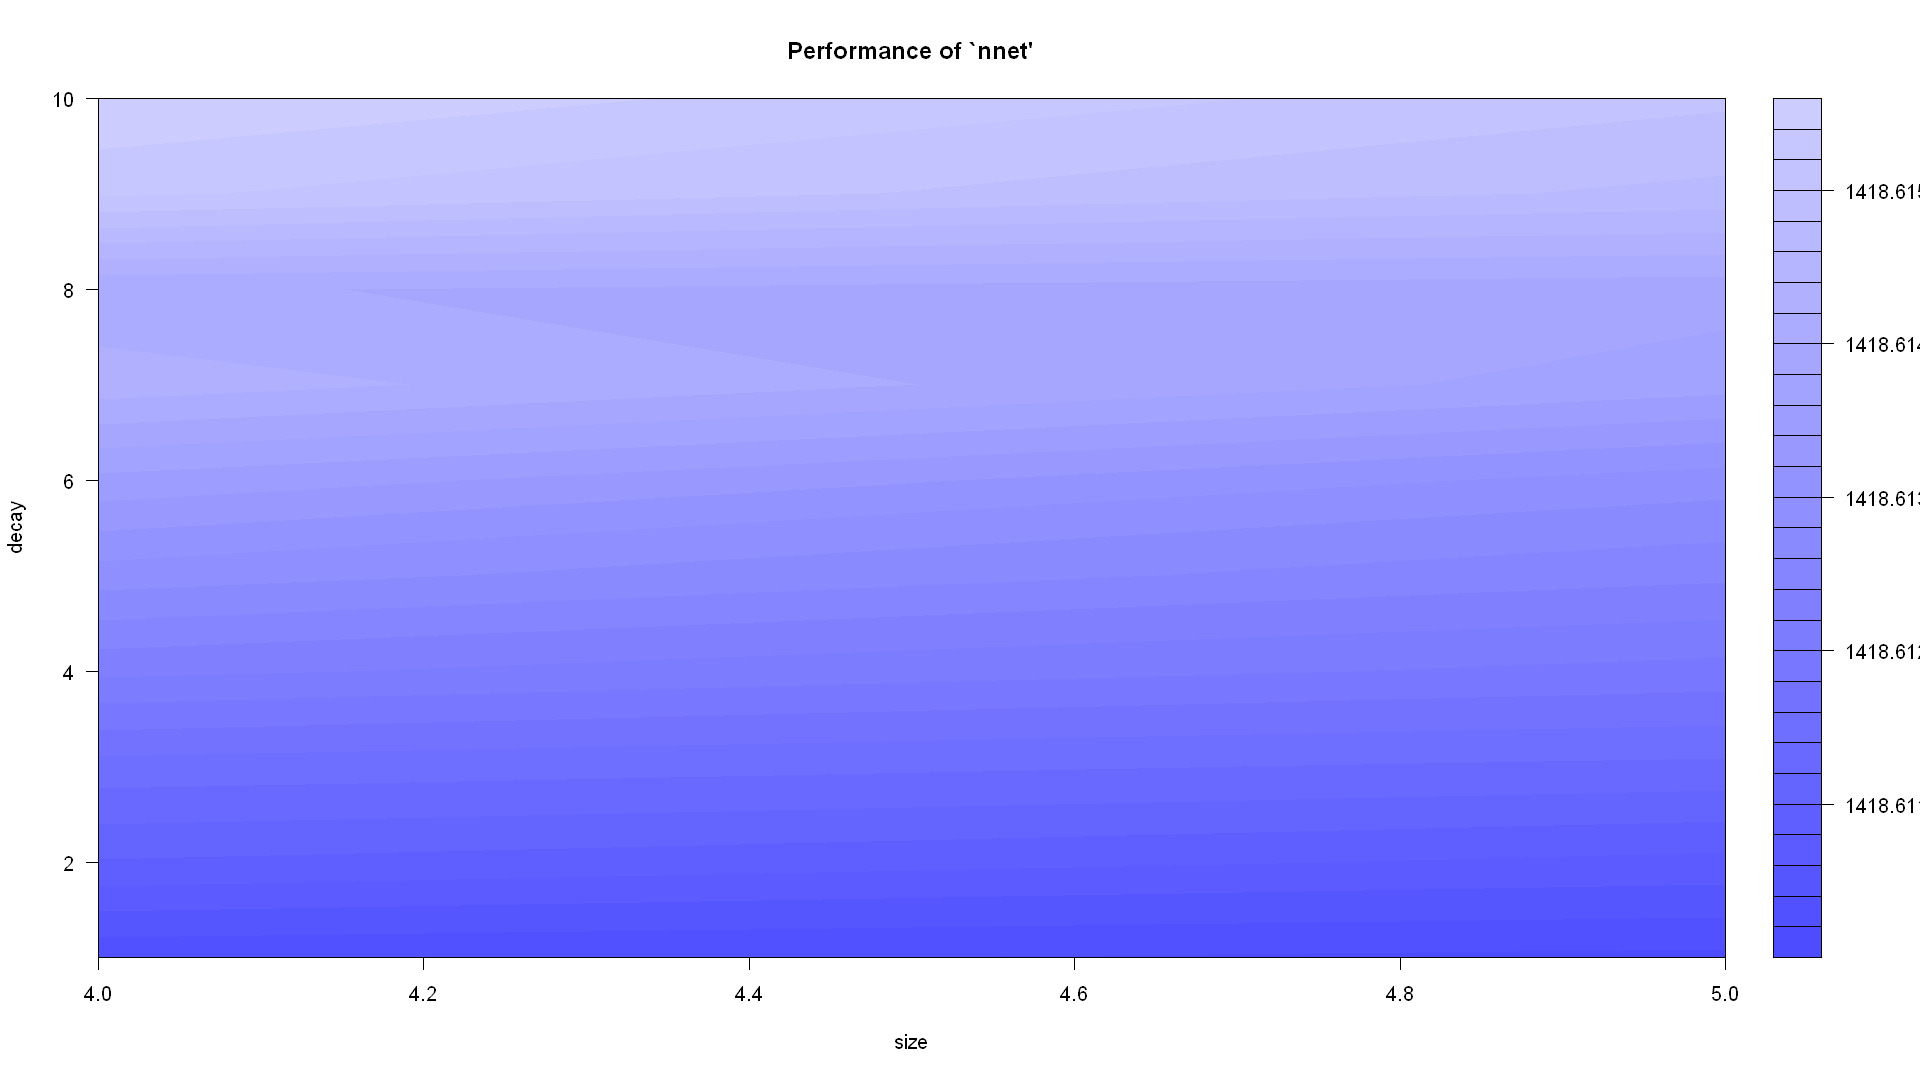

In [54]:
library(e1071)

plot(tune.nnet(popularity ~ ., data = datappr, size = c(2, 3, 4), decay = c(1, 2, 3), 
    maxit = 200, linout = TRUE))
plot(tune.nnet(popularity ~ ., data = datappr, size = 4:5, decay = 1:10))

# weights:  46
initial  value 10999031.037486 
iter  10 value 3583292.608098
iter  20 value 3582915.259837
iter  30 value 3566732.019773
iter  40 value 3515095.140942
iter  50 value 3451229.205399
iter  60 value 3380064.639630
iter  70 value 2729379.609255
iter  80 value 2353528.522140
iter  90 value 2232278.254796
iter 100 value 1996353.011899
iter 110 value 1829811.570582
iter 120 value 1582339.294048
iter 130 value 1165037.661357
iter 140 value 1147266.296498
iter 150 value 1114368.351829
iter 160 value 1089973.636751
iter 170 value 1001284.089773
iter 180 value 933808.575711
iter 190 value 912531.767058
iter 200 value 902617.630805
final  value 902617.630805 
stopped after 200 iterations


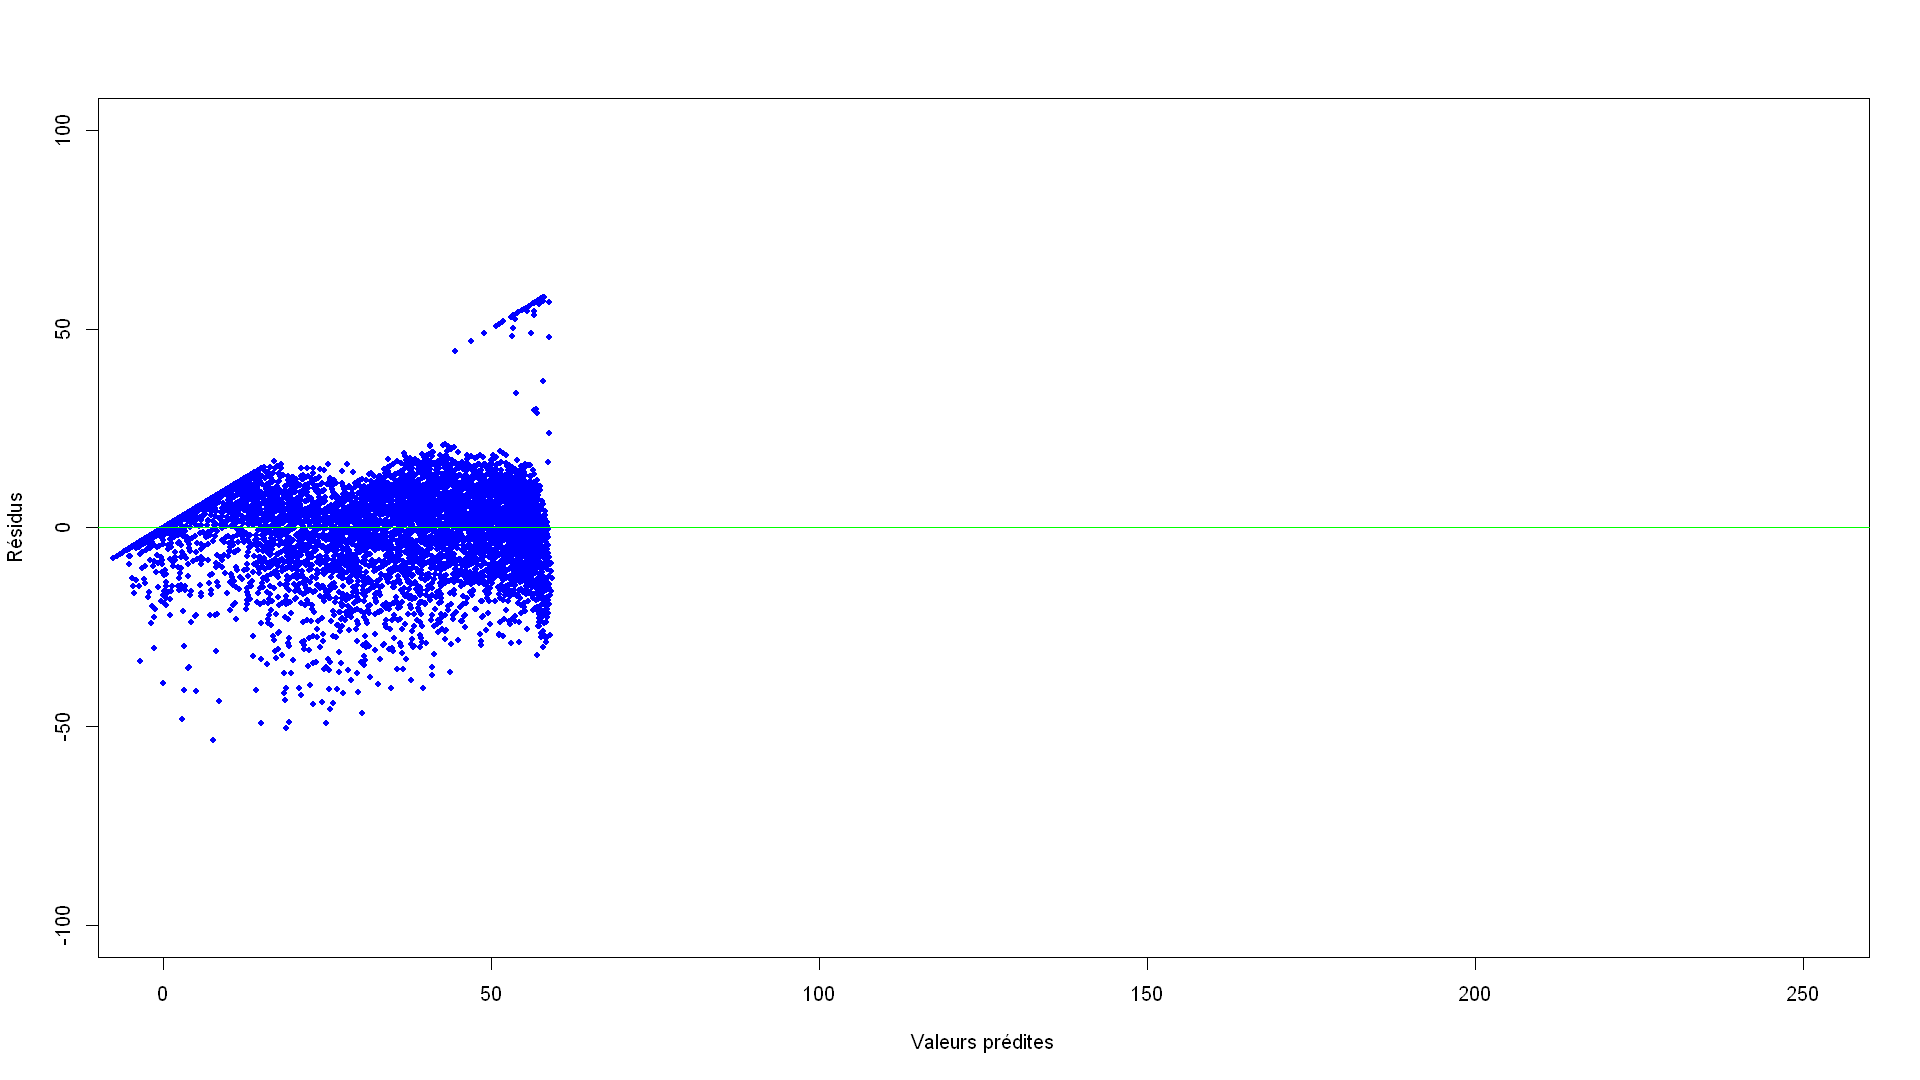

In [56]:
nnet.reg = nnet(popularity ~ ., data = datappr, size = 3, decay = 2, linout = TRUE, maxit = 200)

# calcul et graphe des résidus
fit.nnetr = predict(nnet.reg, data = datappr)
res.nnetr = fit.nnetr - datappr[, "popularity"]
plot.res(fit.nnetr, res.nnetr, titre = "")